In [ ]:
import pandas as pd
import numpy as np
import json
import copy
import os
import scipy.stats as ss
import math
from math import sqrt
import matplotlib.pyplot as plt
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

## ***Exploratory data analyses (EDA)***

In [ ]:
# Try reading the file with a different encoding
file_path = '/content/Data (1).csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [ ]:
# df.set_index('ORDERDATE', inplace=True)

In [ ]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

**Work Flow**

## ***1) Data Preprocessing:***

**Handling Missing Values:** Ensure that columns like "STATE" or "POSTALCODE" don't have missing values that could affect geographical analysis.

**Date Parsing:** Convert ORDERDATE to a datetime format and extract necessary components (year, quarter, month).

**Categorical Encoding:** Encode categorical variables (PRODUCTLINE, DEALSIZE) using techniques like one-hot encoding or label encoding for machine learning models.

In [ ]:
#Data cleaning by droping unnecessary columns
df=df.drop(columns=['ORDERNUMBER', 'ORDERLINENUMBER', 'STATUS', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'STATE', 'TERRITORY', 'POSTALCODE' ])

In [ ]:
#At that current time i drop the "STATE" , "POSTALCODE" and "TERRITORY"

In [ ]:
# df['PRODUCTCODE'].unique()

In [ ]:
df.sample(10)

QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE  QTR_ID  MONTH_ID  \
2606               48      74.45  3573.60 2004-11-01       4        11   
2246               32      53.18  1701.76 2005-02-22       1         2   
2183               31      79.91  2477.21 2004-06-28       2         6   
2798               50      43.68  2184.00 2003-04-16       2         4   
143                48     100.00  7020.48 2004-02-04       1         2   
665                40     100.00  6549.20 2004-05-05       2         5   
2501               30      88.60  2658.00 2004-11-24       4        11   
1174               45     100.00  6357.60 2004-01-16       1         1   
1455               45      61.85  2783.25 2004-10-13       4        10   
1518               41      94.10  3858.10 2003-06-27       2         6   

      YEAR_ID       PRODUCTLINE  MSRP PRODUCTCODE         CITY    COUNTRY  \
2606     2004             Ships    72   S700_2610        Cowes         UK   
2246     2005  Trucks and Buses    54    S32_2509       Madrid      Spain   
2183     2004       Motorcycles    99    S32_1374  Bridgewater        USA   
2798     2003             Ships    54    S72_3212    Singapore  Singapore   
143      2004      Classic Cars   147    S10_4962    Singapore  Singapore   
665      2004      Classic Cars   163    S18_2238       Madrid      Spain   
2501     2004            Planes    91   S700_1691    Barcelona      Spain   
1174     2004      Classic Cars   141    S18_3685       Madrid      Spain   
1455     2004      Classic Cars    57    S24_1444    Cambridge        USA   
1518     2003            Planes   109    S24_1785       Madrid      Spain   

     DEALSIZE  
2606   Medium  
2246    Small  
2183    Small  
2798    Small  
143     Large  
665    Medium  
2501    Small  
1174   Medium  
1455    Small  
1518   Medium

In [ ]:
# df.isnull().sum()

Here we see there is no missing value

## ***(i) Useful Library Profile Report***
by using this library we know all information about the data set


In [ ]:
# !pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport

In [ ]:
#Generate the profiling report
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [ ]:
#/content/output.html
#file:///C:/Users/Priyansu/Downloads/output%20(2).html

In [ ]:
# to see thier plots and relations
# sns.pairplot(df, hue='PRODUCTLINE')

**Essential Columns:** QUANTITYORDERED, ORDERDATE, PRODUCTCODE

**Optional but Useful for ML Models:** PRICEEACH, PRODUCTLINE, QTR_ID, MONTH_ID, YEAR_ID

## ***2) Feature Engineering:***

**Seasonality Indicators:** Create features that indicate seasons or holidays which might affect demand.

**Promotions and Discounts:** If available, include information about promotional periods.(unavalaible in the dataset)

**Lag Features:** Incorporate past demand values to help models understand trends.


In [ ]:
# Compute time intervals between consecutive dates
time_diff = df['ORDERDATE'].diff()

# Check if all time intervals are the same
if all(time_diff == time_diff[0]):
    print("Data is equally spaced.")
else:
    print("Data is not equally spaced.")

Data is not equally spaced.


Conclusion:- Here the data is not equally spaced so we aggregate the data

In [ ]:
df.head(4)

QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE  QTR_ID  MONTH_ID  YEAR_ID  \
0               30      95.70  2871.00 2003-02-24       1         2     2003   
1               34      81.35  2765.90 2003-05-07       2         5     2003   
2               41      94.74  3884.34 2003-07-01       3         7     2003   
3               45      83.26  3746.70 2003-08-25       3         8     2003   

   PRODUCTLINE  MSRP PRODUCTCODE      CITY COUNTRY DEALSIZE  
0  Motorcycles    95    S10_1678       NYC     USA    Small  
1  Motorcycles    95    S10_1678     Reims  France    Small  
2  Motorcycles    95    S10_1678     Paris  France   Medium  
3  Motorcycles    95    S10_1678  Pasadena     USA   Medium

In [ ]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'QTR_ID',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CITY',
       'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [ ]:
by_category = df.groupby(['PRODUCTLINE','ORDERDATE']).sum("SALES").reset_index()

In [ ]:
by_category.shape

(600, 9)

In [ ]:
# unique_product_codes = by_category['PRODUCTLINE'].unique()
# for product_code in unique_product_codes:
#     product_data = by_category[by_category['PRODUCTLINE'] == product_code].copy()
#     print(product_code,  product_data.shape)

In [ ]:
import pandas as pd

final_df_list = []
unique_product_codes = df['PRODUCTLINE'].unique()

for product_code in unique_product_codes:
    product_data = df[df['PRODUCTLINE'] == product_code].copy()

    # Aggregate data by CITY, COUNTRY, and DEALSIZE
    aggregated_df = product_data.groupby(['CITY', 'COUNTRY', 'DEALSIZE'], as_index=False).agg({
        'QUANTITYORDERED': 'sum',
        'PRICEEACH': 'mean',   # Taking mean for PRICEEACH as an example
        'SALES': 'sum',
        'MSRP': 'mean',        # Mean MSRP
        'QTR_ID': 'first',     # Assuming QTR_ID stays the same within each group
        'MONTH_ID': 'first',   # Assuming MONTH_ID stays the same within each group
        'YEAR_ID': 'first',    # Assuming YEAR_ID stays the same within each group
        'PRODUCTLINE': 'first', # Since PRODUCTLINE is the same within each group
        'ORDERDATE': 'first'   # First ORDERDATE in each group
    })

    # Adjust ORDERDATE to the end of the month
    aggregated_df['ORDERDATE'] = aggregated_df['ORDERDATE'] + pd.offsets.MonthEnd(0)

    final_df_list.append(aggregated_df)

# Combine all aggregated data into a single DataFrame
final_df1 = pd.concat(final_df_list, ignore_index=True)


In [ ]:
final_df1.sample(5)

CITY  COUNTRY DEALSIZE  QUANTITYORDERED   PRICEEACH     SALES  \
614      Reims   France    Small               28   72.260000   2023.28   
143   Helsinki  Finland    Small               87   72.143333   6315.36   
215      Reims   France   Medium              313   93.315000  34340.49   
468  Tsawassen   Canada   Medium              114   97.646667  12536.38   
405  Minato-ku    Japan    Large               55  100.000000  10758.00   

           MSRP  QTR_ID  MONTH_ID  YEAR_ID   PRODUCTLINE  ORDERDATE  
614   86.000000       1         3     2005         Ships 2005-03-31  
143   78.666667       1         2     2005  Classic Cars 2005-02-28  
215  140.250000       4        12     2004  Classic Cars 2004-12-31  
468   93.333333       3         8     2004  Vintage Cars 2004-08-31  
405   88.000000       4        11     2004  Vintage Cars 2004-11-30

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of columns to check distribution
# columns_to_check = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# # Set up the figure size
# plt.figure(figsize=(12, 8))

# # Plot distributions
# for i, column in enumerate(columns_to_check, 1):
#     plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
#     sns.histplot(dfp[column], kde=True, bins=30, color='blue')
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

for the simulation perpose i use the unscaled data to generate

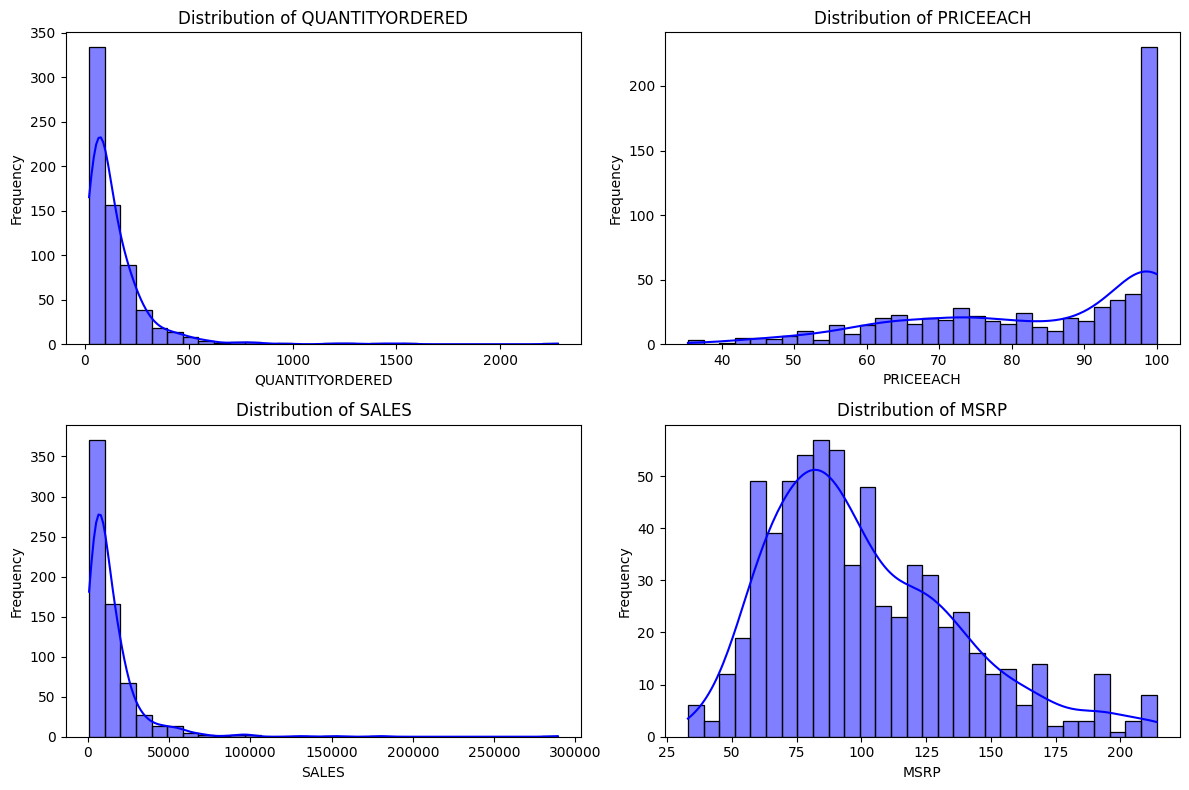

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check distribution
columns_to_check = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot distributions
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    sns.histplot(final_df1[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


final_df_list = []
unique_product_codes = df['PRODUCTLINE'].unique()

for product_code in unique_product_codes:
    product_data = df[df['PRODUCTLINE'] == product_code].copy()

    # Aggregate data by CITY, COUNTRY, and DEALSIZE
    aggregated_df = product_data.groupby(['CITY', 'COUNTRY', 'DEALSIZE'], as_index=False).agg({
        'QUANTITYORDERED': 'sum',
        'PRICEEACH': 'mean',   # Taking mean for PRICEEACH as an example
        'SALES': 'sum',
        'MSRP': 'mean',        # Mean MSRP
        'QTR_ID': 'first',     # Assuming QTR_ID stays the same within each group
        'MONTH_ID': 'first',   # Assuming MONTH_ID stays the same within each group
        'YEAR_ID': 'first',    # Assuming YEAR_ID stays the same within each group
        'PRODUCTLINE': 'first', # Since PRODUCTLINE is the same within each group
        'ORDERDATE': 'first'   # First ORDERDATE in each group
    })


    aggregated_df['ORDERDATE'] = aggregated_df['ORDERDATE'] + pd.offsets.MonthEnd(0)
    numerical_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
    scaler = MinMaxScaler()
    aggregated_df[numerical_cols] = scaler.fit_transform(aggregated_df[numerical_cols])
    final_df_list.append(aggregated_df)
final_df = pd.concat(final_df_list, ignore_index=True)

In [ ]:
final_df.head()

CITY COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES      MSRP  \
0  Allentown     USA    Large         0.026882   1.000000  0.116764  1.000000   
1  Allentown     USA   Medium         0.293907   0.974924  0.368469  0.402746   
2  Allentown     USA    Small         0.082437   0.423436  0.059301  0.141876   
3  Barcelona   Spain   Medium         0.157706   0.809115  0.174559  0.275744   
4     Bergen  Norway    Large         0.041219   1.000000  0.135598  1.000000   

   QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  ORDERDATE  
0       4        11     2004  Motorcycles 2004-11-30  
1       4        11     2004  Motorcycles 2004-11-30  
2       4        11     2004  Motorcycles 2004-11-30  
3       4        11     2004  Motorcycles 2004-11-30  
4       4        11     2003  Motorcycles 2003-11-30

In [ ]:
unique_product_codes = final_df['PRODUCTLINE'].unique()
for product_code in unique_product_codes:
    product_data = final_df[final_df['PRODUCTLINE'] == product_code].copy()
    print(product_code,  product_data.shape)

Motorcycles (89, 12)
Classic Cars (170, 12)
Trucks and Buses (76, 12)
Vintage Cars (141, 12)
Planes (85, 12)
Ships (70, 12)
Trains (43, 12)


In [ ]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'QTR_ID',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CITY',
       'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [ ]:
# df.dtypes

## ***Numerical Features Analysis***

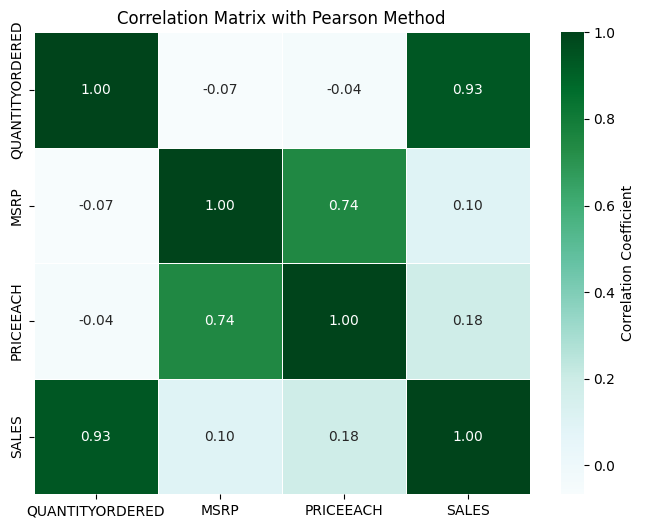

In [ ]:
num_corr = final_df[['QUANTITYORDERED', 'MSRP', 'PRICEEACH', 'SALES']].corr(method='pearson')
# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(num_corr, annot=True, cmap="BuGn", linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix with Pearson Method')
plt.show()

**Summary:-**

**Strongest Correlations:** The strongest relationships are seen between ***MSRP and PRICEEACH (0.67)***, and ***PRICEEACH and SALES (0.66)***. These strong correlations highlight the influence of pricing strategy (MSRP and PRICEEACH) on sales performance.

**Moderate Correlations:** The correlation between ***QUANTITYORDERED and SALES (0.55)*** is moderate, showing that while quantity contributes to sales, its impact isn't as strong as price-related factors.

**Weakest Correlations:** The correlations between ***QUANTITYORDERED and MSRP/PRICEEACH*** are almost negligible ***(0.02 and 0.01)***, indicating that the number of units ordered does not depend heavily on MSRP or the unit price.

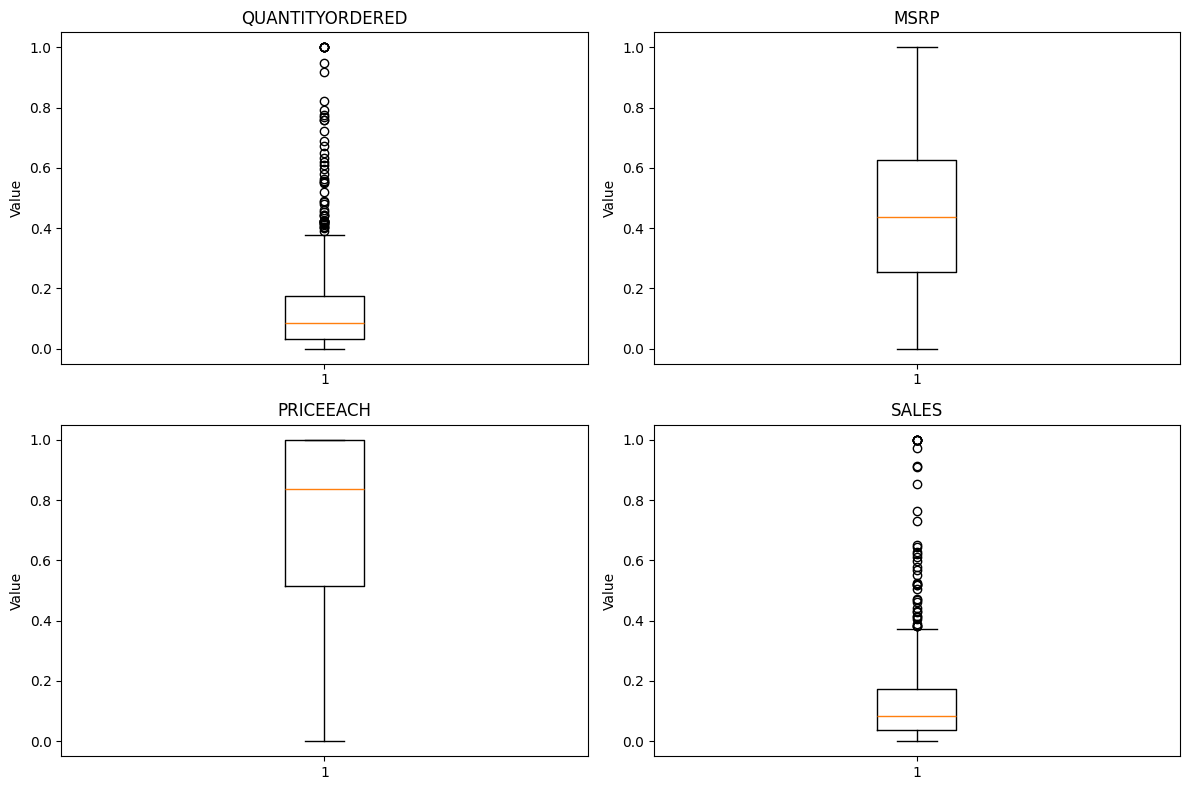

In [ ]:
#checking the outliers in each numerical features
# Plotting the box plots for each column
plt.figure(figsize=(12, 8))

# Subplot for QUANTITYORDERED
plt.subplot(2, 2, 1)
plt.boxplot(final_df['QUANTITYORDERED'])
plt.title('QUANTITYORDERED')
plt.ylabel('Value')

# Subplot for MSRP
plt.subplot(2, 2, 2)
plt.boxplot(final_df['MSRP'])
plt.title('MSRP')
plt.ylabel('Value')

# Subplot for PRICEEACH
plt.subplot(2, 2, 3)
plt.boxplot(final_df['PRICEEACH'])
plt.title('PRICEEACH')
plt.ylabel('Value')

# Subplot for SALES
plt.subplot(2, 2, 4)
plt.boxplot(final_df['SALES'])
plt.title('SALES')
plt.ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


**Conclusion:-** Using the box-plot  We see thta in the above plot 'QUANTITYORDERED', 'MSRP', 'SALES' there are outliers included

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detecting outliers in each column
outliers_quantity = detect_outliers(final_df['QUANTITYORDERED'])
outliers_msrp = detect_outliers(final_df['MSRP'])
outliers_priceeach = detect_outliers(final_df['PRICEEACH'])
outliers_sales = detect_outliers(final_df['SALES'])

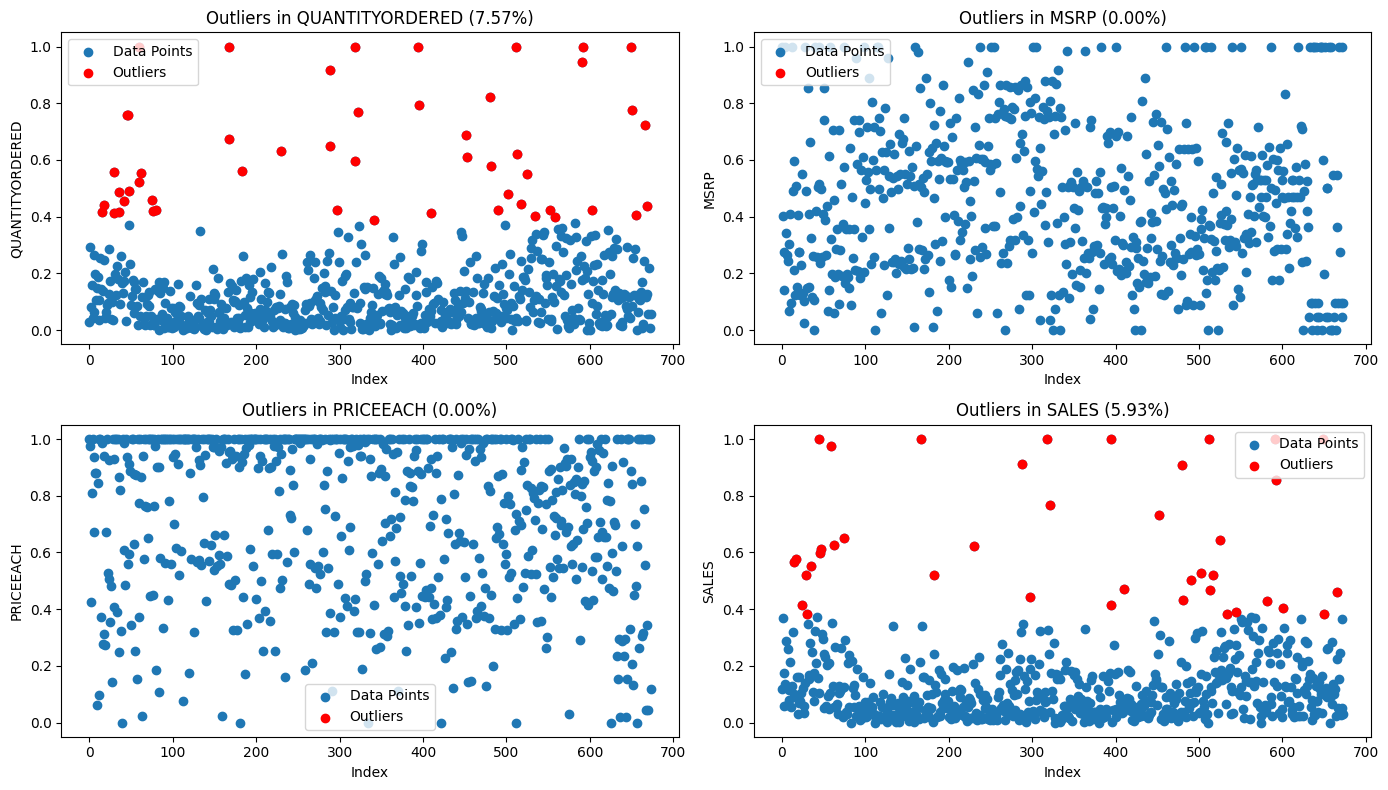

In [ ]:
# Function to calculate the percentage of outliers
def calculate_outlier_percentage(outliers, total):
    return len(outliers) / total * 100

# Plotting the outliers for each column with percentage
plt.figure(figsize=(14, 8))

# QUANTITYORDERED Outliers
plt.subplot(2, 2, 1)
plt.scatter(final_df.index, final_df['QUANTITYORDERED'], label='Data Points')
plt.scatter(outliers_quantity.index, outliers_quantity, color='red', label='Outliers')
percentage_quantity = calculate_outlier_percentage(outliers_quantity, len(final_df['QUANTITYORDERED']))
plt.title(f'Outliers in QUANTITYORDERED ({percentage_quantity:.2f}%)')
plt.xlabel('Index')
plt.ylabel('QUANTITYORDERED')
plt.legend()

# MSRP Outliers
plt.subplot(2, 2, 2)
plt.scatter(final_df.index, final_df['MSRP'], label='Data Points')
plt.scatter(outliers_msrp.index, outliers_msrp, color='red', label='Outliers')
percentage_msrp = calculate_outlier_percentage(outliers_msrp, len(final_df['MSRP']))
plt.title(f'Outliers in MSRP ({percentage_msrp:.2f}%)')
plt.xlabel('Index')
plt.ylabel('MSRP')
plt.legend()

# PRICEEACH Outliers
plt.subplot(2, 2, 3)
plt.scatter(final_df.index, final_df['PRICEEACH'], label='Data Points')
plt.scatter(outliers_priceeach.index, outliers_priceeach, color='red', label='Outliers')
percentage_priceeach = calculate_outlier_percentage(outliers_priceeach, len(final_df['PRICEEACH']))
plt.title(f'Outliers in PRICEEACH ({percentage_priceeach:.2f}%)')
plt.xlabel('Index')
plt.ylabel('PRICEEACH')
plt.legend()

# SALES Outliers
plt.subplot(2, 2, 4)
plt.scatter(final_df.index, final_df['SALES'], label='Data Points')
plt.scatter(outliers_sales.index, outliers_sales, color='red', label='Outliers')
percentage_sales = calculate_outlier_percentage(outliers_sales, len(final_df['SALES']))
plt.title(f'Outliers in SALES ({percentage_sales:.2f}%)')
plt.xlabel('Index')
plt.ylabel('SALES')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# df.boxplot(column='SALES', by='PRODUCTLINE')
final_df.head()

CITY COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES      MSRP  \
0  Allentown     USA    Large         0.026882   1.000000  0.116764  1.000000   
1  Allentown     USA   Medium         0.293907   0.974924  0.368469  0.402746   
2  Allentown     USA    Small         0.082437   0.423436  0.059301  0.141876   
3  Barcelona   Spain   Medium         0.157706   0.809115  0.174559  0.275744   
4     Bergen  Norway    Large         0.041219   1.000000  0.135598  1.000000   

   QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  ORDERDATE  
0       4        11     2004  Motorcycles 2004-11-30  
1       4        11     2004  Motorcycles 2004-11-30  
2       4        11     2004  Motorcycles 2004-11-30  
3       4        11     2004  Motorcycles 2004-11-30  
4       4        11     2003  Motorcycles 2003-11-30

In [ ]:
# # Function to detect and remove outliers using the IQR method
# def remove_outliers(final_df, column_name):
#     Q1 = final_df[column_name].quantile(0.25)
#     Q3 = final_df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     # Remove outliers
#     df_filtered = final_df[(final_df[column_name] >= lower_bound) & (final_df[column_name] <= upper_bound)]
#     return df_filtered

# df_no_outliers = final_df.copy()
# df1 = remove_outliers(df_no_outliers, 'QUANTITYORDERED')
# df1 = remove_outliers(df_no_outliers, 'MSRP')
# df1 = remove_outliers(df_no_outliers, 'PRICEEACH')
# df1 = remove_outliers(df_no_outliers, 'SALES')

In [ ]:
# Function to detect and remove outliers using the IQR method
def remove_outliers(final_df, column_name):
    Q1 = final_df[column_name].quantile(0.25)
    Q3 = final_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.0 * IQR
    upper_bound = Q3 + 2.0 * IQR
    # Remove outliers
    df_filtered = final_df[(final_df[column_name] >= lower_bound) & (final_df[column_name] <= upper_bound)]
    return df_filtered

# Create a copy of the original DataFrame to remove outliers from each specified column in sequence
df_no_outliers = final_df.copy()

# Remove outliers from each column iteratively
df_no_outliers = remove_outliers(df_no_outliers, 'QUANTITYORDERED')
df_no_outliers = remove_outliers(df_no_outliers, 'MSRP')
df_no_outliers = remove_outliers(df_no_outliers, 'PRICEEACH')
df_no_outliers = remove_outliers(df_no_outliers, 'SALES')

In [ ]:
final_df.shape

(674, 12)

In [ ]:
# Resulting DataFrame after removing outliers
df_no_outliers

CITY    COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
0         Allentown        USA    Large         0.026882   1.000000  0.116764   
1         Allentown        USA   Medium         0.293907   0.974924  0.368469   
2         Allentown        USA    Small         0.082437   0.423436  0.059301   
3         Barcelona      Spain   Medium         0.157706   0.809115  0.174559   
4            Bergen     Norway    Large         0.041219   1.000000  0.135598   
..              ...        ...      ...              ...        ...       ...   
669       Singapore  Singapore    Small         0.438819   0.344249  0.246739   
670  South Brisbane  Australia    Small         0.054852   0.045348  0.025126   
671         Stavern     Norway   Medium         0.219409   1.000000  0.366395   
672          Torino      Italy    Small         0.008439   1.000000  0.051243   
673    White Plains        USA    Small         0.054852   0.117945  0.029489   

         MSRP  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  ORDERDATE  
0    1.000000       4        11     2004  Motorcycles 2004-11-30  
1    0.402746       4        11     2004  Motorcycles 2004-11-30  
2    0.141876       4        11     2004  Motorcycles 2004-11-30  
3    0.275744       4        11     2004  Motorcycles 2004-11-30  
4    1.000000       4        11     2003  Motorcycles 2003-11-30  
..        ...     ...       ...      ...          ...        ...  
669  0.273810       2         4     2003       Trains 2003-04-30  
670  0.095238       3         9     2003       Trains 2003-09-30  
671  0.047619       4        11     2004       Trains 2004-11-30  
672  1.000000       3         9     2004       Trains 2004-09-30  
673  0.095238       4        11     2003       Trains 2003-11-30  

[631 rows x 12 columns]

Insufficient Removal Threshold: The IQR method might not fully eliminate all outliers if the distribution of the data has heavy tails or extreme values that fall just within the typical IQR threshold of 1.5. Increasing the multiplier (e.g., using 2.0 * IQR instead of 1.5 * IQR) might help to capture these.

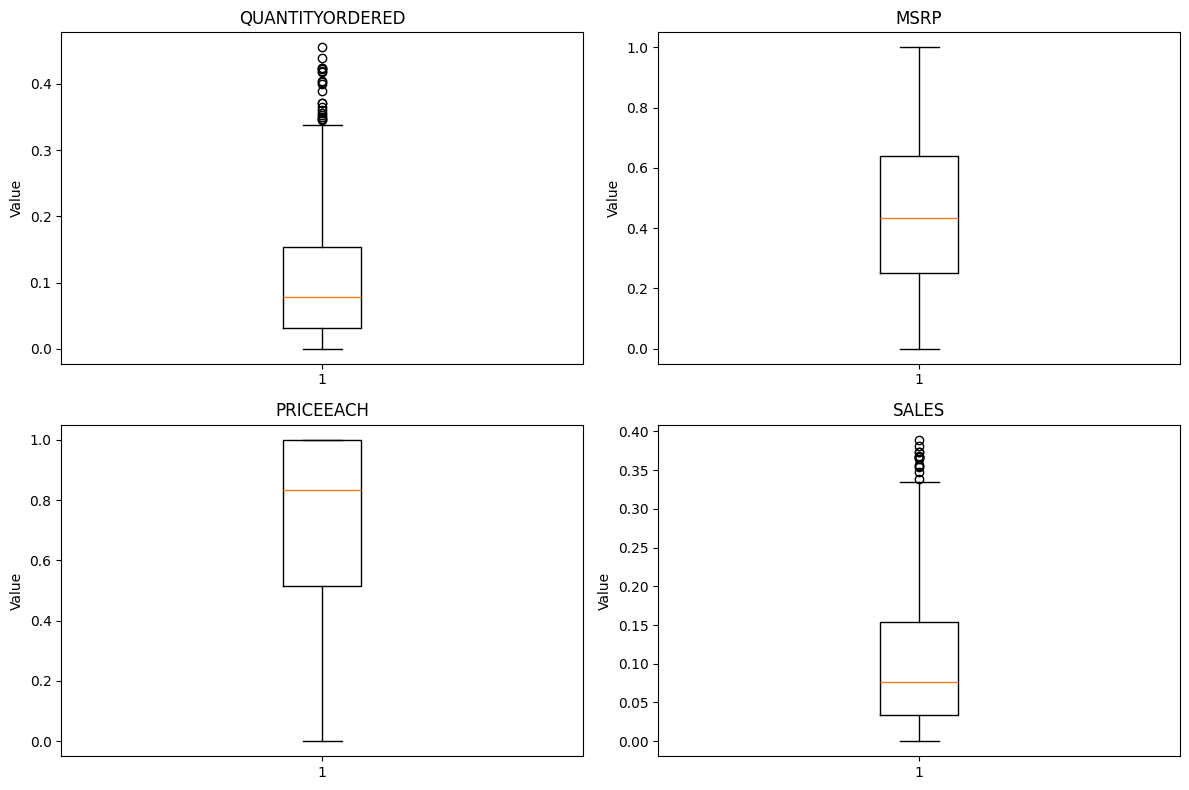

In [ ]:
#checking the outliers in each numerical features
# Plotting the box plots for each column
plt.figure(figsize=(12, 8))

# Subplot for QUANTITYORDERED
plt.subplot(2, 2, 1)
plt.boxplot(df_no_outliers['QUANTITYORDERED'])
plt.title('QUANTITYORDERED')
plt.ylabel('Value')

# Subplot for MSRP
plt.subplot(2, 2, 2)
plt.boxplot(df_no_outliers['MSRP'])
plt.title('MSRP')
plt.ylabel('Value')

# Subplot for PRICEEACH
plt.subplot(2, 2, 3)
plt.boxplot(df_no_outliers['PRICEEACH'])
plt.title('PRICEEACH')
plt.ylabel('Value')

# Subplot for SALES
plt.subplot(2, 2, 4)
plt.boxplot(df_no_outliers['SALES'])
plt.title('SALES')
plt.ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Sample data
# df_no_outliers = pd.DataFrame(...)

# Group by PRODUCTLINE and calculate outliers in SALES for each product line
outlier_percentages = {}

for productline, group in df_no_outliers.groupby('PRODUCTLINE'):
    # Calculate Q1, Q3, and IQR for SALES
    Q1 = group['SALES'].quantile(0.25)
    Q3 = group['SALES'].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = group[(group['SALES'] < lower_bound) | (group['SALES'] > upper_bound)]
    outlier_percentage = (len(outliers) / len(group)) * 100
    print(len(group))
    # Store the percentage
    outlier_percentages[productline] = outlier_percentage

# Convert the result to a DataFrame for a clear view
outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['PRODUCTLINE', 'Outlier_Percentage'])
print(  productline ,outlier_df)


166
76
77
66
40
70
136
Vintage Cars         PRODUCTLINE  Outlier_Percentage
0      Classic Cars            7.228916
1       Motorcycles            0.000000
2            Planes            0.000000
3             Ships            0.000000
4            Trains            2.500000
5  Trucks and Buses            0.000000
6      Vintage Cars            4.411765


In [ ]:
166*7.2/100

11.952

In [ ]:
df1= df_no_outliers.copy()

***Conclusion:-***After removing the outlier the data shape is converted from (2823,13) to (2712,13) means 111 values have the outliers in the data frame

## ***Categorical Features Analysis***

To check the correlation between categorical features, you can use the ***chi-square test*** of independence:

**Set up the null hypothesis:** The null hypothesis is that the two variables being tested are independent.

**Perform the test:** The test is performed using a contingency table or frequency count table between the two variables.

**Get the result:** The test produces a probability that the null hypothesis is true.


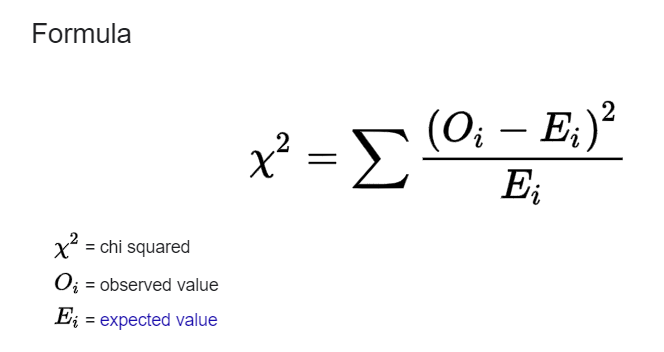

<Axes: >

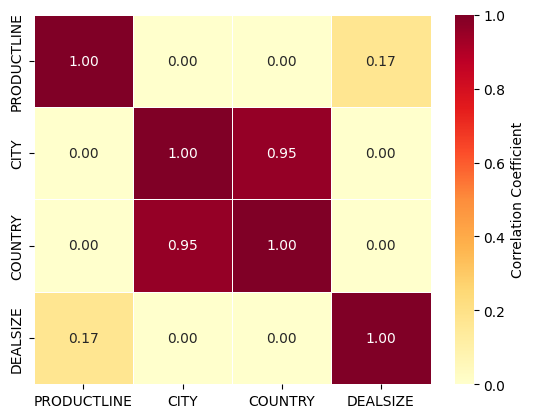

In [ ]:
# categorical list without
tmp_1 = ['PRODUCTLINE','CITY','COUNTRY','DEALSIZE']
# correlation of the categorical features
df_1 = df1[tmp_1]
chi_square = pd.DataFrame(abs(np.random.randn(len(tmp_1),len(tmp_1))), columns= tmp_1, index = tmp_1)

# cramer V statistics for correlation between categorical features
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

# chi square dataframe of categorical features
for i in tmp_1:
    temp_list = [k for k in tmp_1 if k!=i]
    for j in temp_list:
        confusion_matrix = pd.crosstab(df_1[i],df_1[j])
        val = cramers_corrected_stat(confusion_matrix)
        chi_square[i][j] = float(val) # column, row
        chi_square[i][i] = 1

# heatmap of categorical features (exclude the complex string)
sns.heatmap(chi_square, cmap='YlOrRd', annot=True, linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
# chi_square

**Key insights from the heatmap:**

***PRODUCTLINE and PRODUCTCODE*** have a strong positive correlation*** (0.98)***.

***CITY and COUNTRY*** are also highly correlated ***(0.99)***, suggesting they are closely related.

***DEALSIZE***  shows moderate correlation with ***PRODUCTCODE (0.42)***, but low or no significant correlation with the other variables.

***PRODUCTLINE*** has moderate correlation with ***CITY (0.31)*** but weak correlations with the rest of the variables.

In [ ]:
# df1.isnull().sum()

In [ ]:
# # Get unique product codes
# unique_product_codes = df3['PRODUCTLINE'].unique()
# tmp_2 = ['PRODUCTLINE','CITY','COUNTRY','DEALSIZE']
# for product_code in unique_product_codes:
#     # Filter data for the specific product code
#     product_data = df3[df3['PRODUCTLINE'] == product_code].copy()
#     for i in tem_2:
#     sns.countplot(x=i, data=df1)
#     plt.xticks(rotation=90)
#     plt.title('Count of {}'.format(i))
#     plt.show()
#     sns.stripplot(x=i, y='SALES', data=df1, jitter=True)
#     plt.xticks(rotation=90)
#     plt.title('{} vs. Sales'.format(i))
#     plt.show()

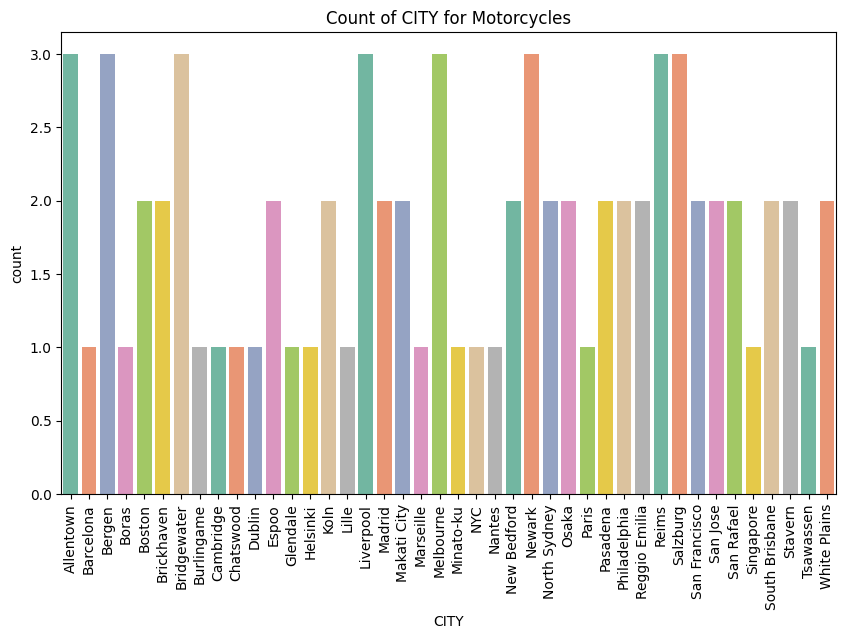

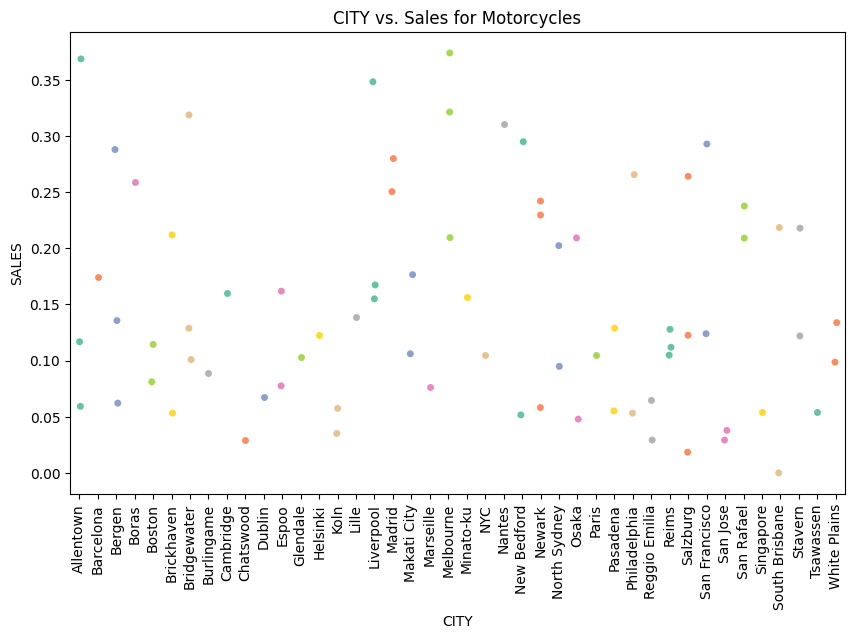

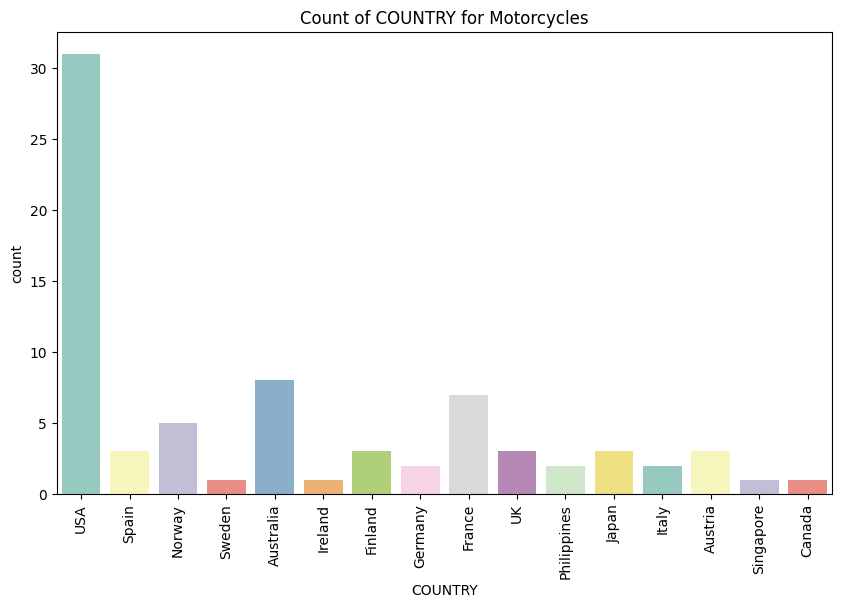

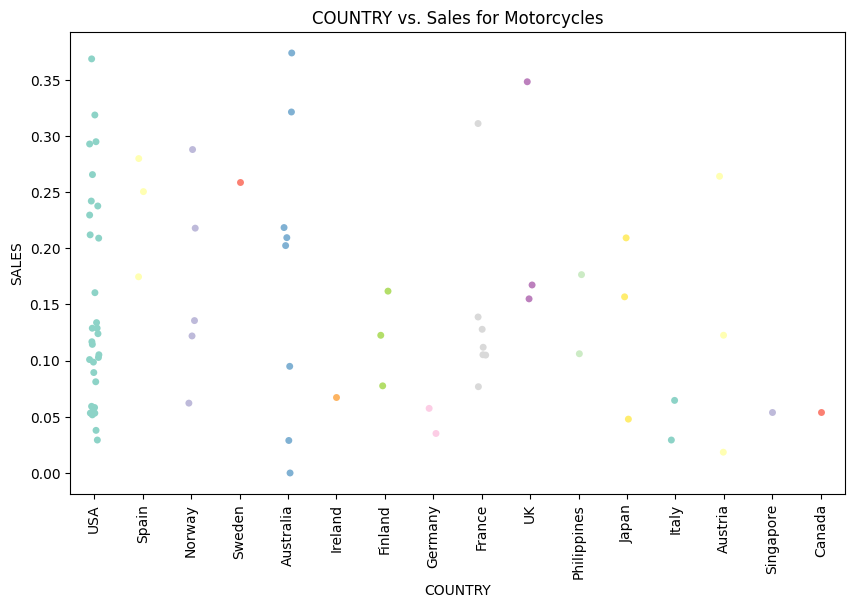

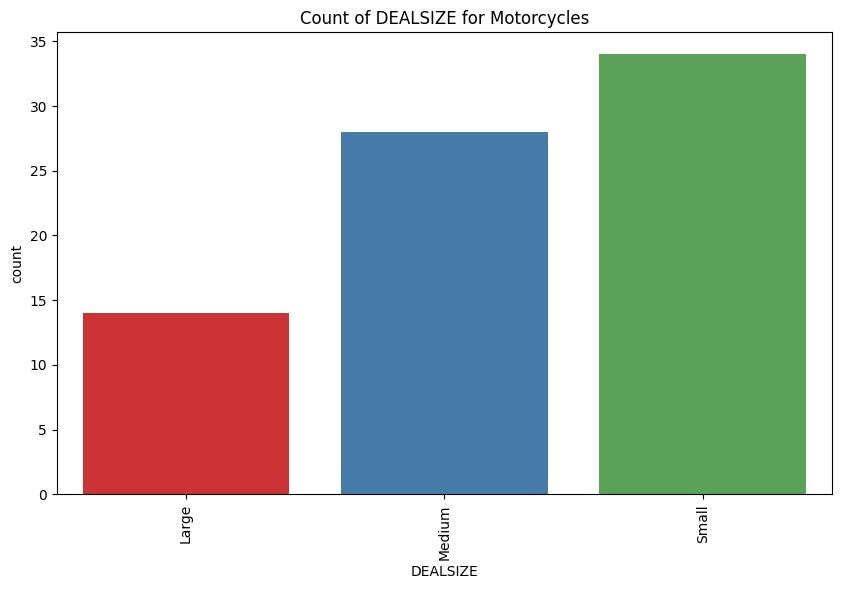

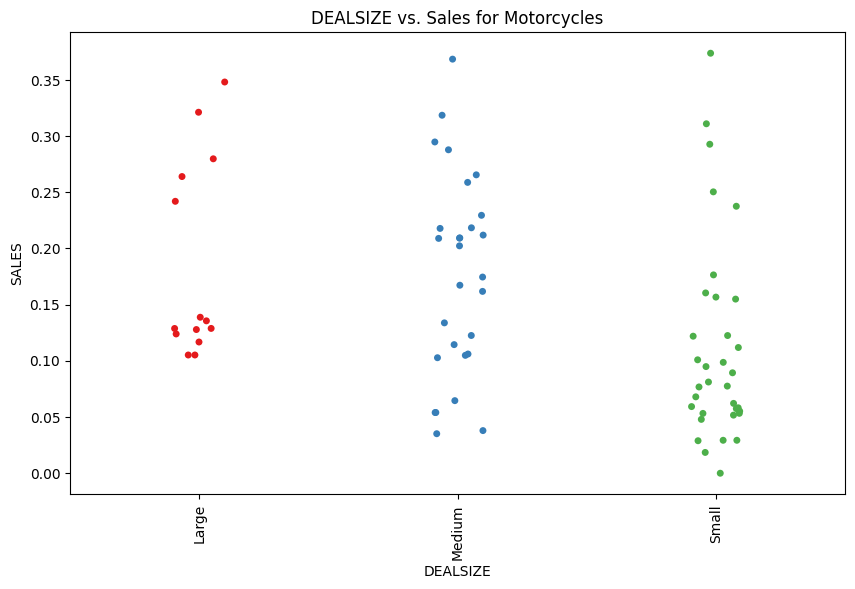

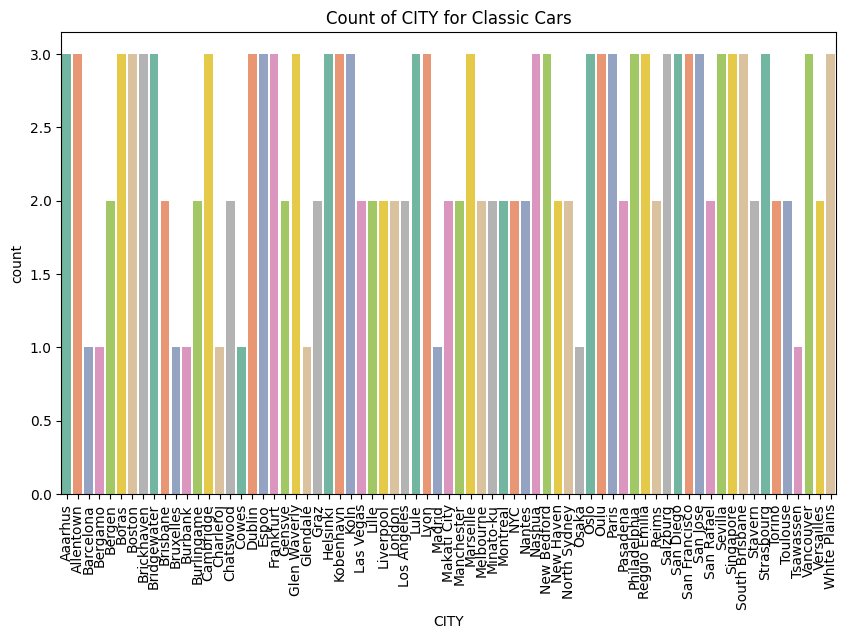

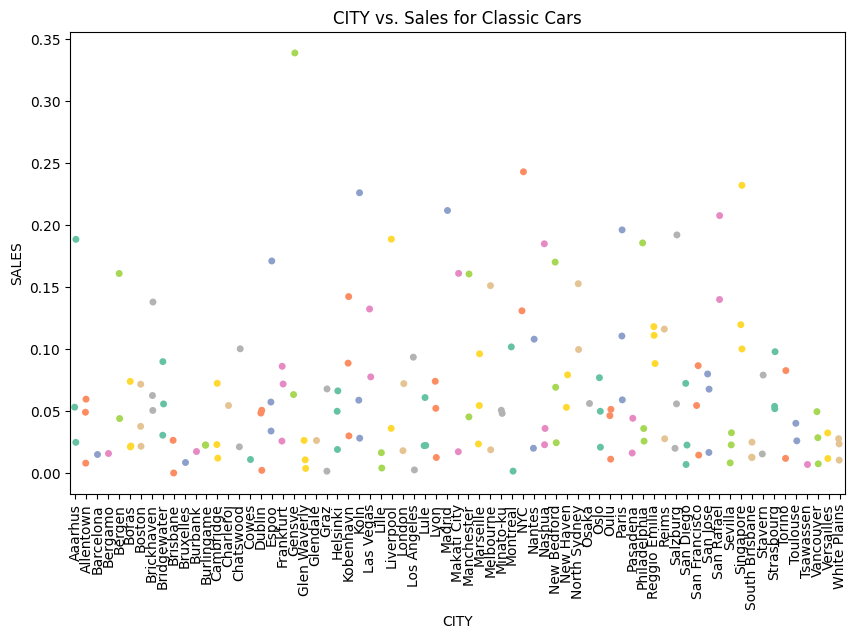

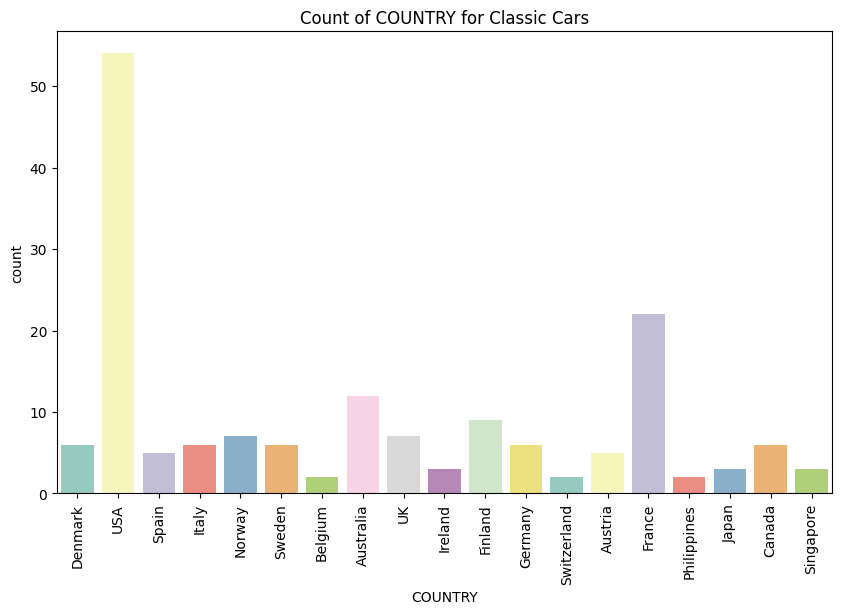

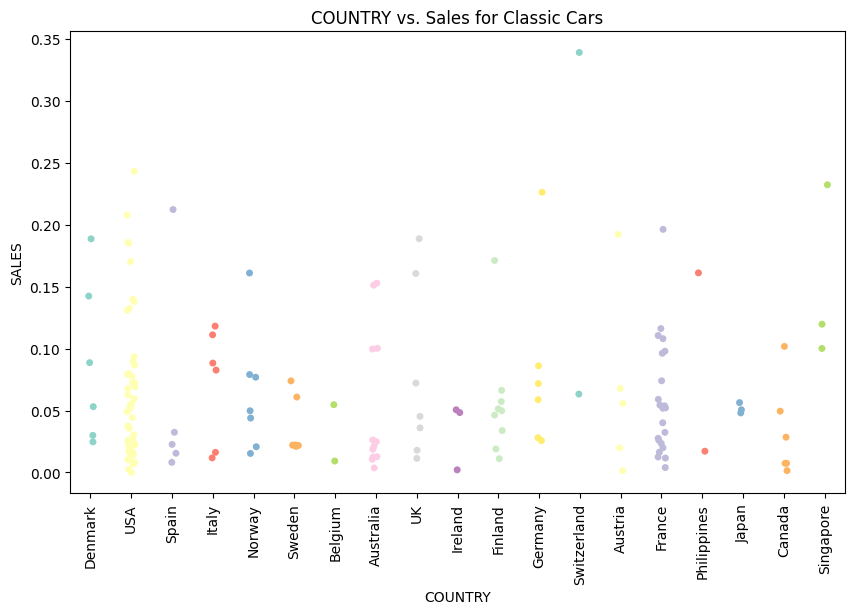

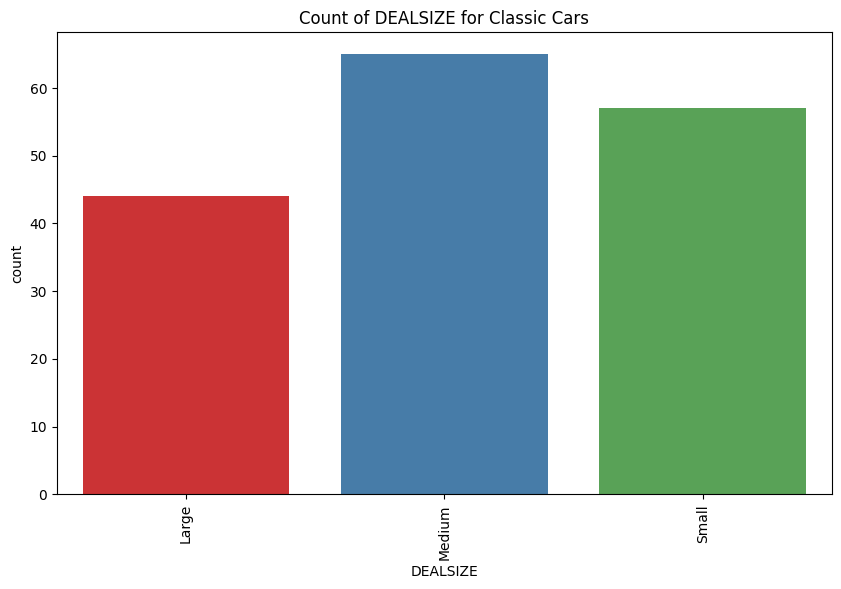

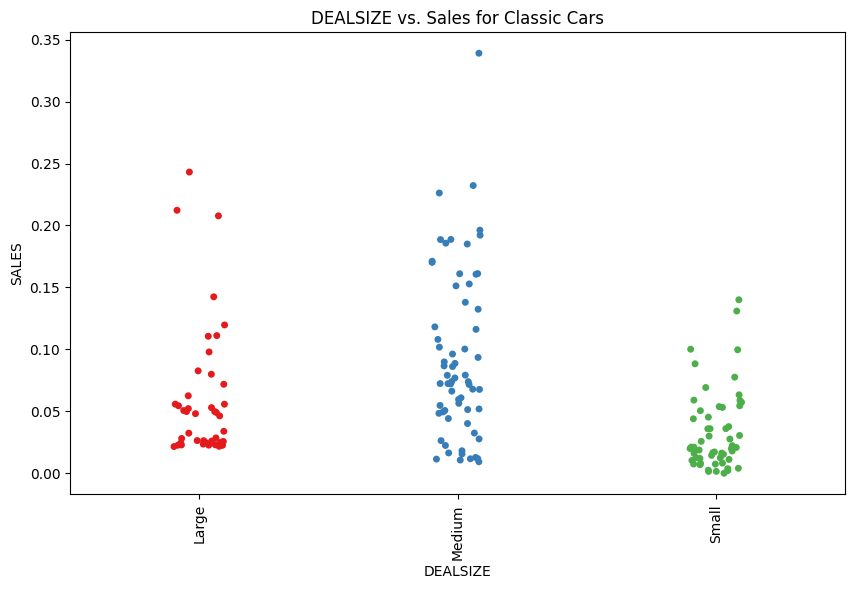

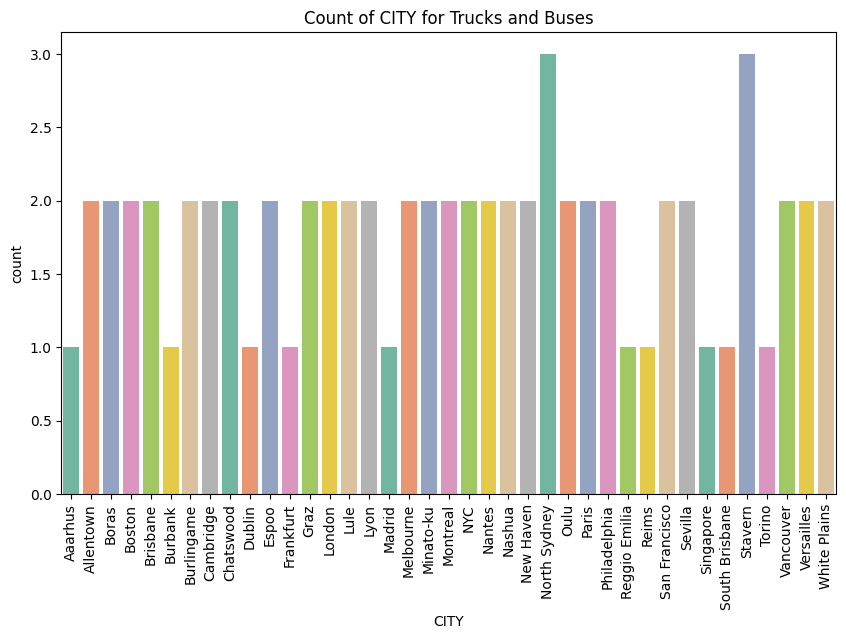

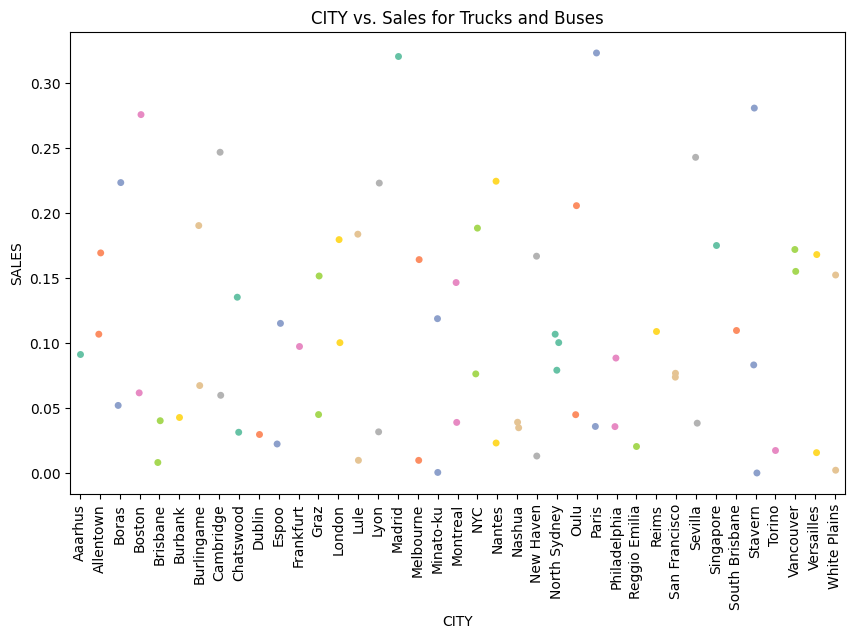

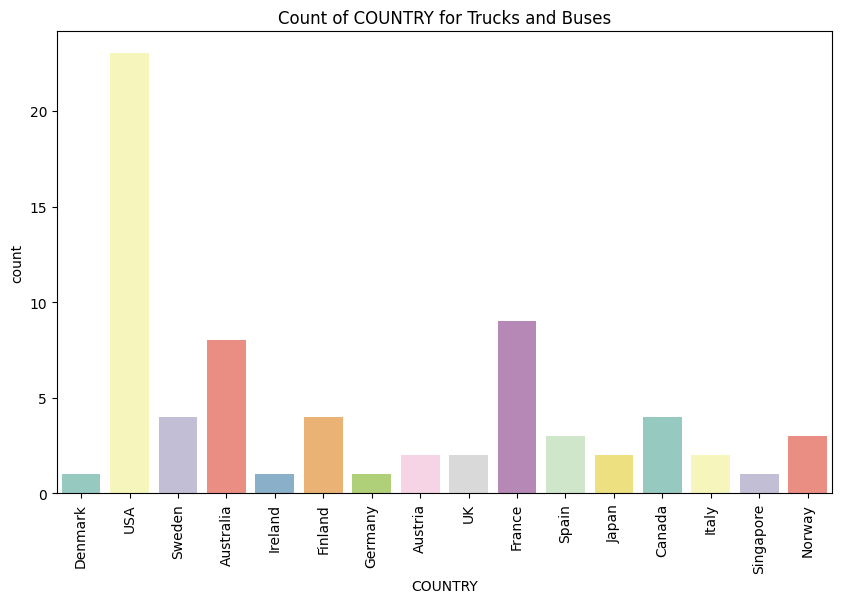

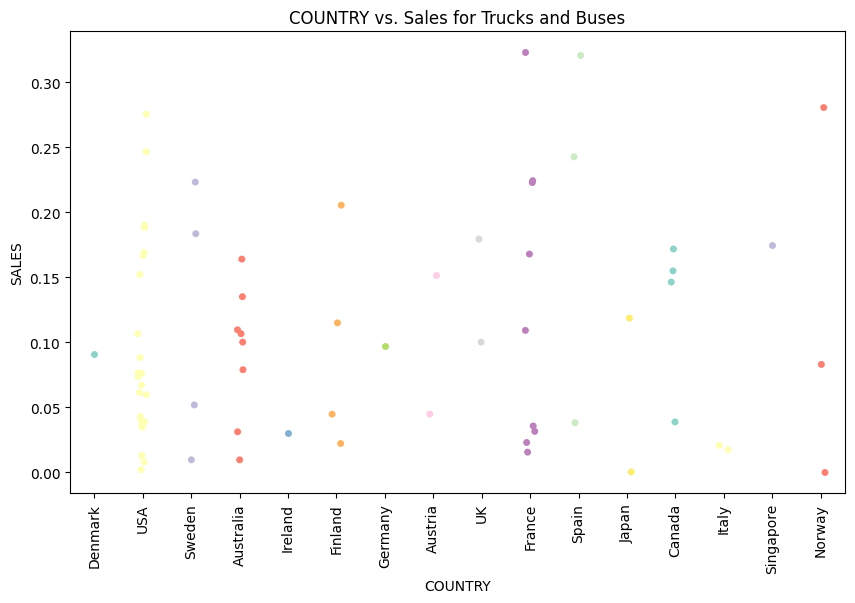

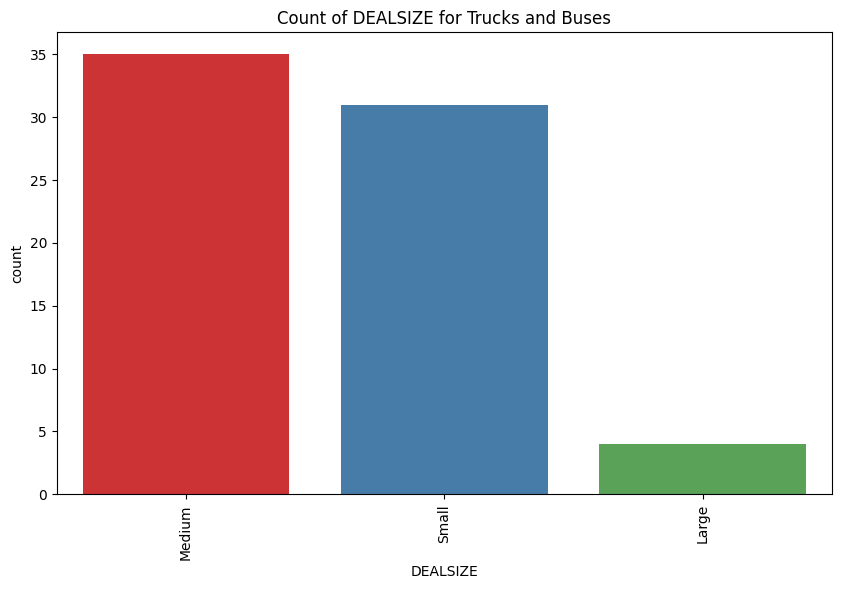

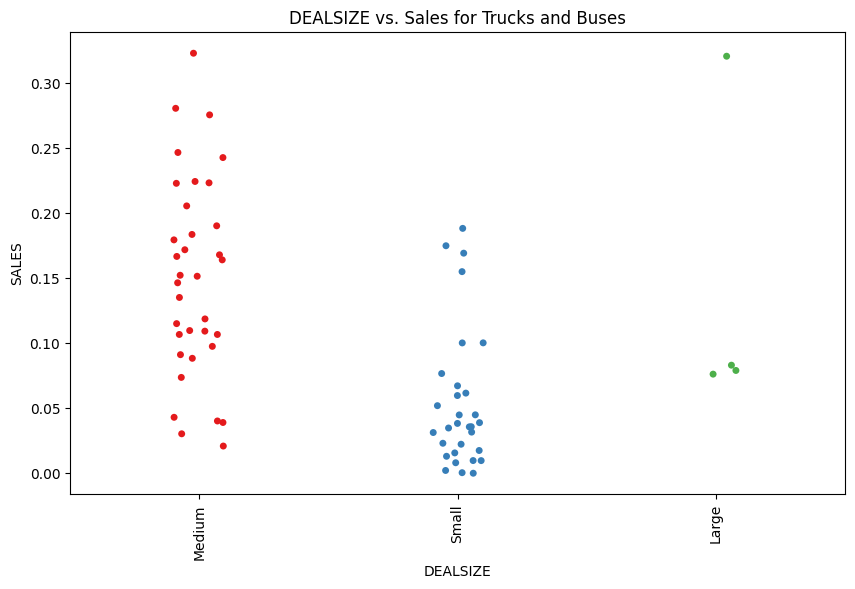

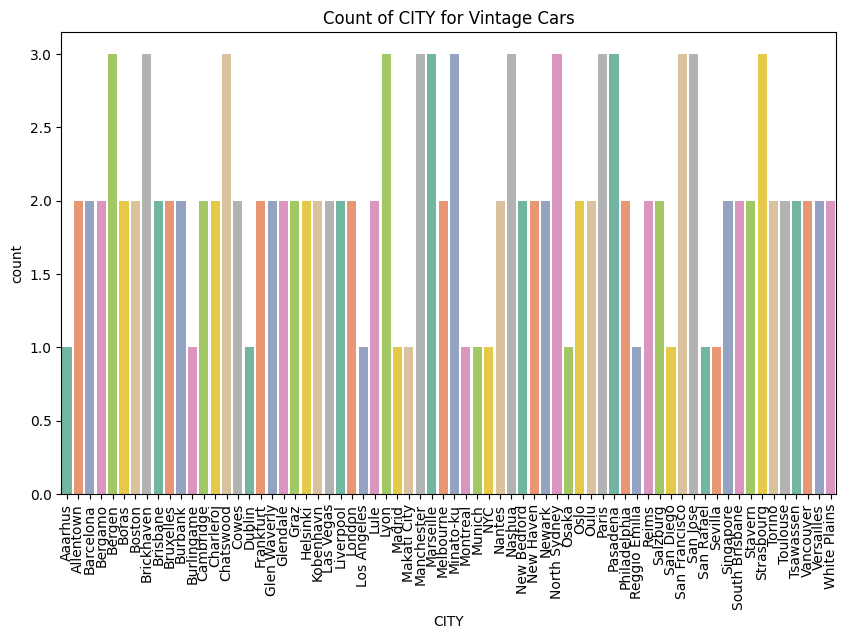

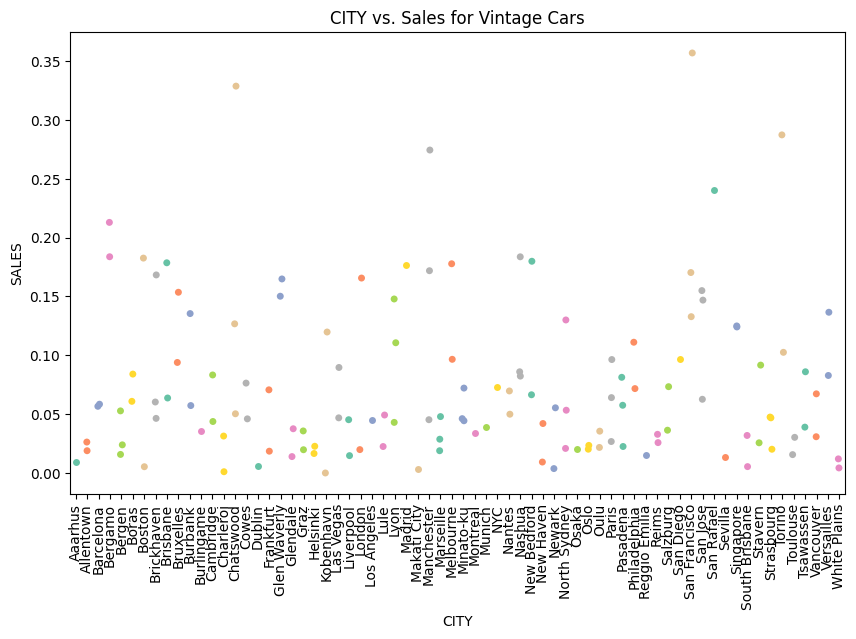

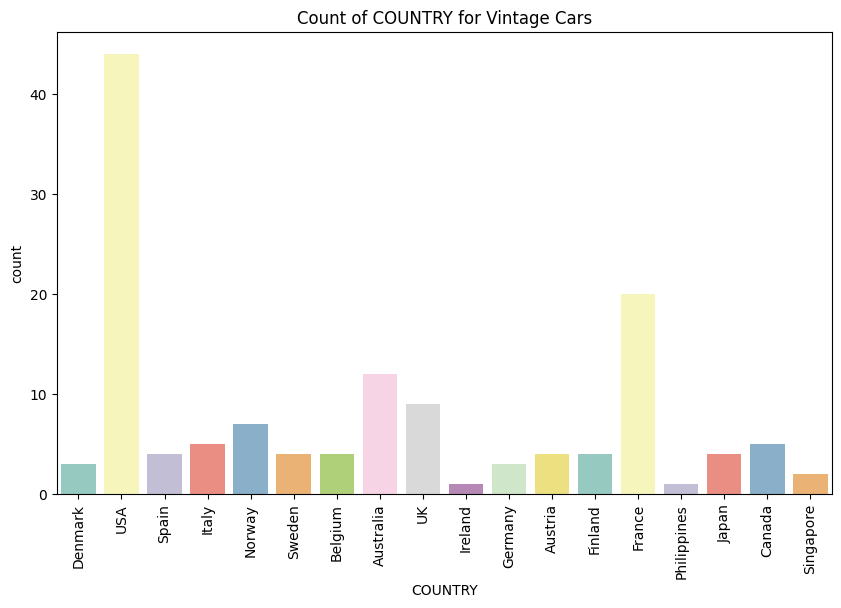

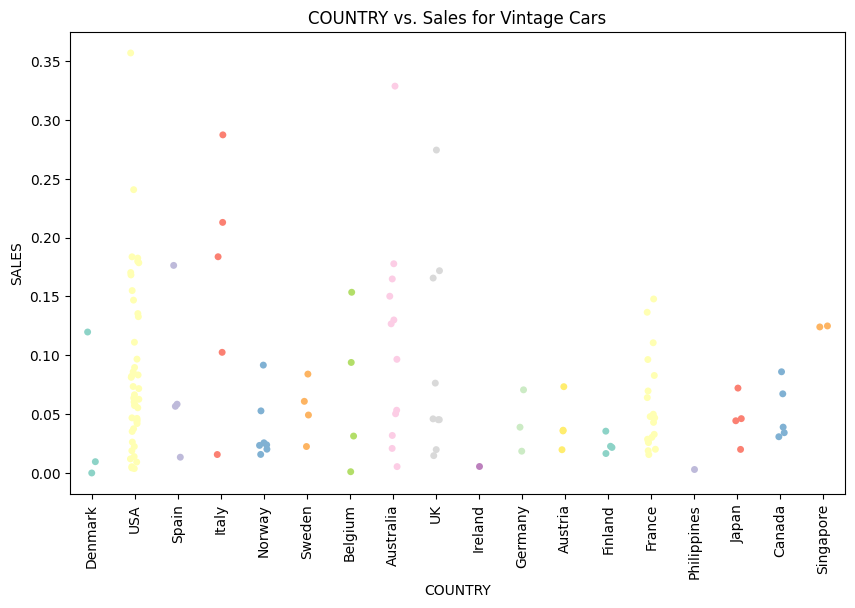

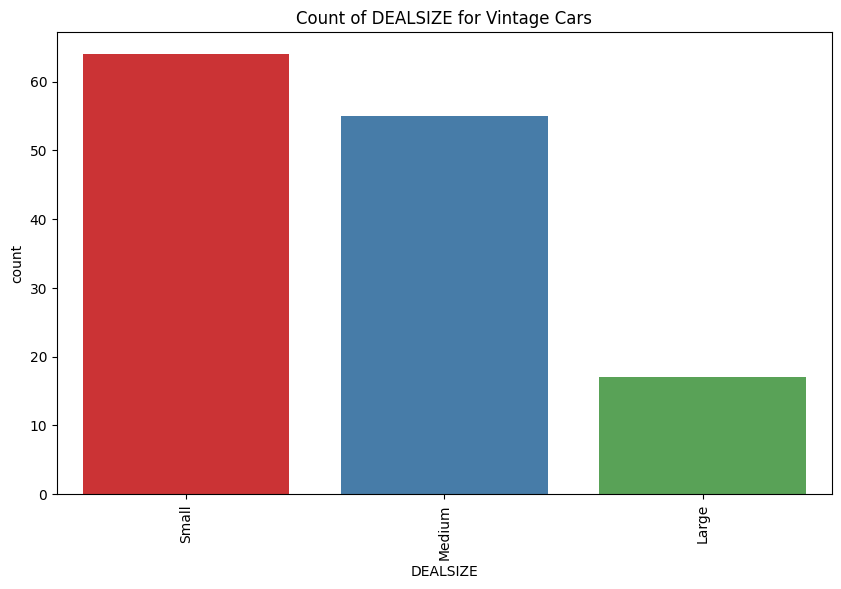

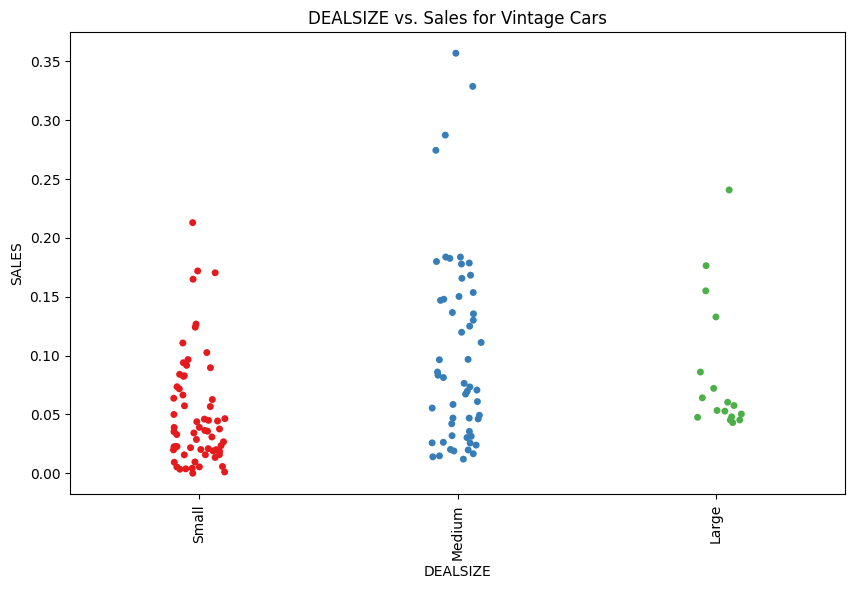

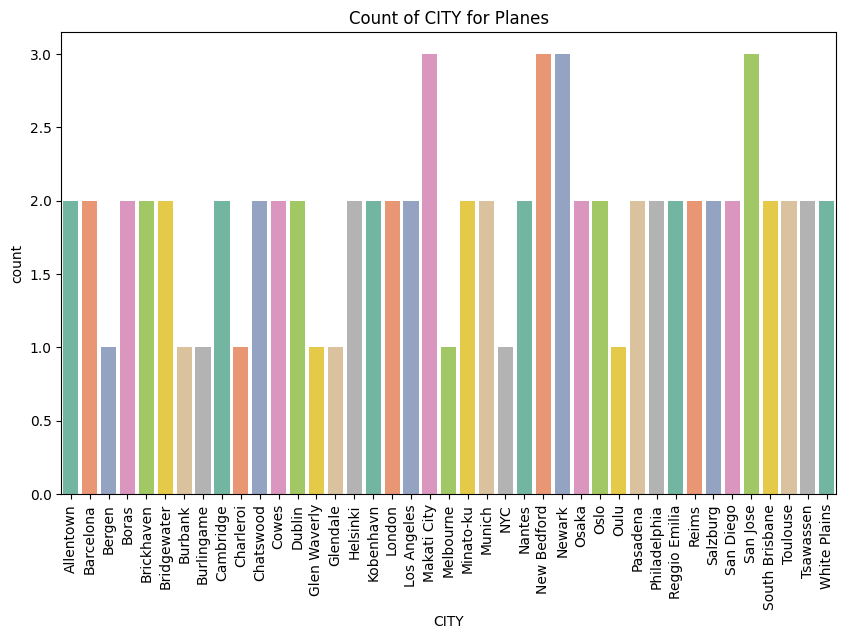

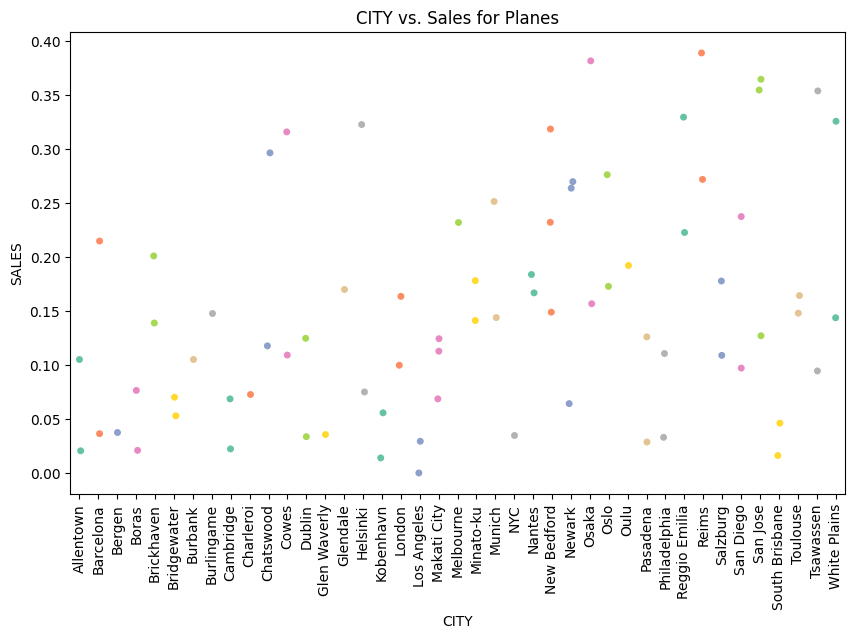

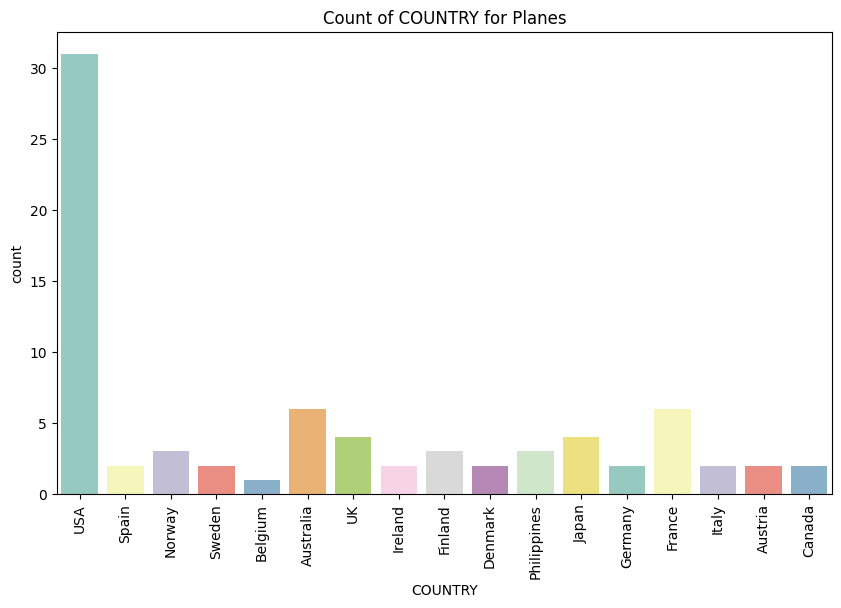

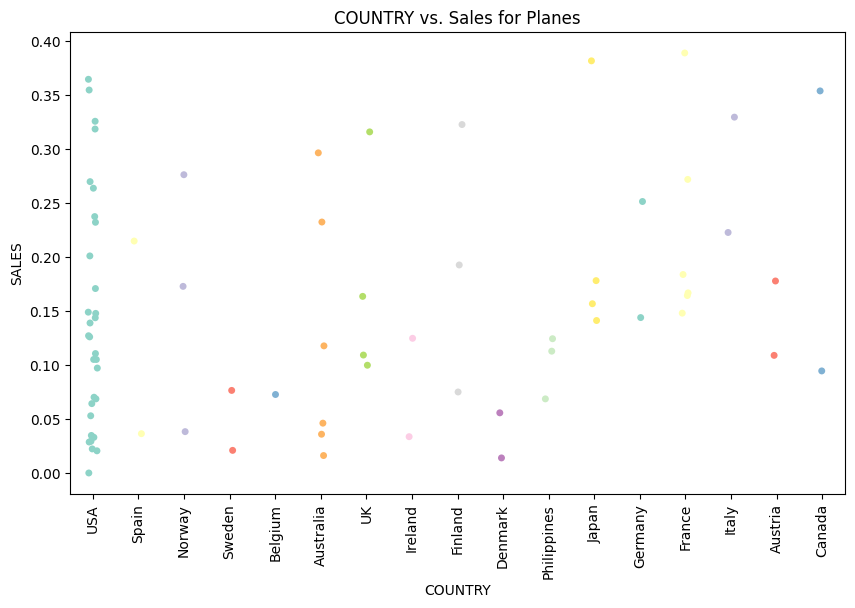

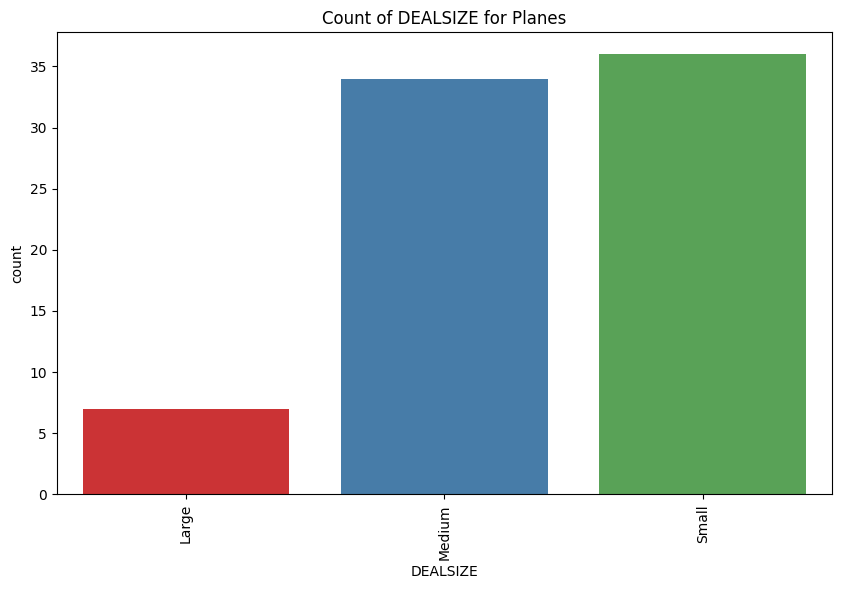

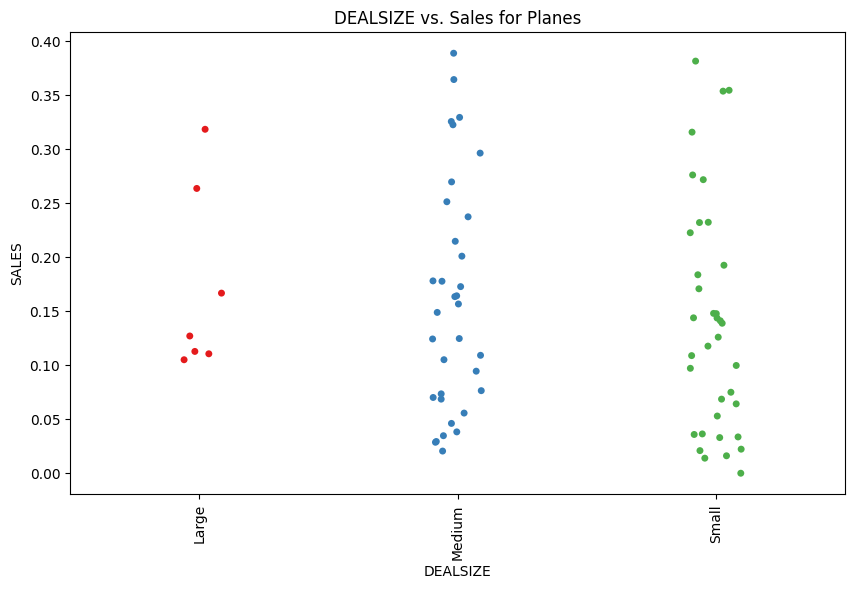

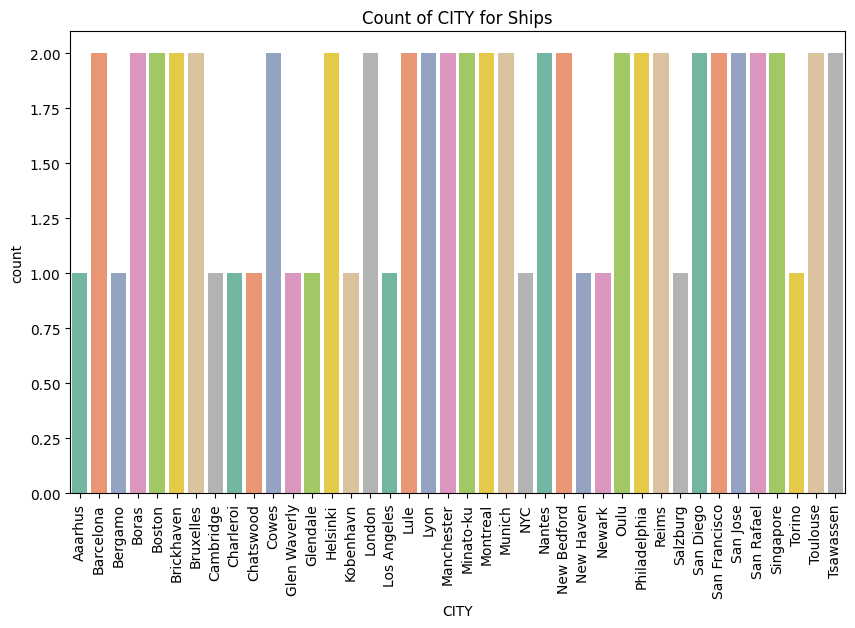

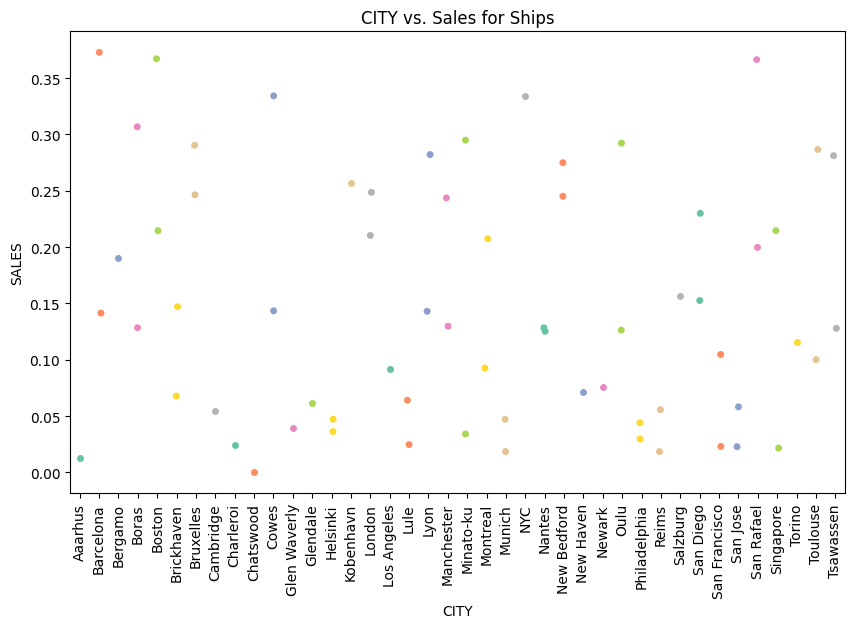

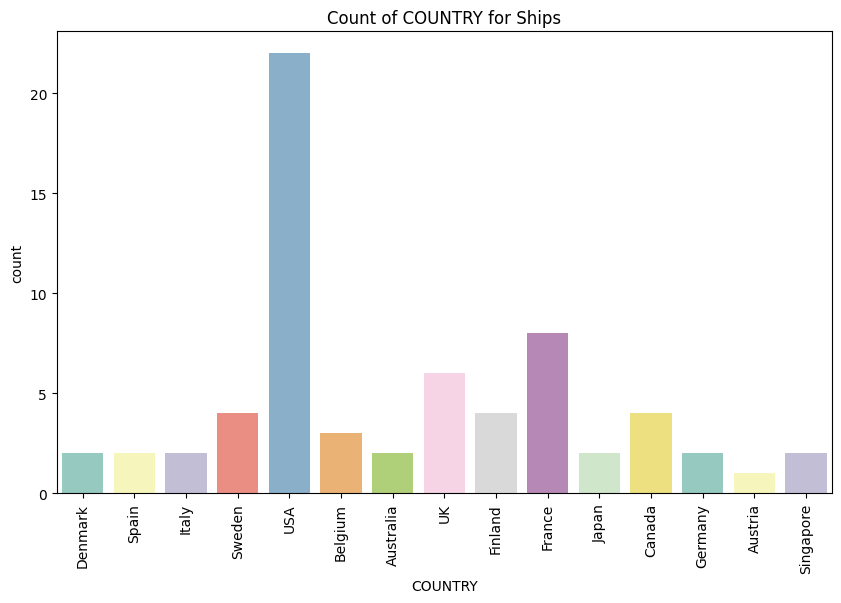

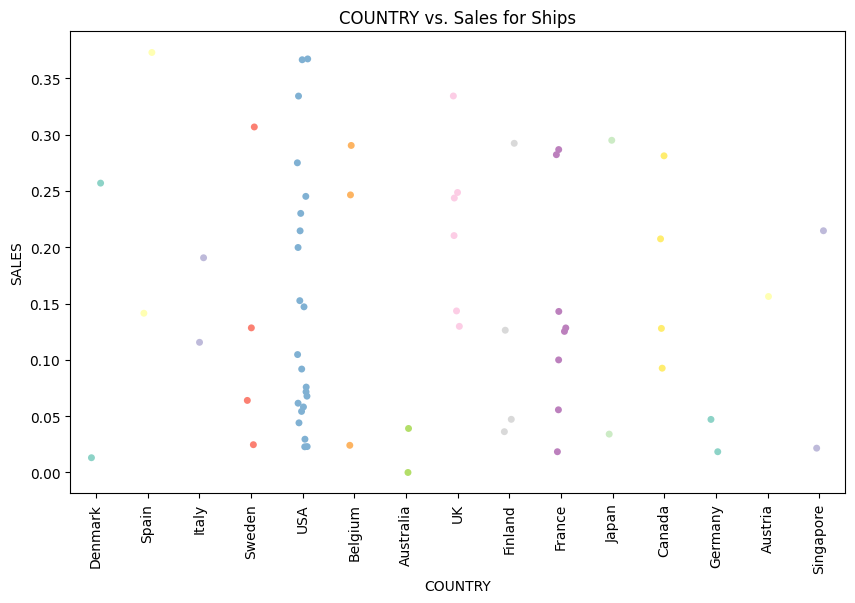

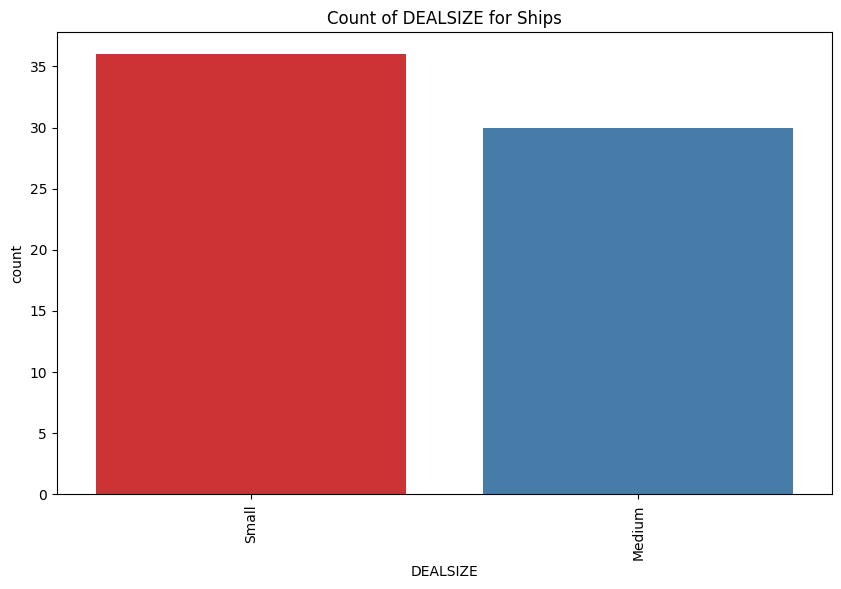

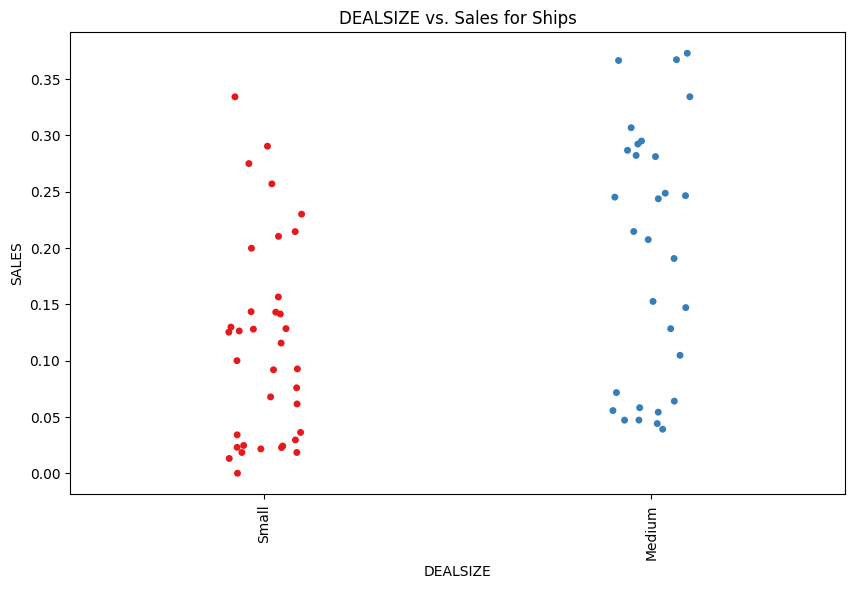

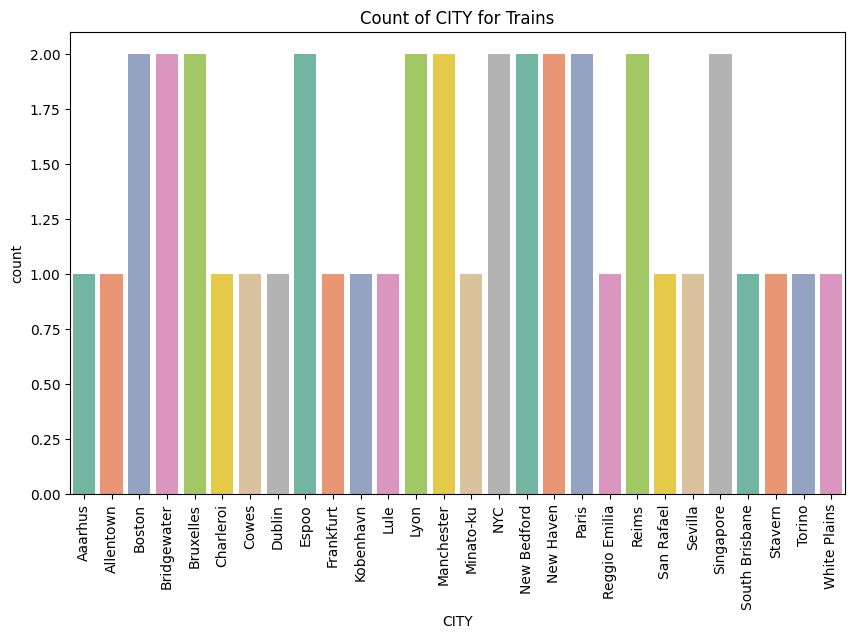

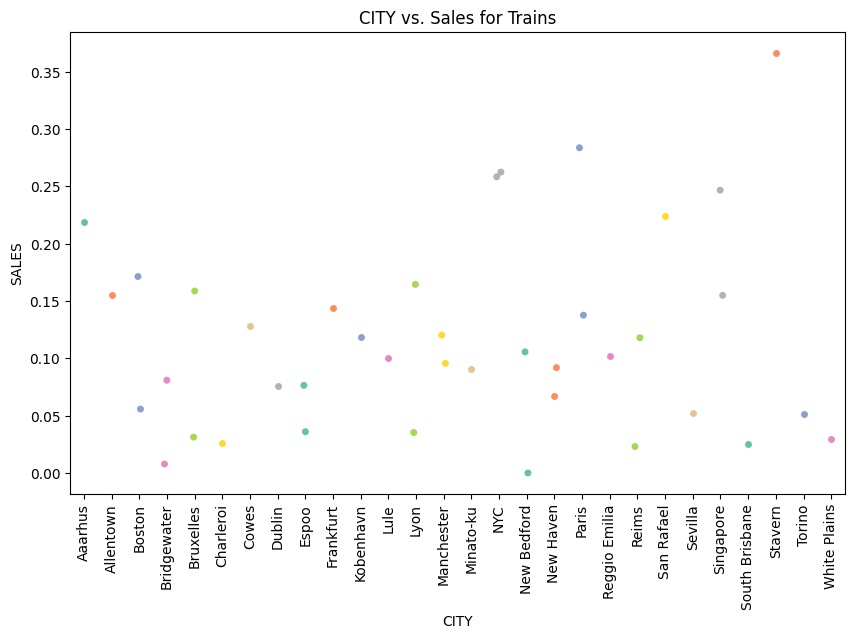

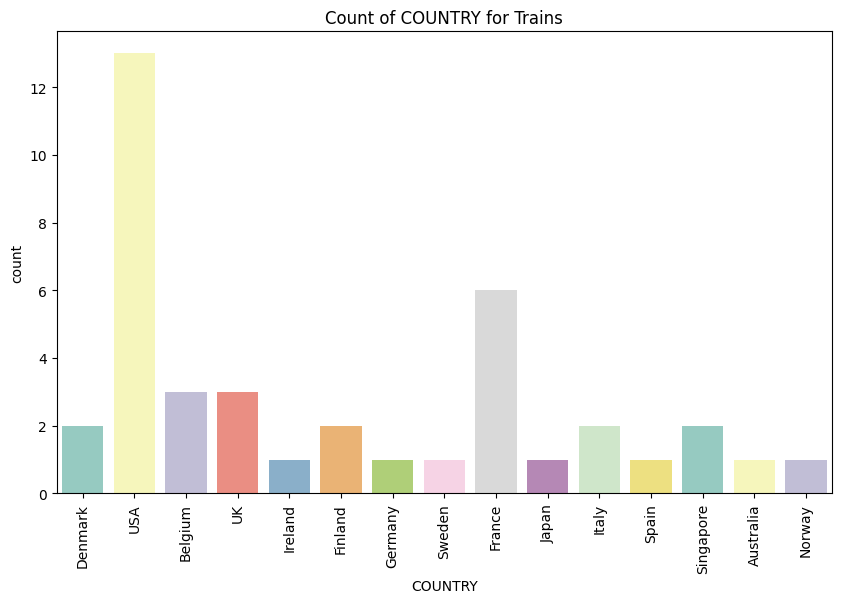

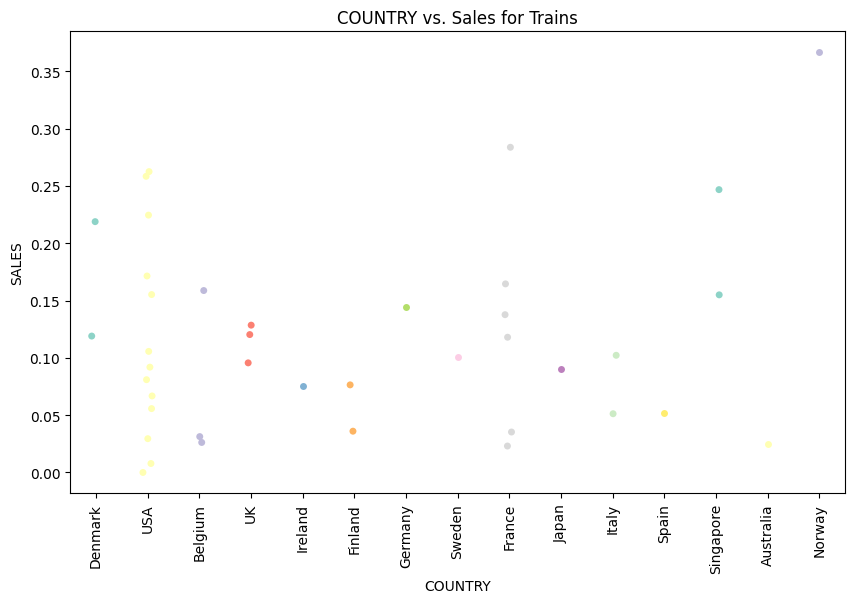

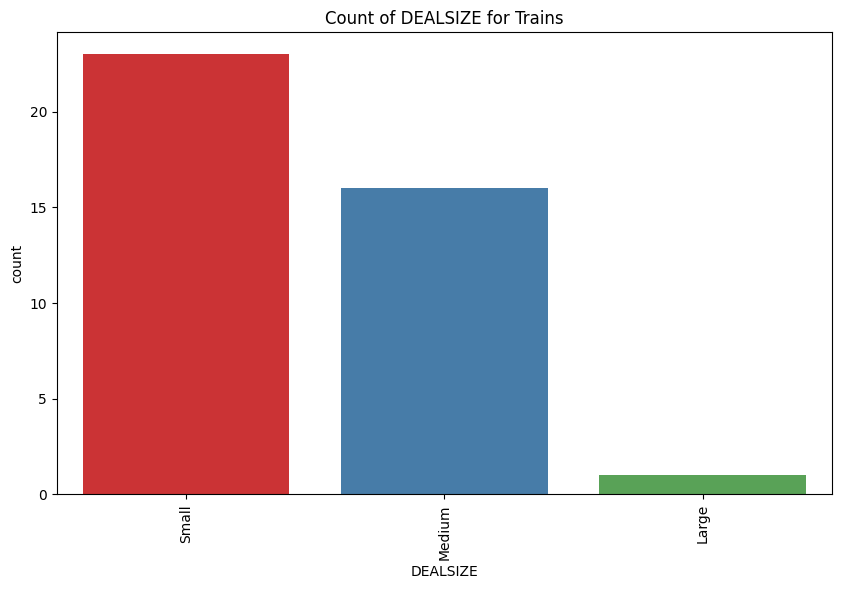

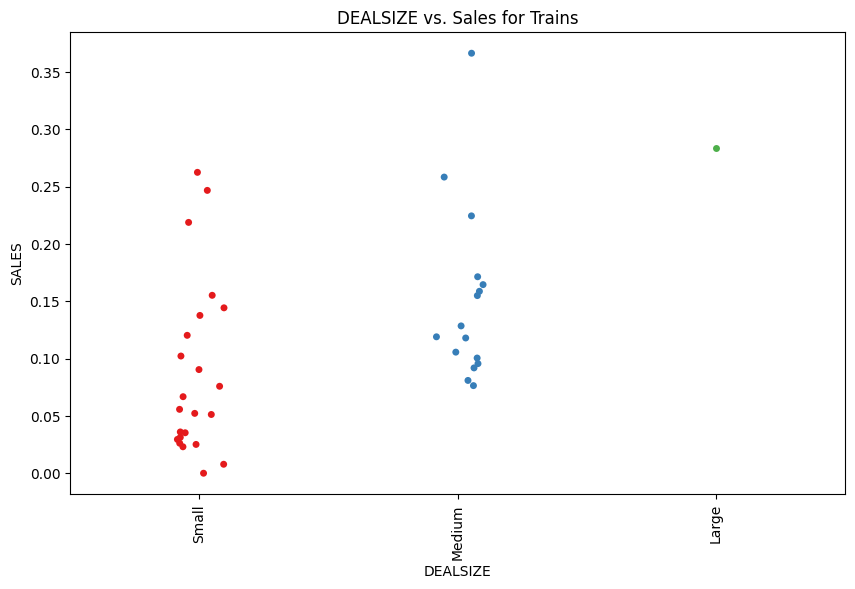

In [ ]:
###impact of categorical var on sales
# Define a color palette for each categorical feature
palette_city = sns.color_palette("Set2", len(df1['CITY'].unique()))
palette_country = sns.color_palette("Set3", len(df1['COUNTRY'].unique()))
palette_dealsize = sns.color_palette("Set1", len(df1['DEALSIZE'].unique()))

# Dictionary to map feature to respective palette
feature_palette = {
    'CITY': palette_city,
    'COUNTRY': palette_country,
    'DEALSIZE': palette_dealsize
}


unique_product_codes = df1['PRODUCTLINE'].unique()
categorical_features = ['CITY', 'COUNTRY', 'DEALSIZE']

for product_code in unique_product_codes:
    product_data = df1[df1['PRODUCTLINE'] == product_code].copy()

    for feature in categorical_features:
        # Plot count of each category in the feature
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, data=product_data, palette=feature_palette[feature])
        plt.xticks(rotation=90)
        plt.title(f'Count of {feature} for {product_code}')
        plt.show()
        plt.figure(figsize=(10, 6))
        sns.stripplot(x=feature, y='SALES', data=product_data, jitter=True, palette=feature_palette[feature])
        plt.xticks(rotation=90)
        plt.title(f'{feature} vs. Sales for {product_code}')
        plt.show()


In [ ]:
#check the size of the categorical  features
for i in [df['CITY'],df['COUNTRY'],df['PRODUCTLINE'] , df['DEALSIZE']]:
  print (len(i.unique()))

73
19
7
3


## ***Moving Average for Each Product***

***Best Practice:***

**For Time Series Forecasting:** Using ORDERDATE as an index is appropriate and often necessary.

**For General Machine Learning:** It’s better to keep ORDERDATE as a regular column so that you can engineer time-based features from it. If you do use it as an index, ensure you extract the necessary features from the date before applying the machine learning model.

In [ ]:
df1.shape

(631, 12)

In [ ]:
df2=df1.copy()

In [ ]:
# Sort df2 by ORDERDATE
df2=df1.copy()
df2 = df2.sort_values(by='ORDERDATE')
# Set ORDERDATE as the index
df2.set_index('ORDERDATE', inplace=True)

In [ ]:
df2.shape

(631, 11)

In [ ]:
#this df has filtered dataframe
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

In [ ]:
# df2.set_index('ORDERDATE', inplace=True) #convert the ORDERDATE in index so helpful in

In [ ]:
# df2[(df2['SALES'] >= 0.2) & (df2['SALES'] <= 3)]

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define a color palette for each categorical feature
# palette_city = sns.color_palette("Set2", len(df2['CITY'].unique()))
# palette_country = sns.color_palette("Set3", len(df2['COUNTRY'].unique()))
# palette_dealsize = sns.color_palette("Set1", len(df2['DEALSIZE'].unique()))

# # Dictionary to map feature to respective palette
# feature_palette = {
#     'CITY': palette_city,
#     'COUNTRY': palette_country,
#     'DEALSIZE': palette_dealsize
# }

# # Get unique product codes
# unique_product_codes = df2['PRODUCTLINE'].unique()
# categorical_features = ['CITY', 'COUNTRY', 'DEALSIZE']

# for product_code in unique_product_codes:
#     # Filter data for the specific product code
#     product_data = df2[df2['PRODUCTLINE'] == product_code].copy()

#     for feature in categorical_features:
#         # Plot count of each category in the feature
#         plt.figure(figsize=(10, 6))
#         sns.countplot(x=feature, data=product_data, palette=feature_palette[feature])
#         plt.xticks(rotation=90)
#         plt.title(f'Count of {feature} for {product_code}')
#         plt.show()

#         # Plot SALES vs. each categorical feature with color for each category
#         plt.figure(figsize=(10, 6))
#         sns.stripplot(x=feature, y='SALES', data=product_data, jitter=True, palette=feature_palette[feature])
#         plt.xticks(rotation=90)
#         plt.title(f'{feature} vs. Sales for {product_code}')
#         plt.show()

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

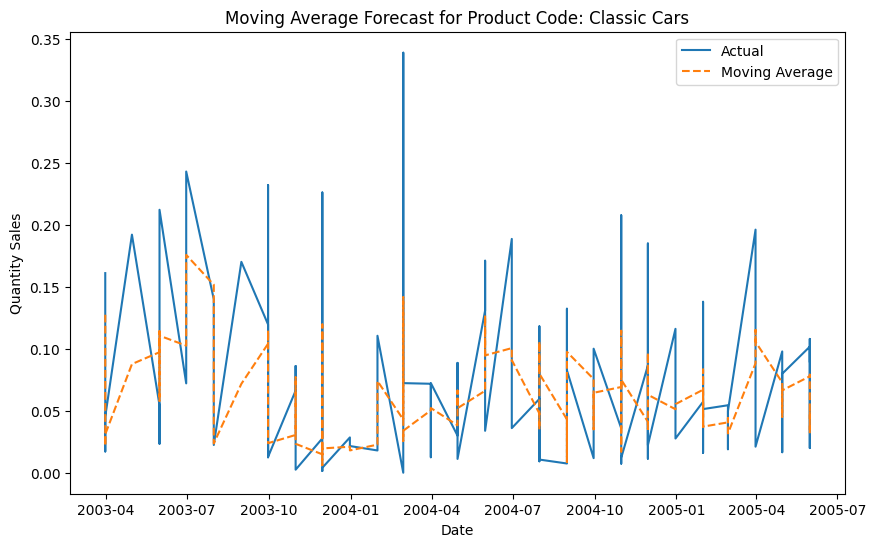

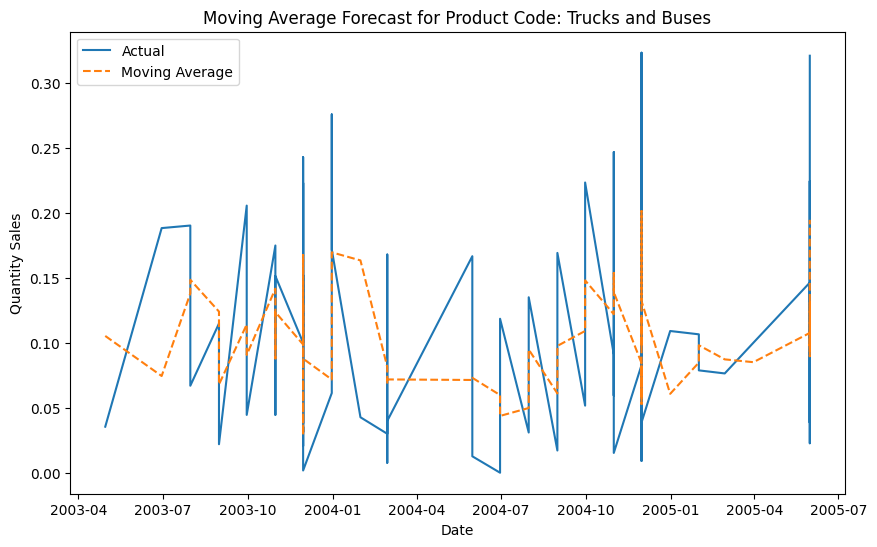

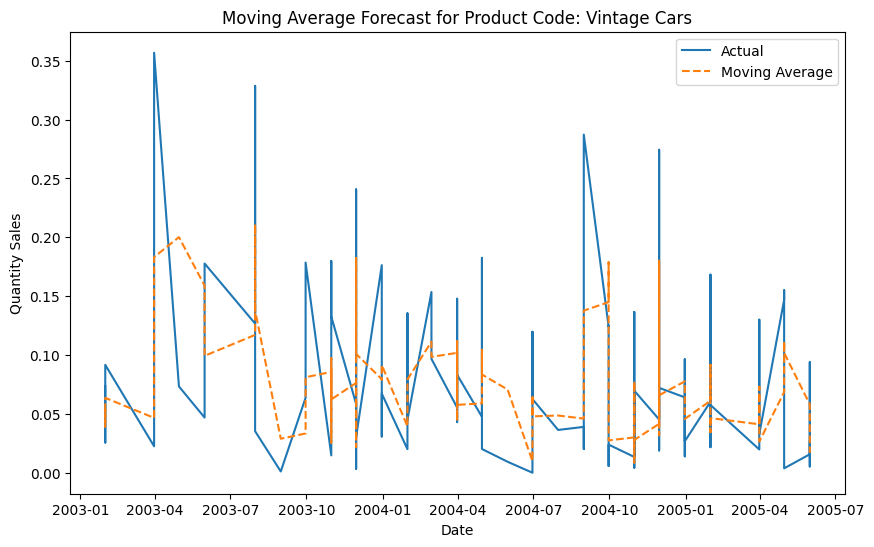

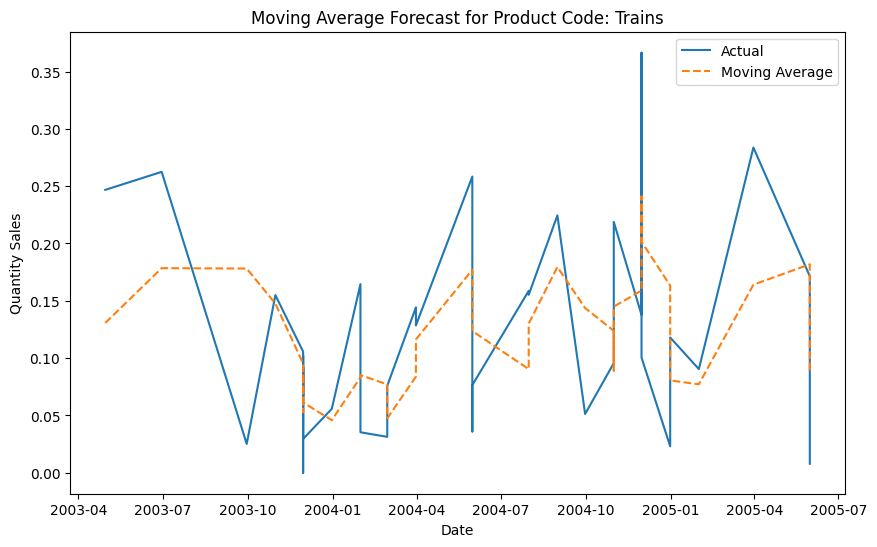

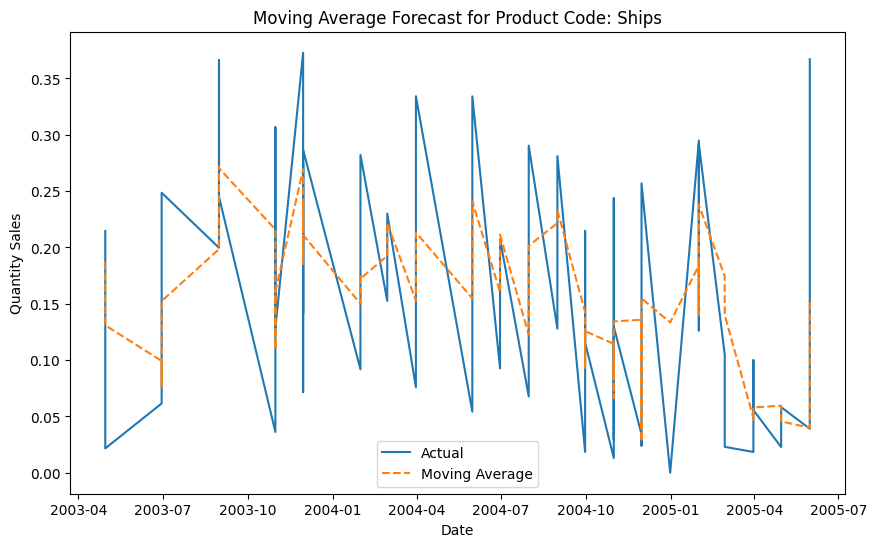

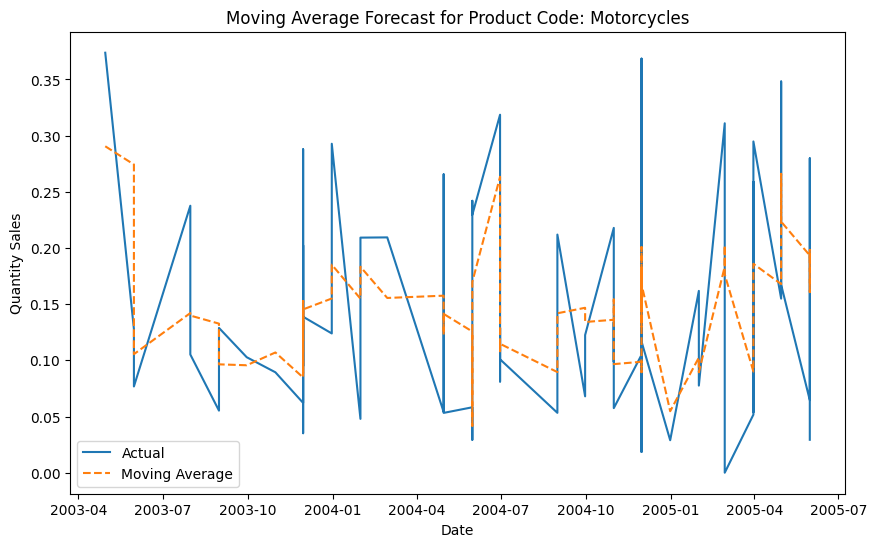

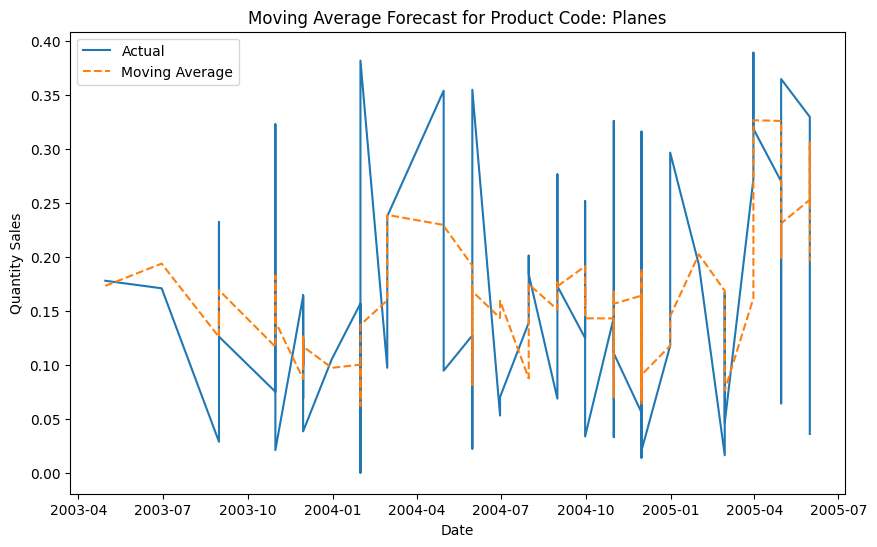

In [ ]:
unique_product_codes = df2['PRODUCTLINE'].unique()

# Dictionary to store the moving average results for each product
moving_avg_results = {}

for product_code in unique_product_codes:
    # Filter data for the current product
    product_data = df2[df2['PRODUCTLINE'] == product_code].copy()

    # Sort by the index (ORDERDATE)
    product_data = product_data.sort_index()

    # Calculate the moving average (for 3-period)
    product_data['Moving_Avg'] = product_data['SALES'].rolling(window=3).mean()

    # Drop the initial rows where moving average could not be computed
    product_data = product_data.dropna(subset=['Moving_Avg'])

    # Store the result in the dictionary
    moving_avg_results[product_code] = product_data

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data['SALES'], label='Actual')
    plt.plot(product_data.index, product_data['Moving_Avg'], label='Moving Average', linestyle='--')
    plt.title(f'Moving Average Forecast for Product Code: {product_code}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sales')
    plt.legend()
    plt.show()


In [ ]:
moving_avg_results[product_code].head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH  \
ORDERDATE                                                               
2003-04-30     Salzburg  Austria   Medium         0.097015   1.000000   
2003-06-30     Glendale      USA    Small         0.197761   0.514410   
2003-08-31     Pasadena      USA   Medium         0.027985   0.774724   
2003-08-31  New Bedford      USA    Small         0.289179   0.525252   
2003-08-31  New Bedford      USA   Medium         0.080224   1.000000   

               SALES      MSRP  QTR_ID  MONTH_ID  YEAR_ID PRODUCTLINE  \
ORDERDATE                                                               
2003-04-30  0.177833  0.643519       2         4     2003      Planes   
2003-06-30  0.170839  0.392593       2         6     2003      Planes   
2003-08-31  0.028666  0.555556       3         8     2003      Planes   
2003-08-31  0.232205  0.222222       3         8     2003      Planes   
2003-08-31  0.148960  0.694444       3         8     2003      Planes   

            Moving_Avg  
ORDERDATE               
2003-04-30    0.173074  
2003-06-30    0.193707  
2003-08-31    0.125779  
2003-08-31    0.143903  
2003-08-31    0.136610

For 5 moving Average

In [ ]:
# df2[df2['PRODUCTLINE']=='Motorcycles']['COUNTRY'].unique()

In [ ]:

unique_product_codes = df2['PRODUCTLINE'].unique()
# Dictionary to store the moving average results for each product
moving_avg_results1 = {}

for product_code in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product_code]  #filter
    #Sort by ORDERDATE
    product_data = product_data.sort_values('ORDERDATE')
    #moving average (for 5-period)
    product_data['Moving_Avg'] = product_data['SALES'].rolling(window=5).mean()
    # Drop the initial rows where moving average could not be computed
    product_data = product_data.dropna(subset=['Moving_Avg'])
    # Store
    moving_avg_results1[product_code] = product_data
    # print(moving_avg_results[product_code])

## ***Evaluation Metrics***

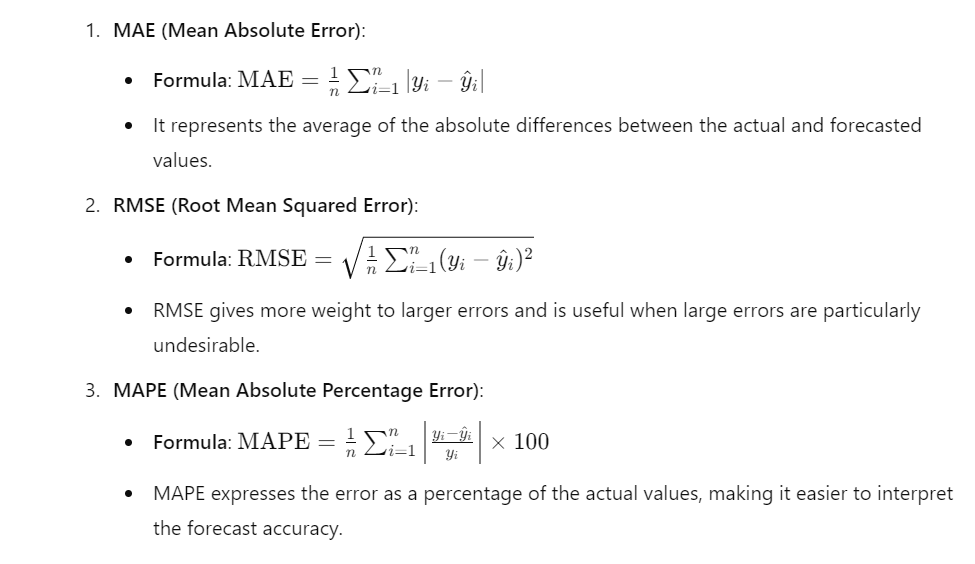

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df2.shape

(631, 11)

In [ ]:
mae_list = []
rmse_list = []
mape_list = []
product_code_list = []

# Loop through each unique product code
for product_code in unique_product_codes:
    # Filter data for the current product code
    product_data = moving_avg_results[product_code]

    # Ensure there are no missing values
    product_data = product_data.dropna(subset=['SALES', 'Moving_Avg'])

    # Calculate errors
    actual = product_data['SALES']
    forecast = product_data['Moving_Avg']

    # Calculate MAE
    mae = mean_absolute_error(actual, forecast)
    mae_list.append(mae)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    rmse_list.append(rmse)

    # Calculate MAPE
    mape = np.mean(np.abs((actual - forecast) / (actual+0.000000001))) * 100
    mape_list.append(mape)

    # Store the product code
    product_code_list.append(product_code)

# Optional: Create a DataFrame to store and display all metrics together
evaluation_df = pd.DataFrame({
    'Product Code': product_code_list,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'MAPE (%)': mape_list
})

print('Window size for moving average is 3')
print('\n')
print(evaluation_df)

Window size for moving average is 3


       Product Code       MAE      RMSE      MAPE (%)
0      Classic Cars  0.037987  0.049883  2.615911e+07
1  Trucks and Buses  0.055734  0.067827  3.809704e+02
2      Vintage Cars  0.041628  0.054820  7.327344e+06
3            Trains  0.057825  0.070883  2.285846e+08
4             Ships  0.068270  0.082622  2.084840e+08
5       Motorcycles  0.064169  0.079314  2.384398e+08
6            Planes  0.069970  0.086746  8.272953e+07


<Axes: >

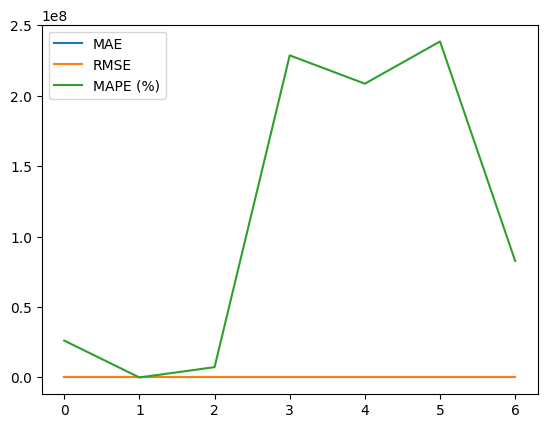

In [ ]:
evaluation_df.plot()

In [ ]:
mae_list = []
rmse_list = []
mape_list = []
product_code_list = []

# Loop through each unique product code
for product_code in unique_product_codes:
    # Filter data for the current product code
    product_data = moving_avg_results1[product_code]

    # Ensure there are no missing values
    product_data = product_data.dropna(subset=['SALES', 'Moving_Avg'])

    # Calculate errors
    actual = product_data['SALES']
    forecast = product_data['Moving_Avg']

    # Calculate MAE
    mae = mean_absolute_error(actual, forecast)
    mae_list.append(mae)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    rmse_list.append(rmse)

    # Calculate MAPE
    mape = np.mean(np.abs((actual - forecast) / (actual+0.000001))) * 100
    mape_list.append(mape)
    # Store the product code
    product_code_list.append(product_code)
# Optional: Create a DataFrame to store and display all metrics together
evaluation_df = pd.DataFrame({
    'Product Code': product_code_list,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'MAPE (%)': mape_list
})

# Display the evaluation metrics
print('Window size for moving average is 5')
print('\n')
print(evaluation_df)

Window size for moving average is 5


       Product Code       MAE      RMSE       MAPE (%)
0      Classic Cars  0.040795  0.054986   36522.447671
1  Trucks and Buses  0.061084  0.072424     496.317709
2      Vintage Cars  0.048555  0.062189   40147.129576
3            Trains  0.059459  0.074433  153350.305119
4             Ships  0.076901  0.094995   47472.067750
5       Motorcycles  0.068603  0.083444  213593.100093
6            Planes  0.073963  0.093400  124736.747153


<Axes: >

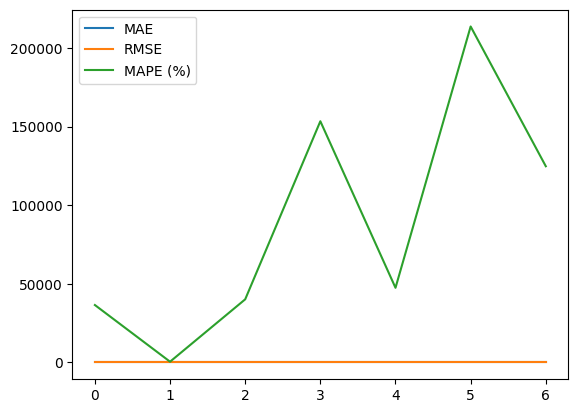

In [ ]:
evaluation_df.plot()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

## ***Exponentially Weighted Moving Average***

Exponentially Weighted Moving Average:-

An exponentially weighted moving average is a way to continuously compute a type of average for a series of numbers, as the numbers arrive. After a value in the series is added to the average, its weight in the average decreases exponentially over time. This biases the average towards more recent data. EWMAs are useful for several reasons, chiefly their inexpensive computational and memory cost, as well as the fact that they represent the recent central tendency of the series of values.

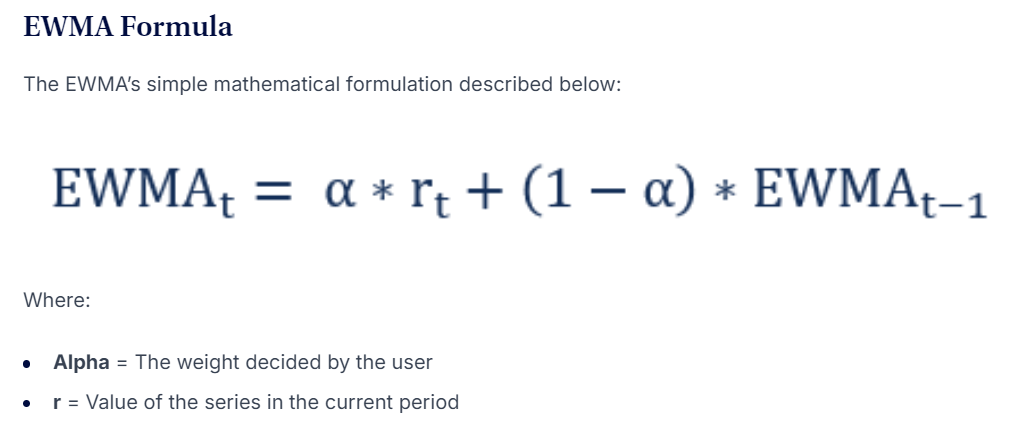

**1)** if a = 10%(small), most of the contribution will come from the previous value of the signal. In this case, “smoothing” will be very strong.

**2)** if a = 90%(large), most of the contribution will come from the current value of the signal. In this case, “smoothing” will be minimum.

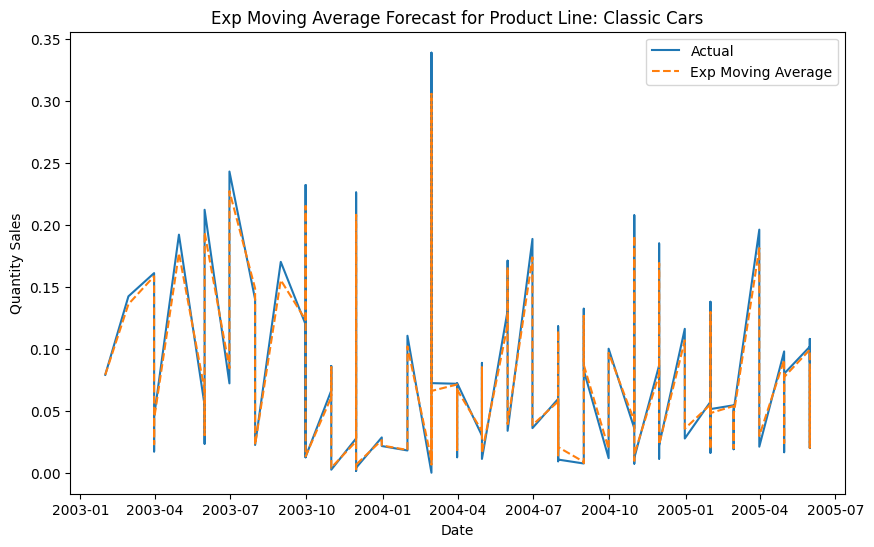

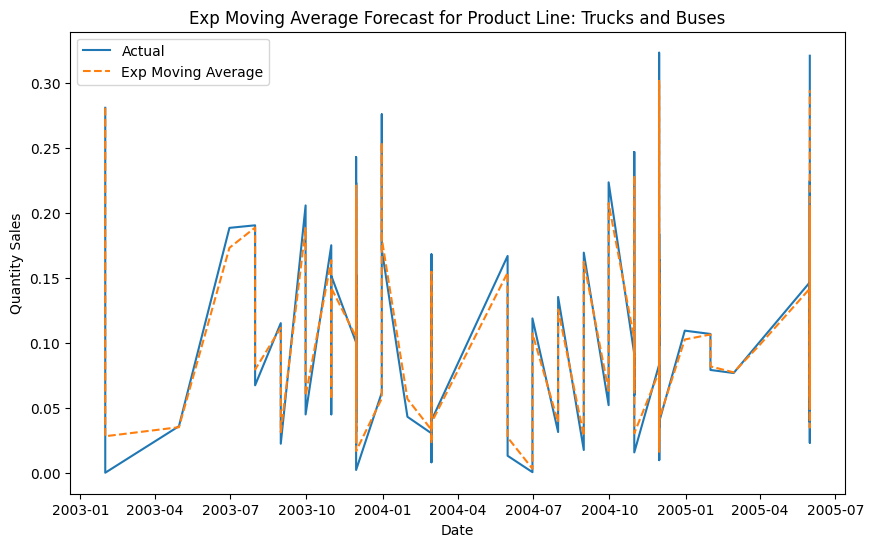

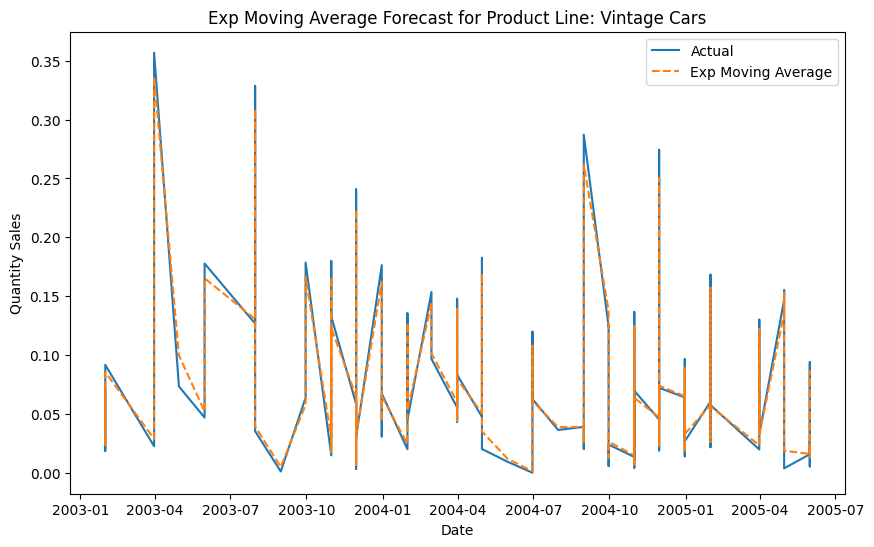

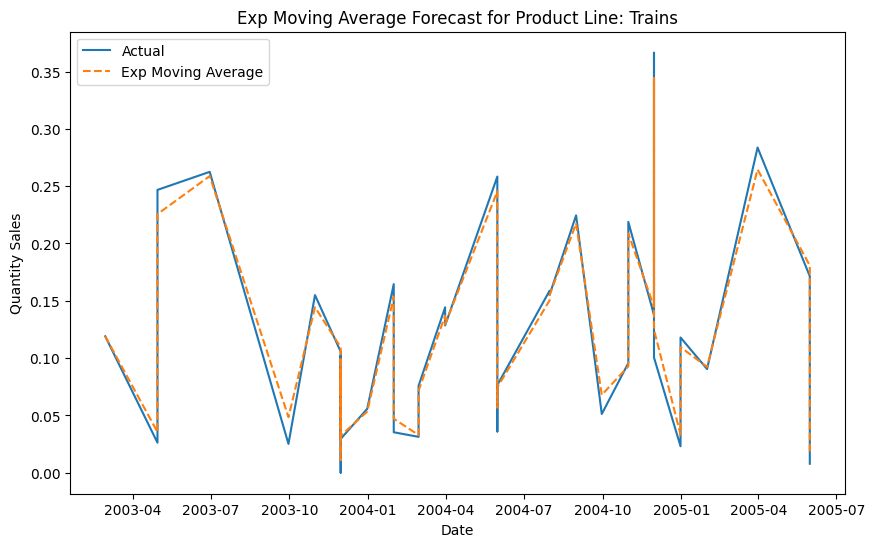

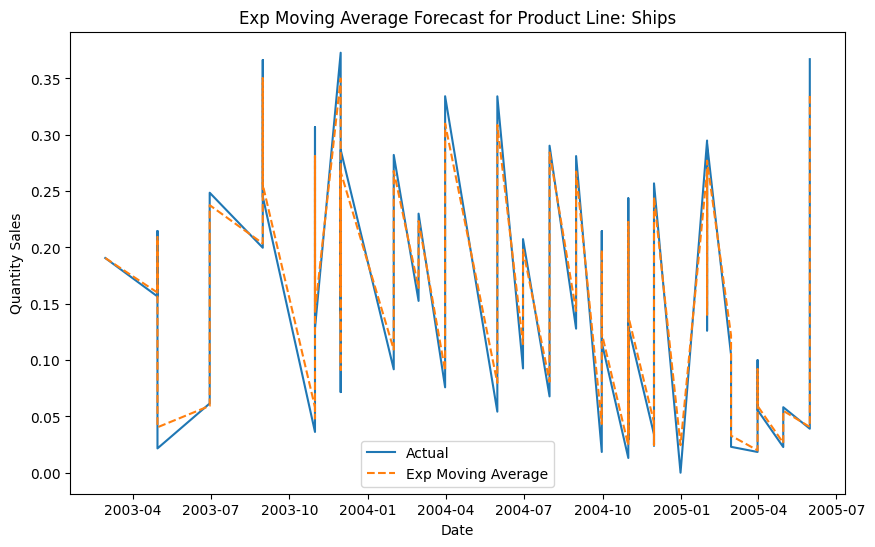

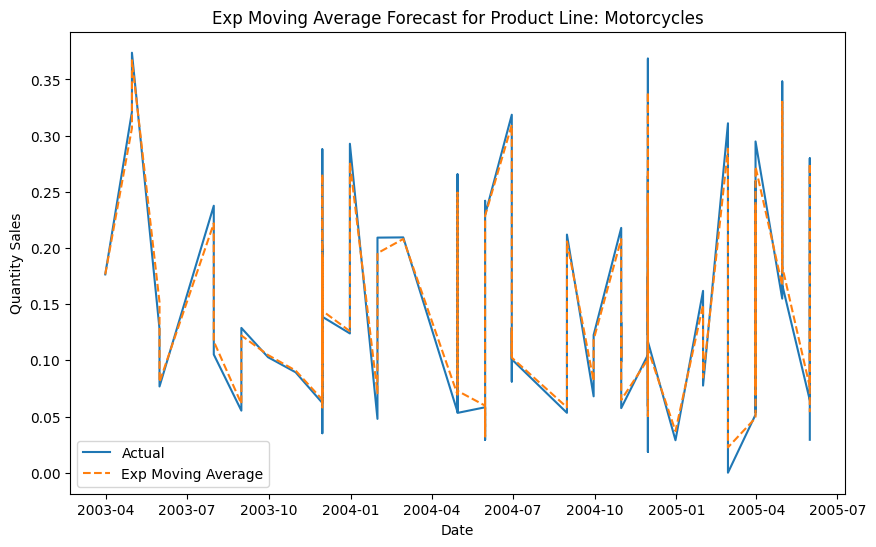

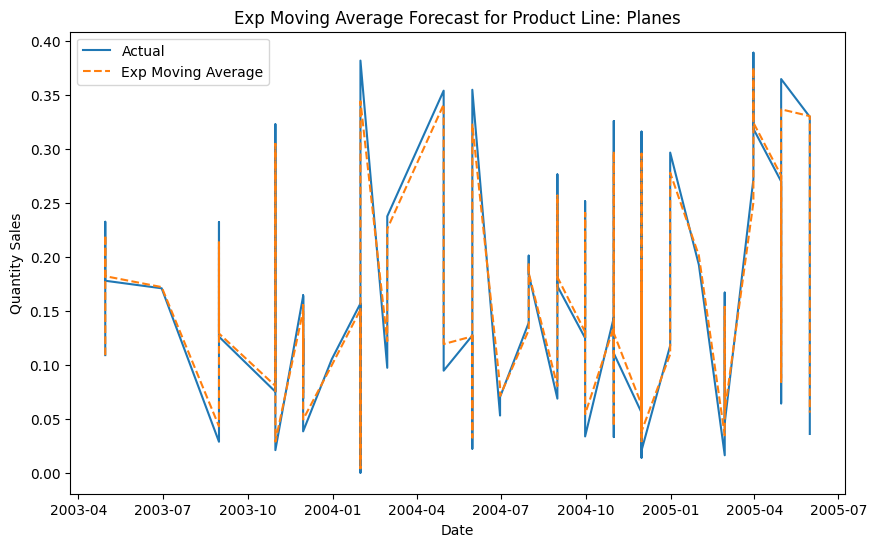

In [ ]:
unique_product_codes = df2['PRODUCTLINE'].unique()
alpha = 0.9  # Smoothing factor
EWMA_result = {}

for product_code in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product_code].copy()
    product_data = product_data.sort_index()

    # Calculate the Exponential Weighted Moving Average (EWMA)
    product_data['EWMA'] = product_data['SALES'].ewm(alpha=alpha, adjust=False).mean()
    EWMA_result[product_code] = product_data

    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data['SALES'], label='Actual')
    plt.plot(product_data.index, product_data['EWMA'], label='Exp Moving Average', linestyle='--')  # Use index
    plt.title(f'Exp Moving Average Forecast for Product Line: {product_code}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sales')

    plt.legend()
    plt.show()


In [ ]:
product_data.head()

CITY    COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH  \
ORDERDATE                                                               
2003-04-30   Salzburg    Austria    Small         0.182836   0.264509   
2003-04-30  Melbourne  Australia    Small         0.244403   0.696016   
2003-04-30   Salzburg    Austria   Medium         0.097015   1.000000   
2003-06-30   Glendale        USA    Small         0.197761   0.514410   
2003-08-31   Pasadena        USA   Medium         0.027985   0.774724   

               SALES      MSRP  QTR_ID  MONTH_ID  YEAR_ID PRODUCTLINE  \
ORDERDATE                                                               
2003-04-30  0.108940  0.145833       2         4     2003      Planes   
2003-04-30  0.232449  0.314815       2         4     2003      Planes   
2003-04-30  0.177833  0.643519       2         4     2003      Planes   
2003-06-30  0.170839  0.392593       2         6     2003      Planes   
2003-08-31  0.028666  0.555556       3         8     2003      Planes   

                EWMA  
ORDERDATE             
2003-04-30  0.108940  
2003-04-30  0.220098  
2003-04-30  0.182059  
2003-06-30  0.171961  
2003-08-31  0.042995

In [ ]:
df2['SALES'].isnull().sum()

0

In [ ]:
mae_list = []
rmse_list = []
mape_list = []
product_code_list = []

for product_code, product_data in EWMA_result.items():
    product_data = product_data.dropna(subset=['SALES', 'EWMA'])
    actual = product_data['SALES']
    forecast = product_data['EWMA']

    # Calculate MAE
    mae = mean_absolute_error(actual, forecast)
    mae_list.append(mae)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    rmse_list.append(rmse)

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual - forecast) / (actual+0.000001))) * 100
    mape_list.append(mape)

    # Store the product code
    product_code_list.append(product_code)


evaluation_df = pd.DataFrame({
    'Product Code': product_code_list,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'MAPE (%)': mape_list
})
print(evaluation_df)


       Product Code       MAE      RMSE      MAPE (%)
0      Classic Cars  0.005870  0.008158   6167.896273
1  Trucks and Buses  0.009882  0.012096  40127.854943
2      Vintage Cars  0.006331  0.008523    893.767064
3            Trains  0.008692  0.011014  27389.295632
4             Ships  0.011982  0.014526  37089.775585
5       Motorcycles  0.010324  0.013083  29667.299473
6            Planes  0.011343  0.014125   5410.018009


<Axes: >

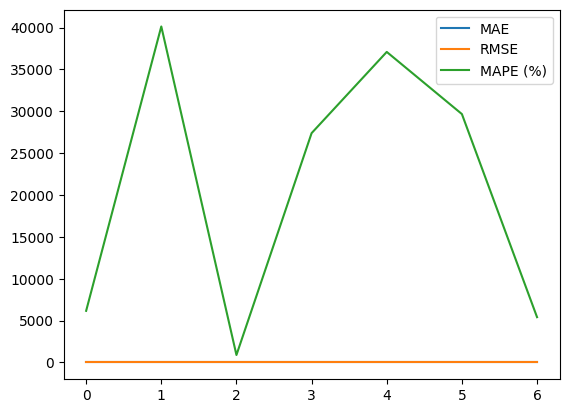

In [ ]:
evaluation_df.plot()

In [ ]:
df2.head(3)

CITY COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                    
2003-01-31  Stavern  Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31  Stavern  Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31  Stavern  Norway    Small         0.002677   0.190443  0.000000   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses

## ***Autoregressive Integrated Moving Average (ARIMA) model***

***ARIMA MODELLING***

The ARIMA (**Auto Regressive Moving Averag**e) model is a very common time series-forecasting model. It is a more sophisticated extension of the simpler ARMA (Auto Regressive Moving Average) model, which in itself is just a merger of two even simpler components:

1.  **AR (Auto Regressive):** models attempt to predict future values based on
past values. AR models require the time series to be stationary.

2. **MA (Moving Average):** models attempt to predict future values based on past forecasting errors. MA models assume that an autoregressive model can approximate the given series. This is not to be confused with moving average, which is a smoothing process rather than a forecasting model.

***AR MODEL***

We can begin to define an AR model as:

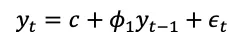

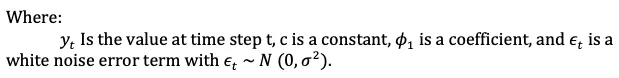

***MA MODEL***

We can begin to define an MA model as:

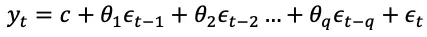

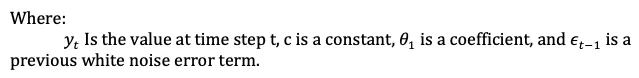

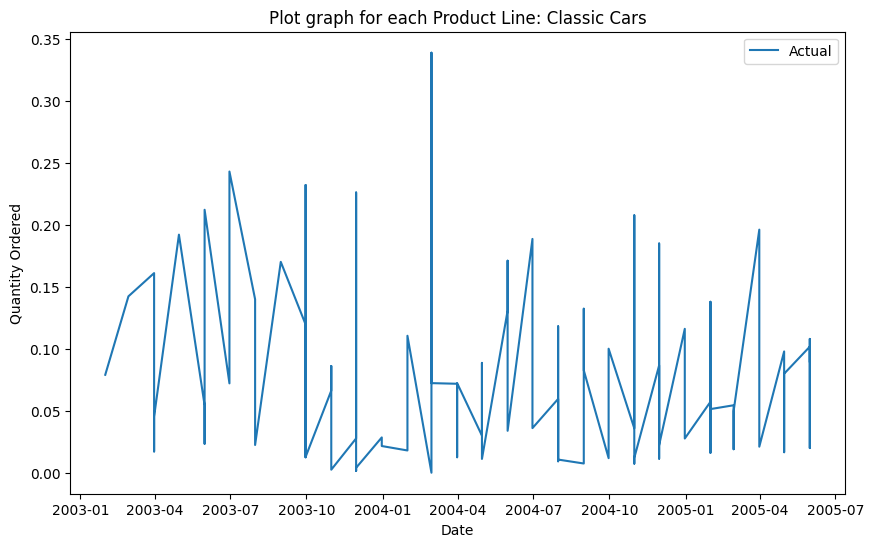

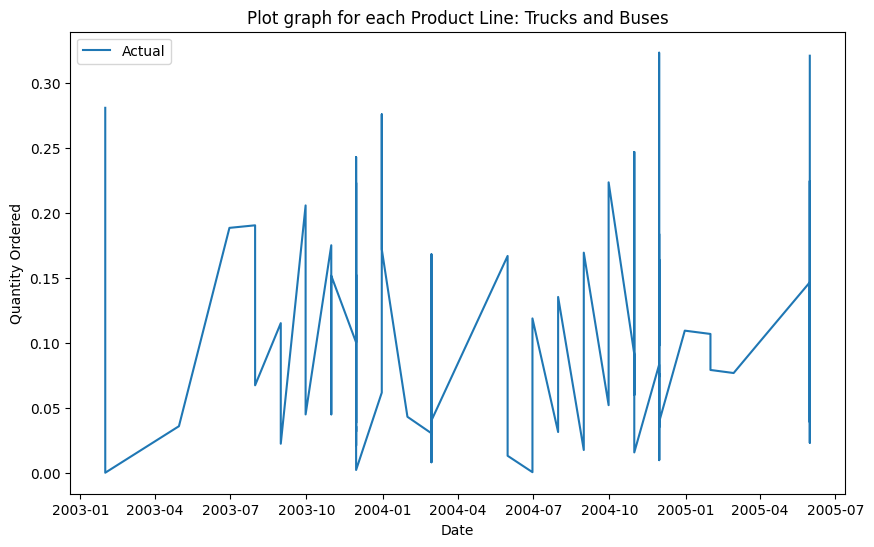

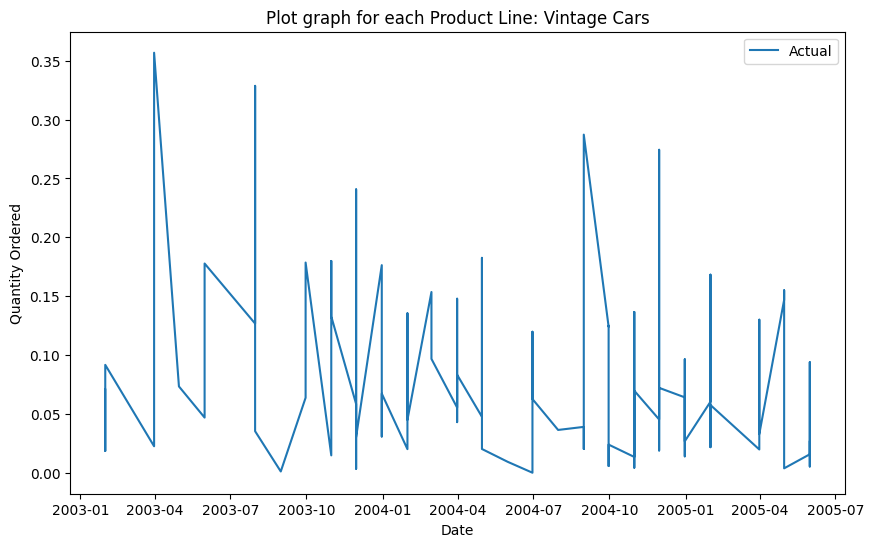

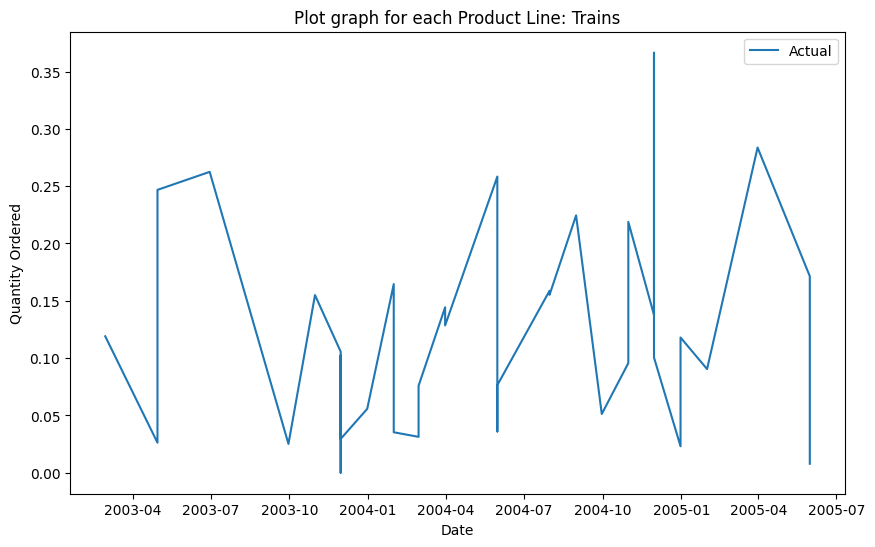

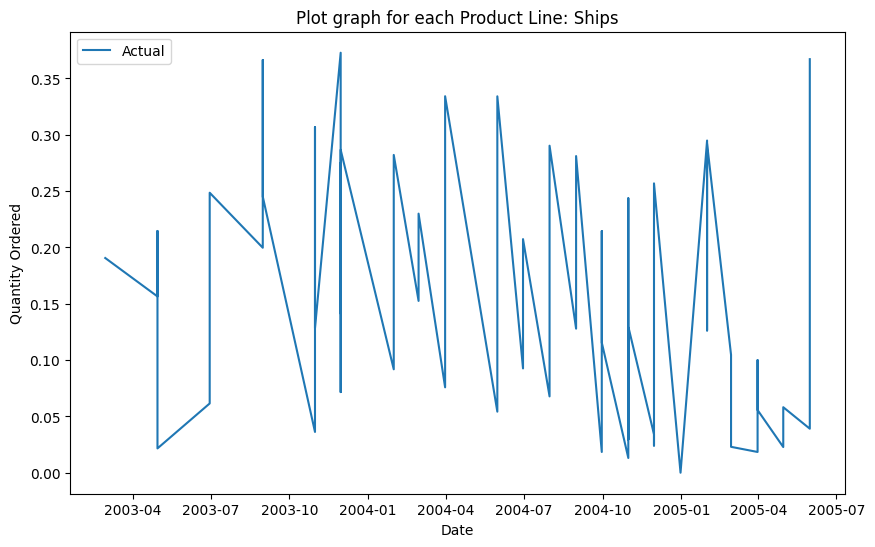

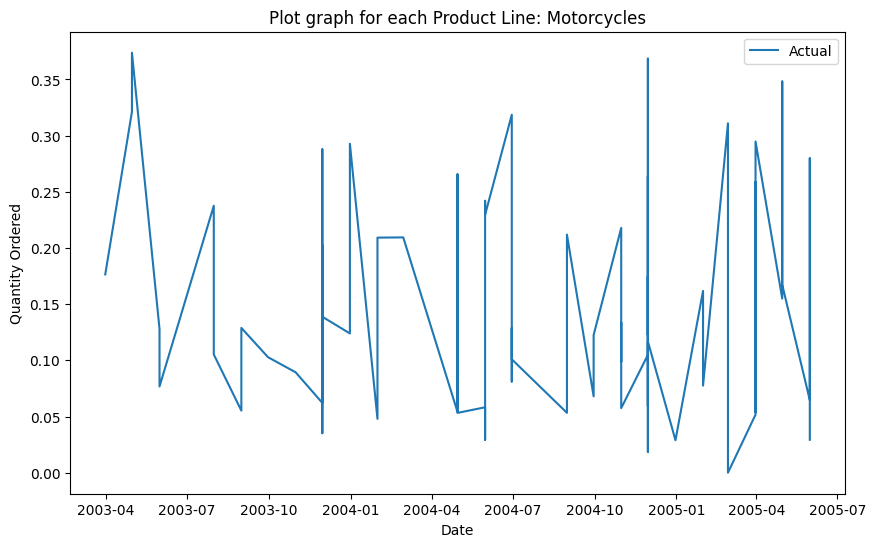

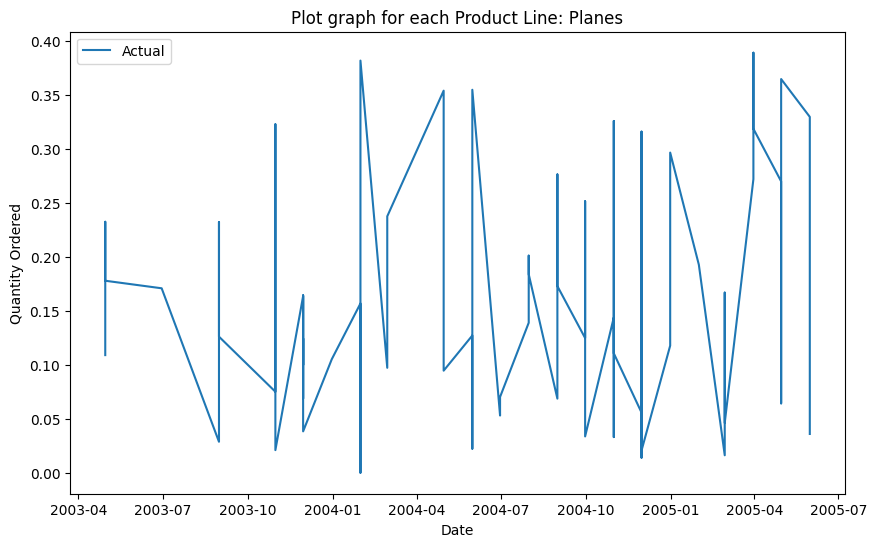

In [ ]:
unique_product_codes = df2['PRODUCTLINE'].unique()

for product_code in unique_product_codes:
    # Filter data for the specific product code
    product_data = df2[df2['PRODUCTLINE'] == product_code].copy()  # Ensure copy to avoid SettingWithCopyWarning
    product_data = product_data.sort_index()  # Sort by the index (ORDERDATE)

    # Plot the data using the index for ORDERDATE
    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data['SALES'], label='Actual')  # Use index instead of column
    plt.title(f'Plot graph for each Product Line: {product_code}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Ordered')
    plt.legend()
    plt.show()


**Conclusion:-**The data is stationary

Data is  stationary

***Augmented Dickey Fuller(ADF) Test***

Augmented Dickey Fuller(ADF) test is an extension of Dickey Fuller test for more complex models than AR(1). The primary difference between the two tests is that the ADF is utilized for a larger sized set of time series models which can be more complicated.

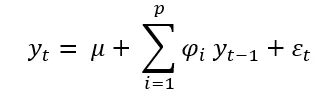

***Assumptions***

The test is conducted under following assumptions:

**Null Hypothesis (H0):** There exists a unit root in the time series and it is non-stationary. Unit root = 1 or δ = 0

**Alternate Hypothesis (H1):** There exists no unit root in the time series and it is stationary. Unit root < 1 or δ < 0


***Condition to reject H0 and accept H1***

If the test statistic is less than the p-value is less than significance

*  level (e.g., 0.05), then the **null hypothesis is rejected** and the time series is **considered stationary**.

*  If the test **statistic is greater** than the critical value, the null hypothesis cannot be rejected, and the **time series is considered non-stationary**.

In [ ]:
#check the data is statinory  or not
from statsmodels.tsa.stattools import adfuller

In [ ]:
#H0 : it is non stationary
#H1 : it is stationary
def adf_test(series):
  result = adfuller(series)
  print('ADF statistics : {}'.format(result[0]))
  print('p- value : {}'.format(result[1]))
  if result[1] <= 0.05:
    print('strong evidence against the null hypothesis, reject the null hypothesis')
  else:
    print('weak evidence against the null hypothesis, time seies has a unit root, indicating it is non-stationary')

In [ ]:
unique_product_codes = df2['PRODUCTLINE'].unique()

for product in unique_product_codes:
    # Filter data for the current product line
    product_data = df2[df2['PRODUCTLINE'] == product]
    print(adf_test(product_data['SALES']))

ADF statistics : -9.852012731944349
p- value : 4.459846668274805e-17
strong evidence against the null hypothesis, reject the null hypothesis
None
ADF statistics : -10.771256567159917
p- value : 2.3810732018016103e-19
strong evidence against the null hypothesis, reject the null hypothesis
None
ADF statistics : -9.89512629856572
p- value : 3.47426976132386e-17
strong evidence against the null hypothesis, reject the null hypothesis
None
ADF statistics : -1.0115466453588238
p- value : 0.7490296652850903
weak evidence against the null hypothesis, time seies has a unit root, indicating it is non-stationary
None
ADF statistics : -4.473327409910202
p- value : 0.00021965223886823997
strong evidence against the null hypothesis, reject the null hypothesis
None
ADF statistics : -9.233185880150252
p- value : 1.6570786941547917e-15
strong evidence against the null hypothesis, reject the null hypothesis
None
ADF statistics : -8.753794311926693
p- value : 2.7904738766654107e-14
strong evidence against

***Conclusion:-*** A p-value below 0.05 indicates stationarity, and our data meets this criterion, so we do not need to difference it.

***Finding ARIMA Parameters***

The key points to understand here are p, d, and q. Let's delve into their meanings:

* **p:** Autoregressive Order. This is the number of past observations considered for making future predictions. ⌛

* **q:** Moving Average Order. It accounts for a specific number of previous residuals when making future predictions. 📊

* **d:** Integration Order. It determines the number of differences needed to make the time series stationary (T(q) — T(q-1)).

We use the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots to find the ARIMA parameters.

In [ ]:
!pip install pmdarima
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

unique_product_codes = df2['PRODUCTLINE'].unique()

for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]
    # Define and fit the ARIMA model (adjust p, d, q as needed)
    stepwise_model = auto_arima(product_data['SALES'], trace= True, suppress_warnings=True)
    # model_fit = model.fit()

    print(f'ARIMA model summary for Product Line: {product}')
    print(stepwise_model.summary())
    print('\n')
    print('next Product line summary')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-456.418, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-463.118, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-461.396, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-461.440, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-336.982, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-460.272, Time=0.57 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.556 seconds
ARIMA model summary for Product Line: Classic Cars
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  166
Model:                        SARIMAX   Log Likelihood                 233.559
Date:                Tue, 26 Nov 2024   AIC                           -463.118
Time:                        08:44:56   BIC                           -456.894
Sample:                             0 

***Explanation of the terms used in the ARIMA/SARIMAX summary output:***

**Dep. Variable:**

The dependent variable is denoted as y. It refers to the variable being predicted (in this case, QUANTITYORDERED).


**Model:**

This refers to the type of model used. Here it’s SARIMAX, though no seasonal or exogenous components are specified here.

**Log Likelihood:**

A measure of model fit. Higher log-likelihood values (closer to zero or positive) suggest a better model fit, but this value alone cannot be used for model comparison across different datasets or models.

**AIC (Akaike Information Criterion):**

A metric used to compare different models. Lower AIC values indicate better models.

**BIC (Bayesian Information Criterion):**

Similar to AIC, but penalizes models with more parameters. Lower values indicate better models.

**HQIC(Hannan-Quinn Information Criterion):**

Another metric for model selection, like AIC and BIC. Again, lower values are better.

***Additional Statistics:***

**sigma2:**

The variance of the residuals (errors).

**Ljung-Box (L1) (Q):**

A test statistic for checking if the residuals are autocorrelated (i.e., whether there is any pattern left in the residuals). A p-value (Prob(Q)) above 0.05 suggests no significant autocorrelation in residuals, which is good.

**Jarque-Bera (JB):**

A test for checking whether the residuals are normally distributed. The p-value (Prob(JB)) here is 0.01, which suggests the residuals might deviate from a normal distribution.

**Heteroskedasticity (H):**

A test to check if the residuals have constant variance (homoscedasticity). A p-value (Prob(H)) above 0.05 suggests no significant heteroskedasticity, indicating the residuals likely have constant variance.

**Skew:**

A measure of the asymmetry of the residuals. A skew of 0.20 indicates slight positive skewness (right-tailed distribution).

**Kurtosis:**

A measure of the "tailedness" of the residual distribution. A kurtosis of 2.31 indicates slightly less peakedness compared to a normal distribution (which has a kurtosis of 3).

No need of acf and pacf becuse i already fornd the parameter value using auto_arima model summay

In [ ]:
#check the data points in the each product line
for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]['SALES']
    print(f'Product Line: {product}, Data Points: {len(product_data)}')

Product Line: Classic Cars, Data Points: 166
Product Line: Trucks and Buses, Data Points: 70
Product Line: Vintage Cars, Data Points: 136
Product Line: Trains, Data Points: 40
Product Line: Ships, Data Points: 66
Product Line: Motorcycles, Data Points: 76
Product Line: Planes, Data Points: 77


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
unique_product_codes = df2['PRODUCTLINE'].unique()
arima_result = {}

for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]
    quantity_ordered = product_data['SALES'].reset_index(drop=True)
    # Train-test split (80% train, 20% test)
    train_size = int(len(quantity_ordered) * 0.8)
    train, test = quantity_ordered[0:train_size], quantity_ordered[train_size:]

    print(f"Product: {product} - Train size: {len(train)}, Test size: {len(test)}")

    # Use auto_arima to find the best model
    stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True, seasonal=False)
    best_order = stepwise_fit.order  # Extract the best (p, d, q) order

    # Fit the ARIMA model with the best order
    model = ARIMA(train, order=best_order)
    model_fit = model.fit()

    # Predicting on the test set
    start = len(train)
    end = len(train) + len(test) - 1
    pred = model_fit.predict(start=start, end=end, typ='levels')
    pred.index=df2.index[start:end+1]   #prediction with date index
    # Store the results in a dictionary
    arima_result[product] = {
        'model_fit': model_fit,  # Store the fitted model
        'forecast': pred.reset_index(drop=True),  # Reset index for alignment with test
        'actual': test.reset_index(drop=True)  # Reset index for alignment
    }


# print(arima_result[product]['forecast'])
# print(arima_result[product]['actual'])

Product: Classic Cars - Train size: 132, Test size: 34
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-259.123, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-293.710, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-278.784, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-306.446, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-311.494, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-315.958, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-320.470, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-338.559, Time=0.71 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-339.892, Time=1.00 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-340.780, Time=1.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.88 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-339.515, Time=4.70 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-337.378, Ti

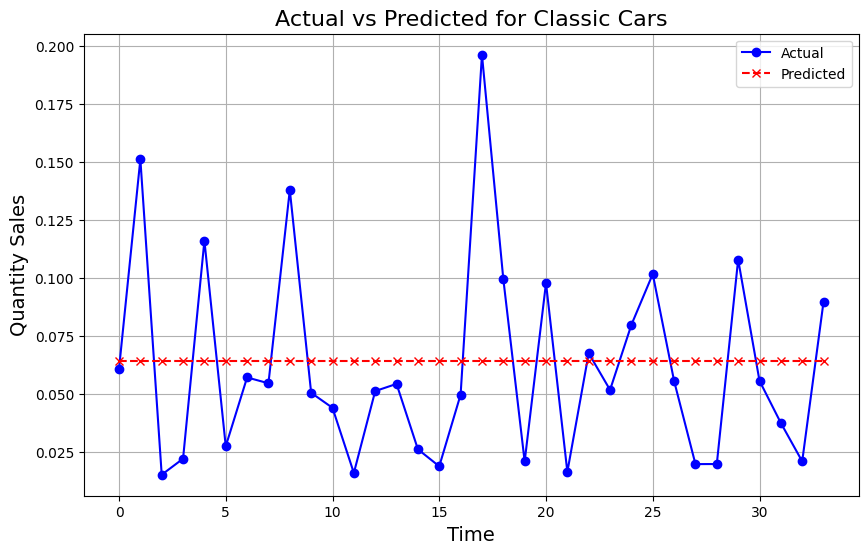

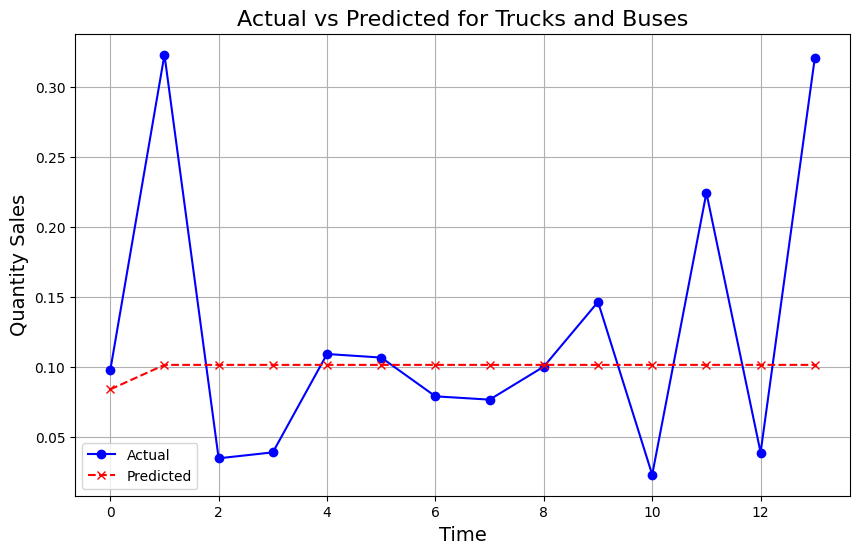

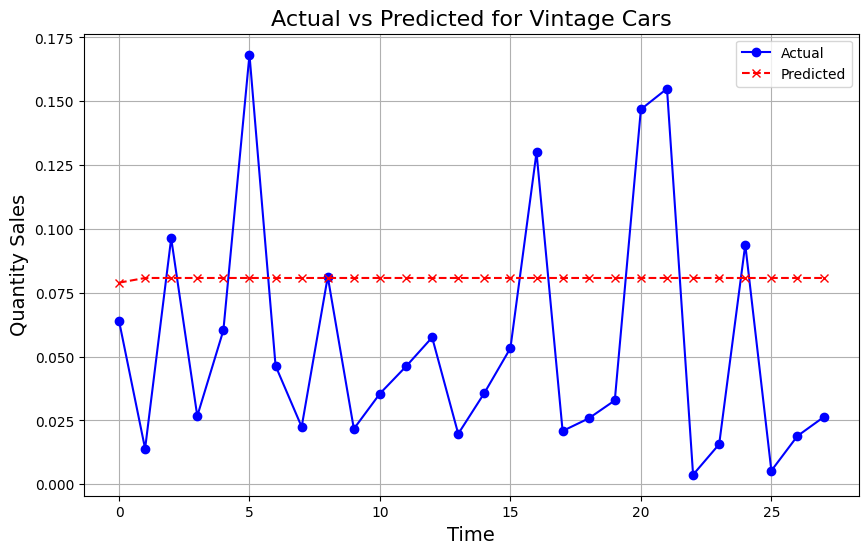

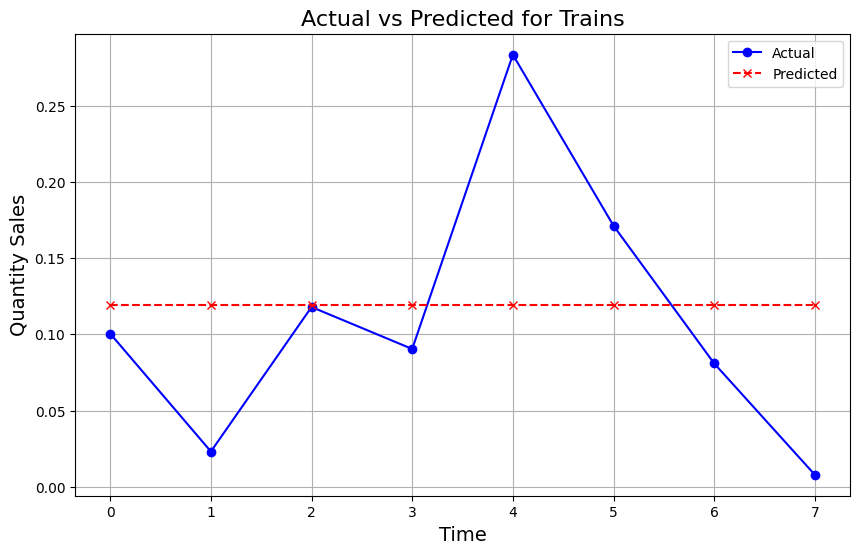

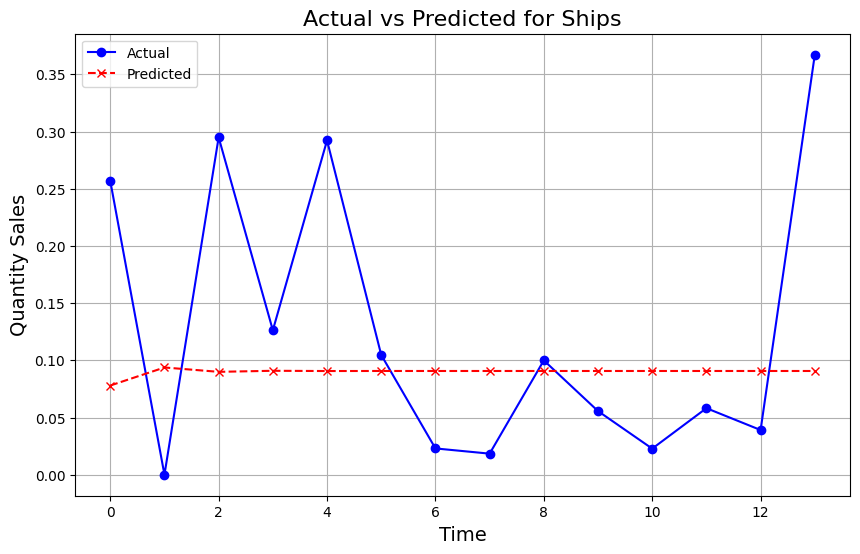

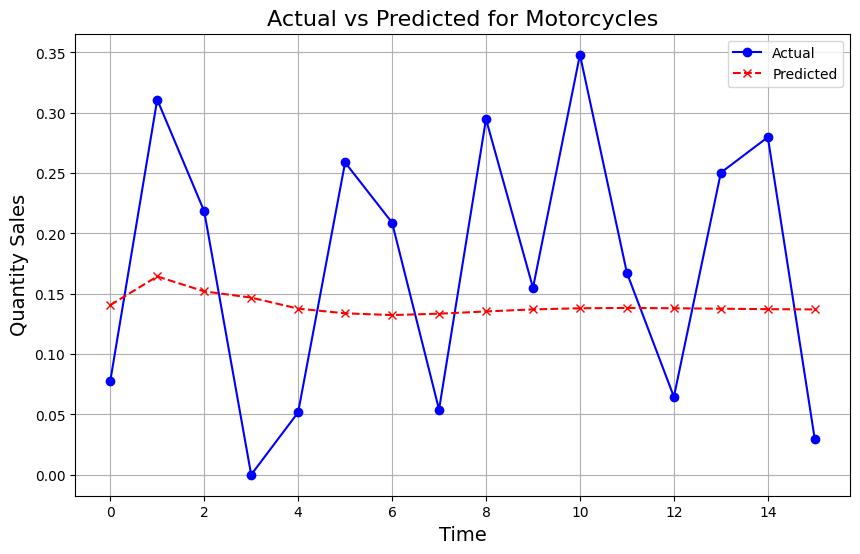

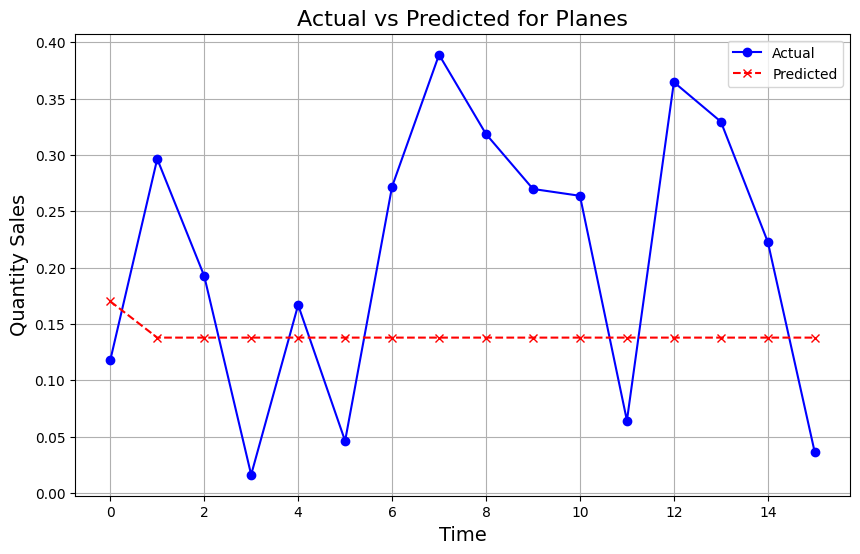

In [ ]:
def plot_actual_vs_predicted(product, actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue', marker='o')
    plt.plot(predicted, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted for {product}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Quantity Sales', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each product line
for product, result in arima_result.items():
    actual = result['actual']
    predicted = result['forecast']

    # Call the plotting function
    plot_actual_vs_predicted(product, actual, predicted)


In [ ]:
def calculate_metrics(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate MAE
    mae = np.mean(np.abs(actual - predicted))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))

    # Calculate MAPE
    mape = np.mean(np.abs((actual - predicted) / (actual+0.000001))) * 100

    return mae, rmse, mape


evaluation_results = {}
for product, result in arima_result.items():
    actual = result['actual']
    predicted = result['forecast']
    mae, rmse, mape = calculate_metrics(actual, predicted)
    evaluation_results[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

In [ ]:
evaluation_data = []

# Populate the list with product codes and their corresponding metrics
for product, metrics in evaluation_results.items():
    evaluation_data.append({
        'Product Code': product,
        'MAE': metrics['MAE'],
        'RMSE': metrics['RMSE'],
        'MAPE (%)': metrics['MAPE']
    })

evaluation_df = pd.DataFrame(evaluation_data)
print(evaluation_df)


       Product Code       MAE      RMSE       MAPE (%)
0      Classic Cars  0.034444  0.043132      94.416062
1  Trucks and Buses  0.068135  0.097852      83.125925
2      Vintage Cars  0.048143  0.052904     263.289053
3            Trains  0.063942  0.082226     253.733269
4             Ships  0.095810  0.125577  669723.182212
5       Motorcycles  0.102688  0.113859  917593.590011
6            Planes  0.125687  0.139905     120.041649


<Axes: >

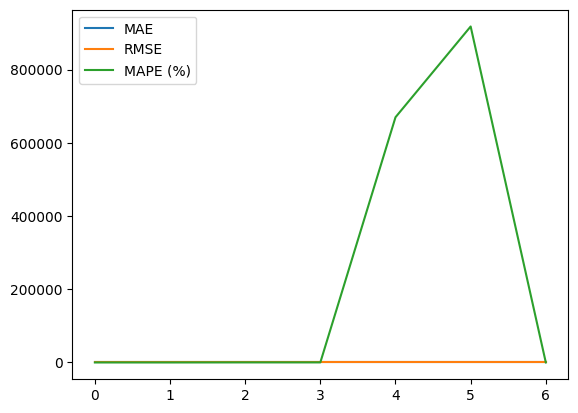

In [ ]:
evaluation_df.plot()

In [ ]:
df2.head(3)

CITY COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                    
2003-01-31  Stavern  Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31  Stavern  Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31  Stavern  Norway    Small         0.002677   0.190443  0.000000   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses

Make the prediction

## ***Time Series With LSTM***

**What is an LSTM?**

Long Short-Term Memory (LSTM) is a deep learning, sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of learning order dependence in sequence prediction problems.

**Why LSTM for Time Series Forecasting?**

LSTM is a type of Recurrent Neural Network in which the neurons are capable of learning the patterns in a sequential data and predict the next item in the sequence.

In [ ]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
df4 = df2[['PRODUCTLINE', 'SALES']]

In [ ]:
# df4.head()

In [ ]:
# #check the data points in the each product line
# for product in unique_product_codes:
#     product_data = df2[df2['PRODUCTLINE'] == product]['SALES']
#     print(f'Product Line: {product}, Data Points: {len(product_data)}')

Sequence Length: In time series forecasting, the sequence length determines how many previous time steps the model uses to predict the next time step. For instance, if sequence_length is 5, the model uses the last 5 values to predict the next one.

In [ ]:
###this code is important
unique_product_codes = df4['PRODUCTLINE'].unique()
lstm_result = {}

# Normalize the data
scaler = MinMaxScaler()
df4['SALES'] = scaler.fit_transform(df4['SALES'].values.reshape(-1, 1))
# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Adjusted sequence length based on data points available
sequence_length_mapping = {
    'Motorcycles': 5,
    'Classic Cars': 15,
    'Trucks and Buses': 10,
    'Vintage Cars': 15,
    'Planes': 10,
    'Ships': 8,
    'Trains': 3
}

# Update the LSTM loop to store both actual and predicted values
for product in unique_product_codes:
    product_data = df4[df4['PRODUCTLINE'] == product]
    print(product_data.head())
    quantity_ordered = product_data['SALES']
    sequence_length = sequence_length_mapping.get(product, 10)  # Default to 10 if not in mapping
    print(f'product steplenth: {sequence_length}')
    # Train-test split (80% train, 20% test)
    train_size = int(len(quantity_ordered) * 0.8)
    train_data, test_data = quantity_ordered[:train_size], quantity_ordered[train_size:]

    # Create sequences
    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Reshape for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Store both actual and predicted values
    lstm_result[product] = {
        'actual': y_test,  # Actual values from test data
        'predicted': predictions.flatten()  # Predicted values, flattened for consistency
    }

             PRODUCTLINE     SALES
ORDERDATE                         
2003-01-31  Classic Cars  0.203201
2003-02-28  Classic Cars  0.366069
2003-03-31  Classic Cars  0.414221
2003-03-31  Classic Cars  0.044150
2003-03-31  Classic Cars  0.056719
product steplenth: 15
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0398
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0283
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0291 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0234  
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0305
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0295  
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0200 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0222 
Epoch 12/20
4/4 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
            PRODUCTLINE     SALES
ORDERDATE                        
2003-03-31  Motorcycles  0.453627
2003-04-30  Motorcycles  0.825652
2003-04-30  Motorcycles  0.960644
2003-05-31  Motorcycles  0.328638
2003-05-31  Motorcycles  0.287535
product steplenth: 5
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1088
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0996
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0740 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0721
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0508 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0515
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0578
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0545
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0526 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0539
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
           PRODUCTLINE     SALES
ORDERDATE                       
2003-04-30      Planes  0.280019
2003-04-30      Planes  0.597487
2003-04-30      Planes  0.457101
2003-06-30      Planes  0.439124
2003-08-31      Planes  0.073683
product steplenth: 10
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1565
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1269
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1143
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1016
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0796
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0716
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0719
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0681
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0758
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0721
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0709
Ep

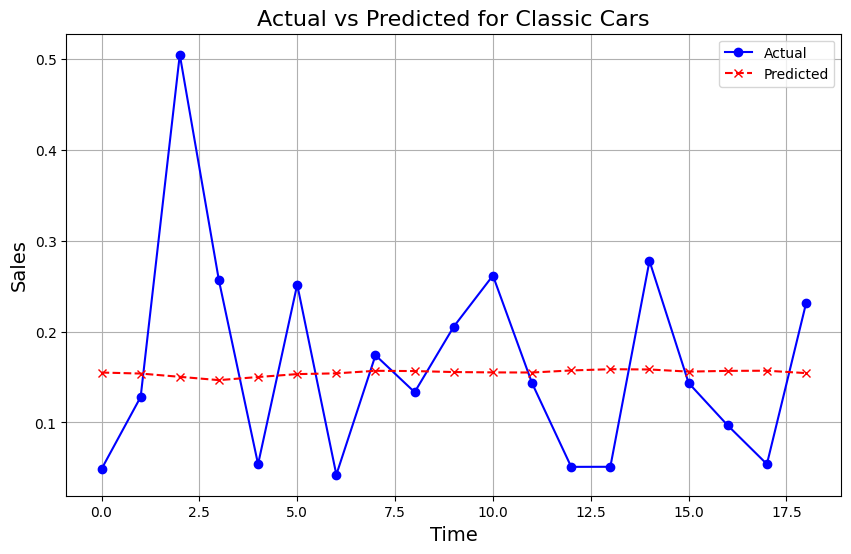

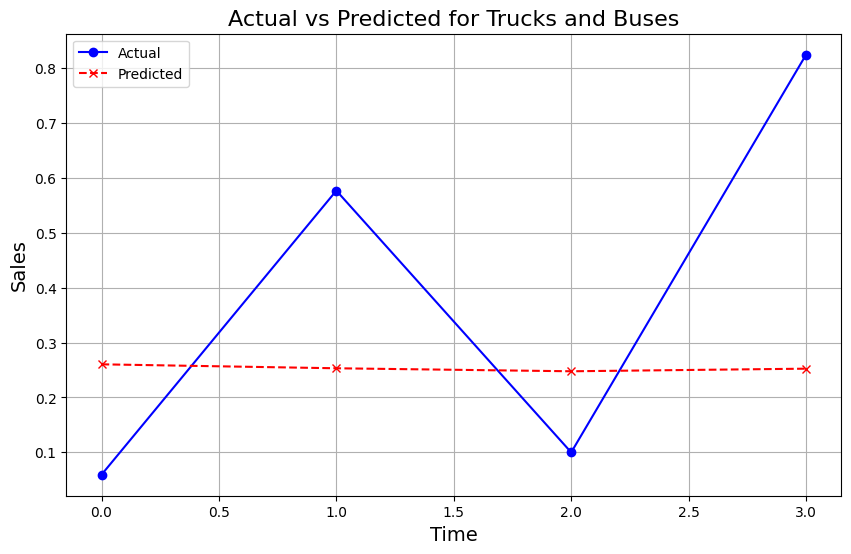

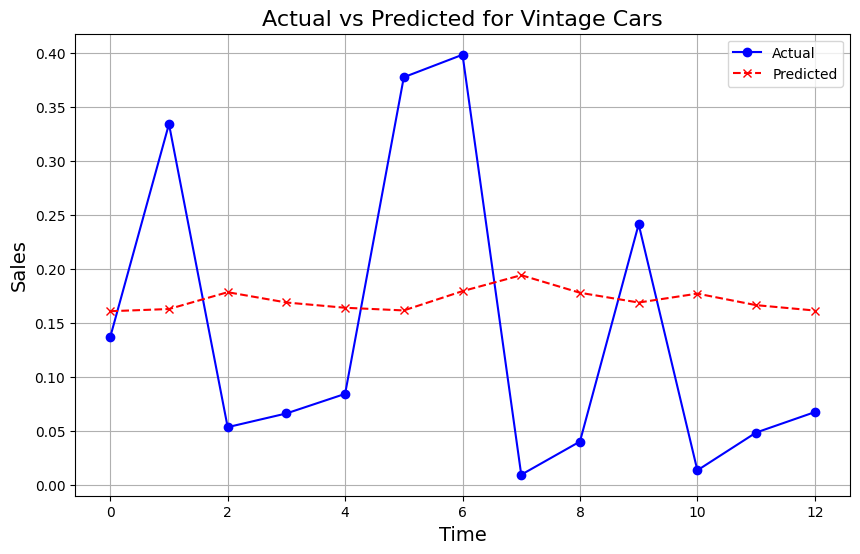

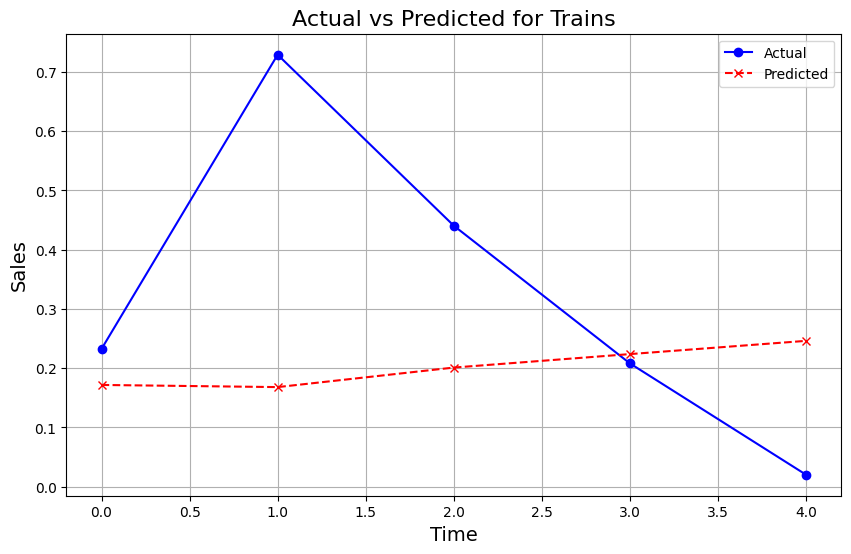

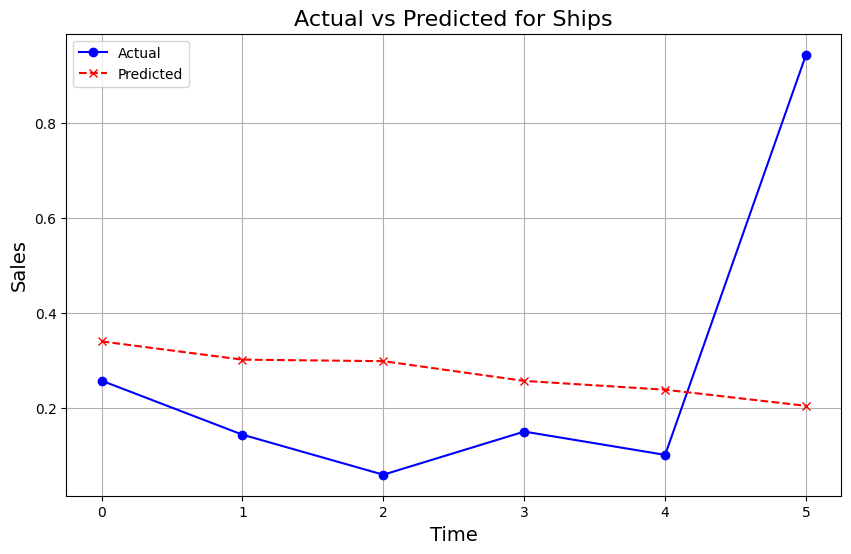

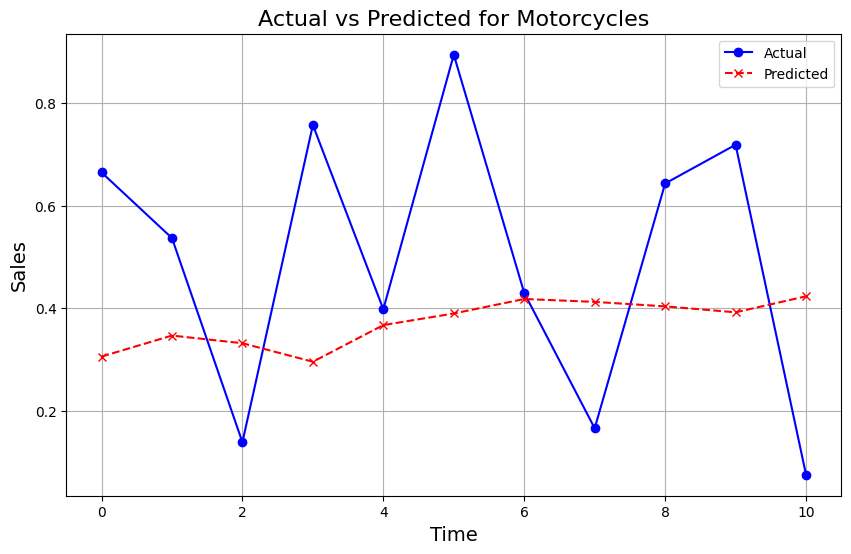

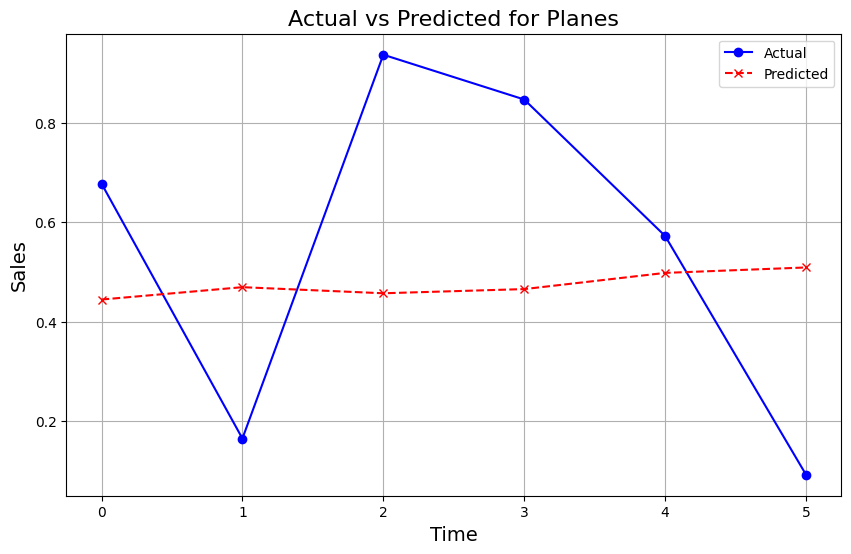

In [ ]:
# Function to plot actual and predicted values
def plot_actual_vs_predicted(product, actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue', marker='o')
    plt.plot(predicted, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted for {product}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Sales', fontsize=14)  # Changed to 'Sales' since we are plotting sales
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each product line
for product, result in lstm_result.items():
    actual = result['actual']
    predicted = result['predicted']

    # Call the plotting function
    plot_actual_vs_predicted(product, actual, predicted)


In [ ]:
import numpy as np

# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate MAE
    mae = np.mean(np.abs(actual - predicted))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))

    # Calculate MAPE
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    return mae, rmse, mape


evaluation_results = {}
for product, result in lstm_result.items():
    actual = result['actual']
    predicted = result['predicted']
    mae, rmse, mape = calculate_metrics(actual, predicted)
    evaluation_results[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

In [ ]:
evaluation_data = []
for product, metrics in evaluation_results.items():
    evaluation_data.append({
        'Product Code': product,
        'MAE': metrics['MAE'],
        'RMSE': metrics['RMSE'],
        'MAPE (%)': metrics['MAPE']
    })


evaluation_df = pd.DataFrame(evaluation_data)
print(evaluation_df)

       Product Code       MAE      RMSE    MAPE (%)
0      Classic Cars  0.089201  0.115339   88.553757
1  Trucks and Buses  0.311077  0.351436  153.184888
2      Vintage Cars  0.131322  0.142669  349.251369
3            Trains  0.220638  0.292343  257.906307
4             Ships  0.244038  0.333407  139.637519
5       Motorcycles  0.264875  0.304253   95.431524
6            Planes  0.315084  0.342162  129.993311


***Interpret the Metrics:***

**MAE:** Measures the average magnitude of errors in predictions. Lower MAE values indicate that the model's predictions are closer to actual values on average.

**RMSE:** Similar to MAE but penalizes larger errors more heavily. Lower RMSE values show that the model is performing well and is less sensitive to large errors.

**MAPE:** Measures the percentage error between predictions and actual values. A lower MAPE indicates better performance, but it can be inflated if actual values are close to zero. Generally, a **MAPE below 10% is considered excellent, 10-20% is good, 20-50% is reasonable, and over 50% may indicate that the model is struggling.**

In [ ]:
# # Define thresholds for deciding, the model is good enough
# mae_threshold = 0.15
# rmse_threshold = 0.1
# mape_threshold = 300

# def is_method_best(mae, rmse, mape):

#     return mae < mae_threshold and rmse < rmse_threshold and mape < mape_threshold


# best_method_results = []
# for product, metrics in evaluation_results.items():
#     mae = metrics['MAE']
#     rmse = metrics['RMSE']
#     mape = metrics['MAPE']
#     is_best = is_method_best(mae, rmse, mape)
#     best_method_results.append({
#         'Product Code': product,
#         'MAE': mae,
#         'RMSE': rmse,
#         'MAPE (%)': mape,
#         'Is LSTM Best?': 'Yes' if is_best else 'No'
#     })

# best_method_df = pd.DataFrame(best_method_results)
# print(best_method_df)

<Axes: >

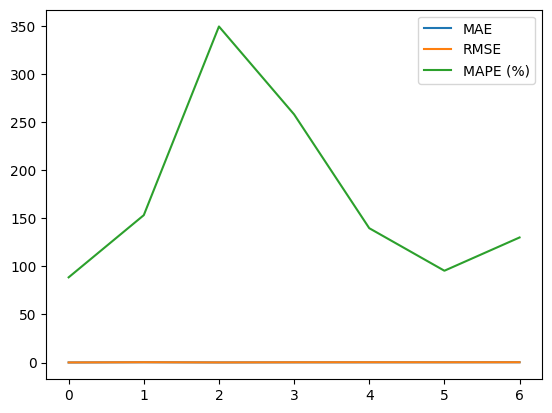

In [ ]:
evaluation_df.plot()

In [ ]:
df2.head(3)

CITY COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                    
2003-01-31  Stavern  Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31  Stavern  Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31  Stavern  Norway    Small         0.002677   0.190443  0.000000   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Sort df2 by ORDERDATE
df2=df1.copy()
df2 = df2.sort_values(by='ORDERDATE')
# Set ORDERDATE as the index
df2.set_index('ORDERDATE', inplace=True)

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

In [ ]:
####   Here i remove the city, country and dealsize

linear_regression_results = {}
# df2 = df2.reset_index(drop=True)

unique_product_codes = df2['PRODUCTLINE'].unique()
for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]

    # Select features to be one-hot encoded
    categorical_features = ['MONTH_ID']

    # Perform one-hot encoding on categorical columns
    product_data_encoded = pd.get_dummies(product_data, columns=categorical_features, drop_first=True)

    # Prepare features (X) and target (y)
    X = product_data_encoded.drop(columns=['SALES', 'PRODUCTLINE', 'QTR_ID', 'YEAR_ID', 'CITY', 'COUNTRY', 'DEALSIZE'])
    y = product_data_encoded['SALES']

    # Train-test split (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Keep ORDERDATE aligned with y_test by indexing directly from the test set
    order_dates_test = X_test.index  # ORDERDATE is retained as the index

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and results, retaining ORDERDATE as index
    linear_regression_results[product] = {
        'model': model,
        'mse': mse,
        'r2_score': r2,
        'actual': y_test.values,
        'predicted': y_pred,
        'ORDERDATE': order_dates_test
    }
    # # Output results for each product line
    # print(f"Product Line: {product}")
    # print(f"Mean Squared Error: {mse:.2f}")
    # print(f"R² Score: {r2:.2f}\n")

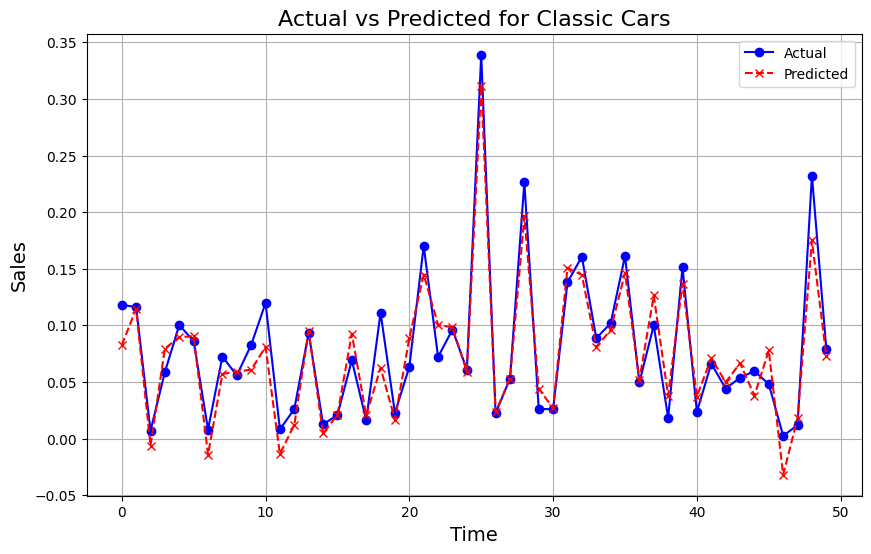

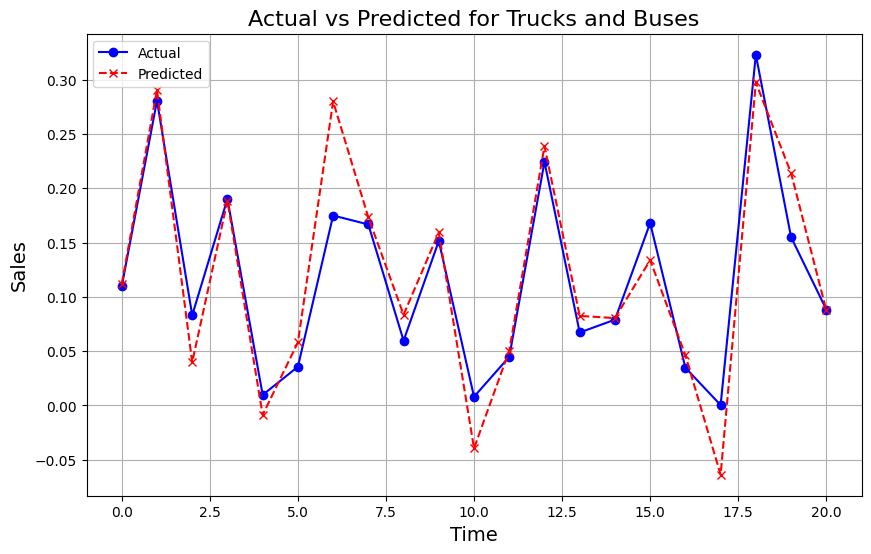

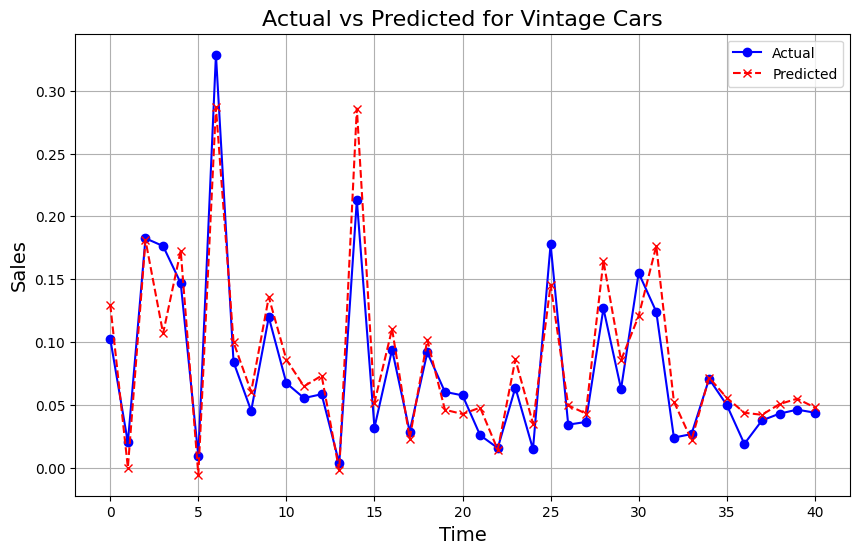

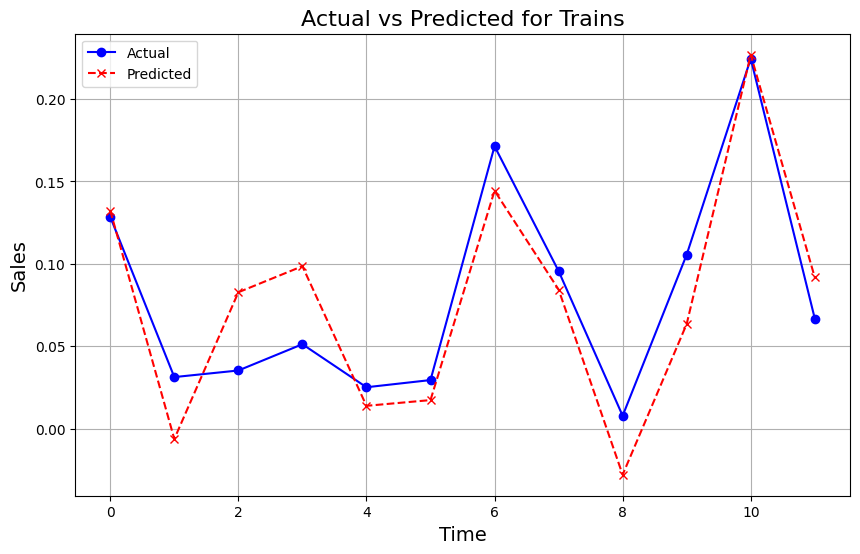

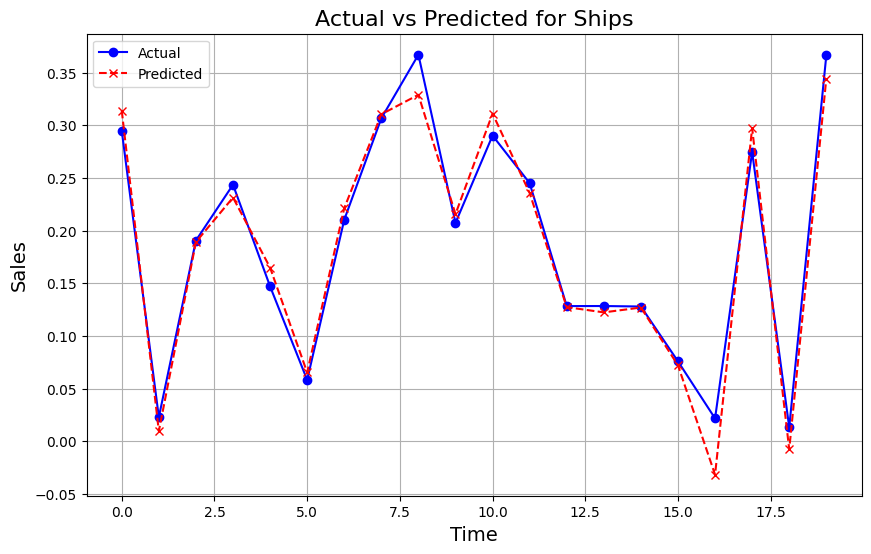

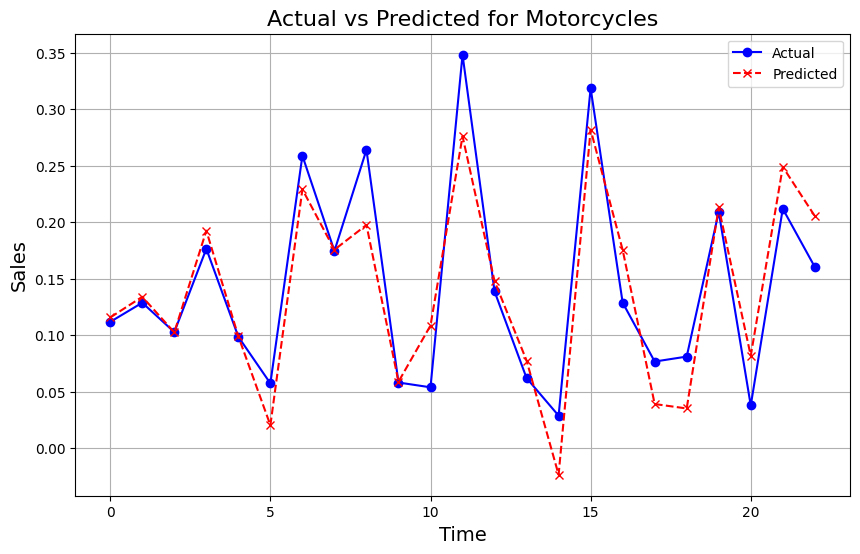

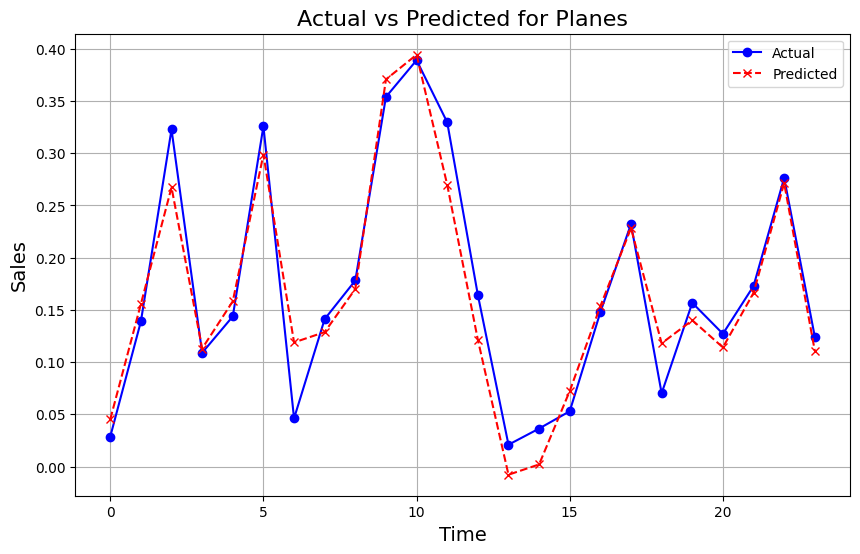

In [ ]:
def plot_actual_vs_predicted(product, actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue', marker='o')
    plt.plot(predicted, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted for {product}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Sales', fontsize=14)  # Changed to 'Sales' since we are plotting sales
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot for each product line
for product, result in linear_regression_results.items():
    actual = result['actual']
    predicted = result['predicted']
    # Call the plotting function
    plot_actual_vs_predicted(product, actual, predicted)

In [ ]:
# linear_regression_results = {}

# # Resetting the index to keep ORDERDATE as a column for consistency
# # df2 = df2.reset_index()
# df2 = df2.reset_index(drop=True)

# # Loop through each unique product line
# unique_product_codes = df2['PRODUCTLINE'].unique()
# for product in unique_product_codes:
#     product_data = df2[df2['PRODUCTLINE'] == product]

#     # Select features to be one-hot encoded
#     categorical_features = ['MONTH_ID']

#     # Perform one-hot encoding on categorical columns
#     product_data_encoded = pd.get_dummies(product_data, columns=categorical_features, drop_first=True)

#     # Prepare features (X) and target (y)
#     X = product_data_encoded.drop(columns=['SALES', 'PRODUCTLINE', 'QTR_ID','YEAR_ID','CITY', 'COUNTRY', 'DEALSIZE'])  # Drop ORDERDATE from X
#     y = product_data_encoded['SALES']

#     # Train-test split (70% train, 30% test)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     # Get the ORDERDATE for the test set (aligned with y_test)
#     order_dates_test = product_data_encoded.loc[X_test.index]

#     # Initialize and train the linear regression model
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Predict on test set
#     y_pred = model.predict(X_test)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Store the model and results
#     linear_regression_results[product] = {
#         'model': model,
#         'mse': mse,
#         'r2_score': r2,
#         'actual': y_test.values,
#         'predicted': y_pred,
#         'ORDERDATE': order_dates_test.values  # Correct handling of ORDERDATE for the test set
#     }

#     # # Output results for each product line
#     # print(f"Product Line: {product}")
#     # print(f"Mean Squared Error: {mse:.2f}")
#     # print(f"R² Score: {r2:.2f}\n")

In [ ]:
# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate MAE
    mae = np.mean(np.abs(actual - predicted))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual - predicted) / (actual+0.000001))) * 100

    # Calculate MSE and R^2 Score
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    return mae, rmse, mape, mse, r2

# Dictionary to store evaluation results for each product
evaluation_results = {}
for product, result in linear_regression_results.items():
    actual = result['actual']
    predicted = result['predicted']
    mae, rmse, mape, mse, r2 = calculate_metrics(actual, predicted)  # Get all metrics
    evaluation_results[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'MSE': mse,
        'R^2 Score': r2
    }

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index').reset_index()
evaluation_df.rename(columns={'index': 'Product Code'}, inplace=True)
evaluation_df

Product Code       MAE      RMSE    MAPE (%)       MSE  R^2 Score
0      Classic Cars  0.015769  0.020406   64.658458  0.000416   0.903851
1  Trucks and Buses  0.024784  0.035717  789.615525  0.001276   0.834574
2      Vintage Cars  0.019703  0.025583   40.816240  0.000654   0.851107
3            Trains  0.025261  0.029906   83.267627  0.000894   0.779265
4             Ships  0.014655  0.019468   27.977044  0.000379   0.968684
5       Motorcycles  0.028741  0.036472   33.502453  0.001330   0.828778
6            Planes  0.022800  0.029750   29.578566  0.000885   0.924136

In [ ]:
# linear_regression_results

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

In [ ]:
##### Here i include the city, country and dealsize then the result is very deviates
linear_regression_results1 = {}

df2 = df2.reset_index(drop=True)

# Loop through each unique product line
unique_product_codes = df2['PRODUCTLINE'].unique()
for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]
    categorical_features = ['MONTH_ID','CITY', 'COUNTRY', 'DEALSIZE']
    product_data_encoded = pd.get_dummies(product_data, columns=categorical_features, drop_first=True)

    # Prepare features (X) and target (y)
    X = product_data_encoded.drop(columns=['SALES', 'PRODUCTLINE', 'QTR_ID','YEAR_ID'])  # Drop ORDERDATE from X
    y = product_data_encoded['SALES']

    # Train-test split (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Get the ORDERDATE for the test set (aligned with y_test)
    order_dates_test = product_data_encoded.loc[X_test.index]
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and results
    linear_regression_results1[product] = {
        'model': model,
        'mse': mse,
        'r2_score': r2,
        'actual': y_test.values,
        'predicted': y_pred,
        'ORDERDATE': order_dates_test.values
    }

In [ ]:
# Dictionary to store evaluation results for each product
evaluation_results1 = {}
for product, result in linear_regression_results1.items():
    actual = result['actual']
    predicted = result['predicted']
    mae, rmse, mape, mse, r2 = calculate_metrics(actual, predicted)  # Get all metrics
    evaluation_results1[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'MSE': mse,
        'R^2 Score': r2
    }

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame.from_dict(evaluation_results1, orient='index').reset_index()
evaluation_df.rename(columns={'index': 'Product Code'}, inplace=True)
evaluation_df

Product Code           MAE          RMSE      MAPE (%)           MSE  \
0      Classic Cars  1.139407e+10  2.430811e+10  3.714332e+13  5.908844e+20   
1  Trucks and Buses  2.249171e-02  3.280014e-02  1.234176e+02  1.075849e-03   
2      Vintage Cars  1.539719e+11  3.467342e+11  3.378802e+14  1.202246e+23   
3            Trains  5.164411e-02  6.293664e-02  1.146840e+02  3.961021e-03   
4             Ships  4.414410e+10  7.089979e+10  6.512569e+13  5.026780e+21   
5       Motorcycles  3.327080e-02  4.026802e-02  4.167881e+01  1.621513e-03   
6            Planes  3.097587e-02  3.847682e-02  3.471564e+01  1.480466e-03   

      R^2 Score  
0 -1.364364e+23  
1  8.604882e-01  
2 -2.735124e+25  
3  2.240033e-02  
4 -4.153428e+23  
5  7.912872e-01  
6  8.731005e-01

**Conclusion:-** When these variables are included, certain product lines like Vintage Cars and Classic Cars show abnormally high errors (e.g., MSE in the quintillions and extremely low R² scores). These numbers indicate that including CITY, COUNTRY, and DEALSIZE likely introduces noise for some product lines, leading to poor performance.

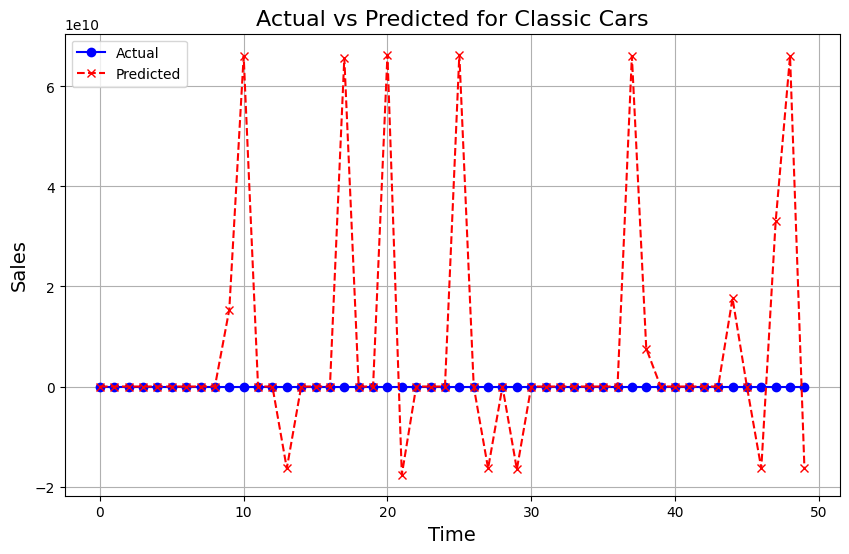

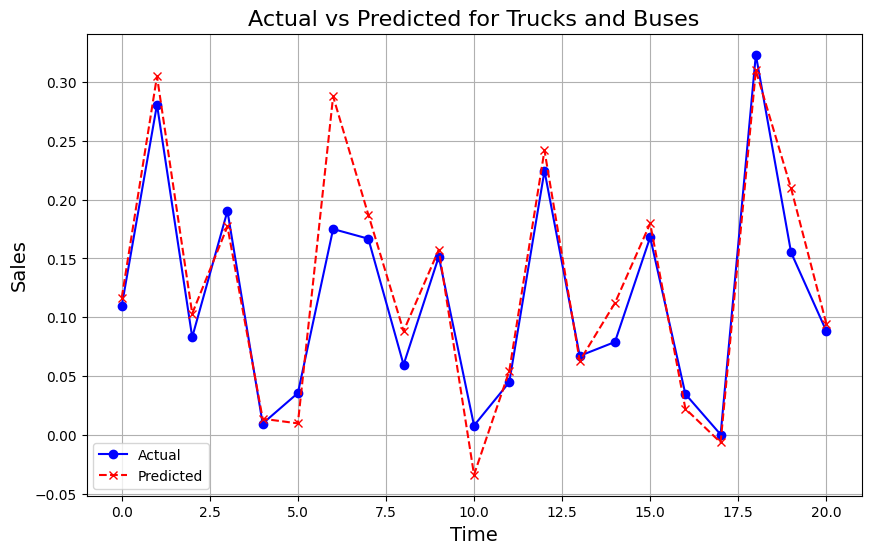

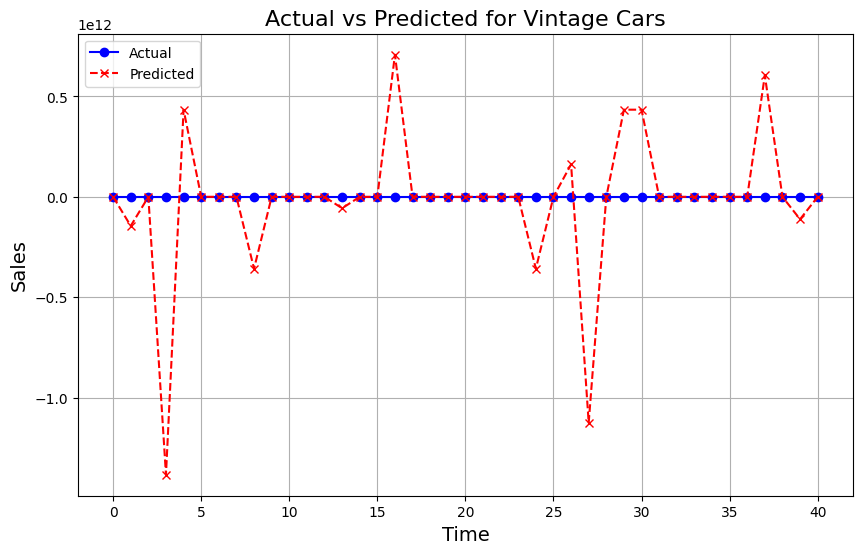

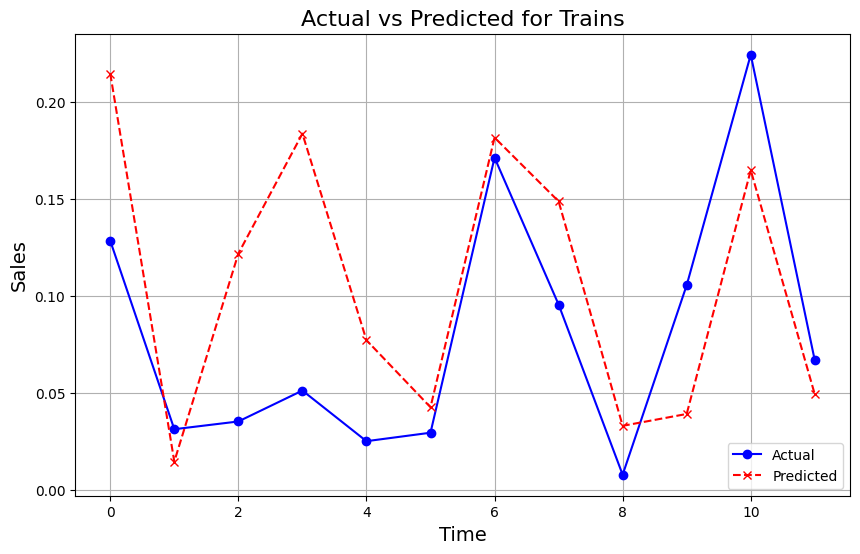

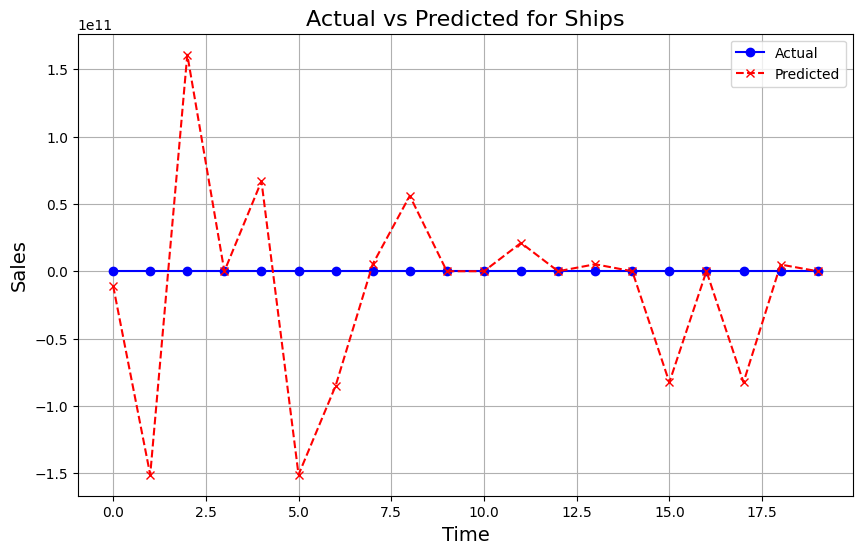

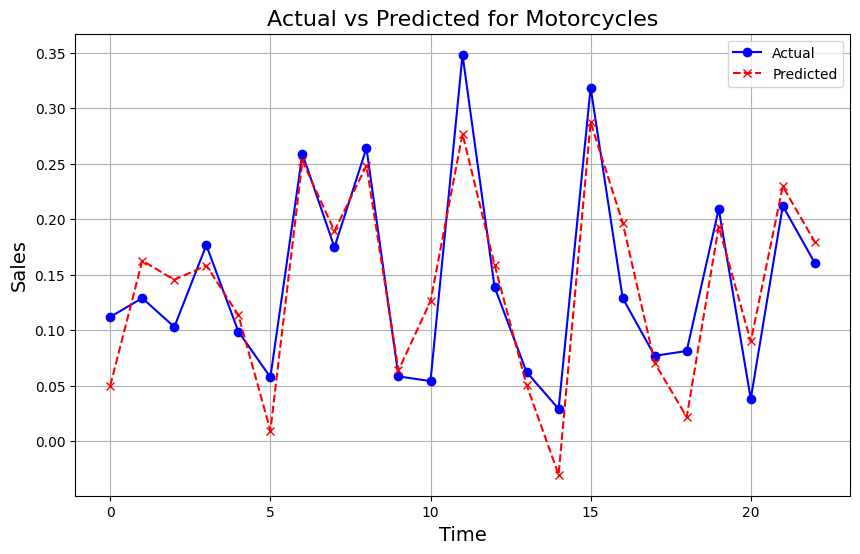

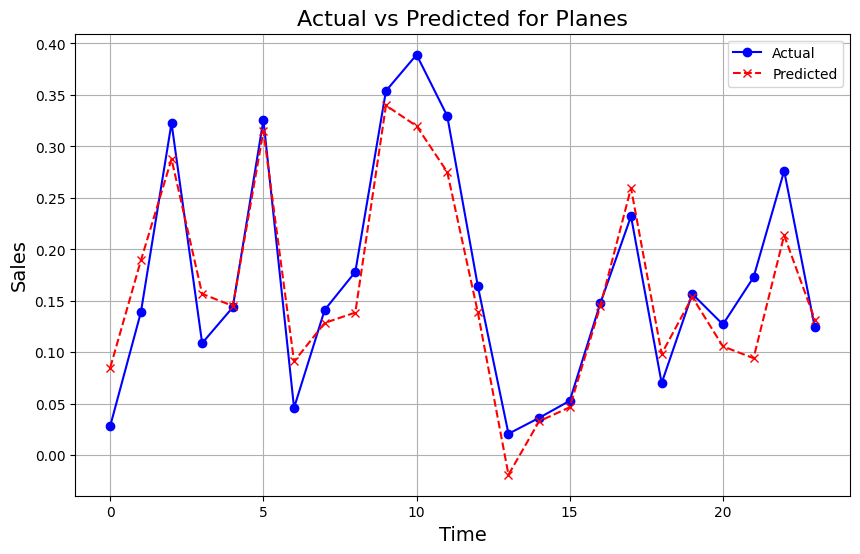

In [ ]:
def plot_actual_vs_predicted(product, actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue', marker='o')
    plt.plot(predicted, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted for {product}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Sales', fontsize=14)  # Changed to 'Sales' since we are plotting sales
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot for each product line
for product, result in linear_regression_results1.items():
    actual = result['actual']
    predicted = result['predicted']
    # Call the plotting function
    plot_actual_vs_predicted(product, actual, predicted)

### ***ElasticNet***

In [ ]:
df2=df1.copy()
df2 = df2.sort_values(by='ORDERDATE')
# Set ORDERDATE as the index
df2.set_index('ORDERDATE', inplace=True)

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet_result = {}

# Loop through each unique product line
unique_product_codes = df2['PRODUCTLINE'].unique()
for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]

    # Select features to be one-hot encoded
    categorical_features = ['MONTH_ID', 'CITY', 'COUNTRY', 'DEALSIZE']

    # Perform one-hot encoding on categorical columns
    product_data_encoded = pd.get_dummies(product_data, columns=categorical_features, drop_first=True)

    # Prepare features (X) and target (y)
    columns_to_drop = ['SALES', 'PRODUCTLINE', 'QTR_ID', 'YEAR_ID']
    X = product_data_encoded.drop(columns=[col for col in columns_to_drop if col in product_data_encoded.columns])
    y = product_data_encoded['SALES']

    # Train-test split (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Keep ORDERDATE aligned with y_test by indexing directly from the test set
    order_dates_test = X_test.index  # ORDERDATE is retained as the index

    # Initialize and train the ElasticNet model
    alpha = 0.005  # Regularization strength
    l1_ratio = 0.3  # means l2 have 30% weighted
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X_train, y_train)

    # Predict on test set
    y_pred = elastic_net.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and results, retaining ORDERDATE as index
    elasticnet_result[product] = {
        'model': elastic_net,
        'mse': mse,
        'r2_score': r2,
        'actual': y_test.values,
        'predicted': y_pred,
        'ORDERDATE': order_dates_test  # Keeps ORDERDATE as index for the test set results
    }

    # # Output results for each product line
    # print(f"Product Line: {product}")
    # print(f"Mean Squared Error: {mse:.2f}")
    # print(f"R² Score: {r2:.2f}\n")


In [ ]:
alpha = 0.005  # Regularization strength
l1_ratio = 0.4

In [ ]:
a= alpha*l1_ratio
b= alpha*(1-l1_ratio)
print(a, '\n', b)

0.002 
 0.003


In [ ]:
# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate MAE
    mae = np.mean(np.abs(actual - predicted))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual - predicted) / (actual+0.000001))) * 100

    # Calculate MSE and R^2 Score
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    return mae, rmse, mape, mse, r2

# Dictionary to store evaluation results for each product
evaluation_results = {}
for product, result in elasticnet_result.items():
    actual = result['actual']
    predicted = result['predicted']
    mae, rmse, mape, mse, r2 = calculate_metrics(actual, predicted)  # Get all metrics
    evaluation_results[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'MSE': mse,
        'R^2 Score': r2
    }

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index').reset_index()
evaluation_df.rename(columns={'index': 'Product Code'}, inplace=True)
evaluation_df

Product Code       MAE      RMSE    MAPE (%)       MSE  R^2 Score
0      Classic Cars  0.035108  0.052215   93.030358  0.002726   0.370471
1  Trucks and Buses  0.027868  0.040369  321.043574  0.001630   0.788677
2      Vintage Cars  0.035060  0.047586   95.823007  0.002264   0.484850
3            Trains  0.038420  0.043769  106.304875  0.001916   0.527195
4             Ships  0.035582  0.043835   39.174172  0.001922   0.841232
5       Motorcycles  0.036211  0.050470   38.164072  0.002547   0.672131
6            Planes  0.049116  0.060323   51.759413  0.003639   0.688087

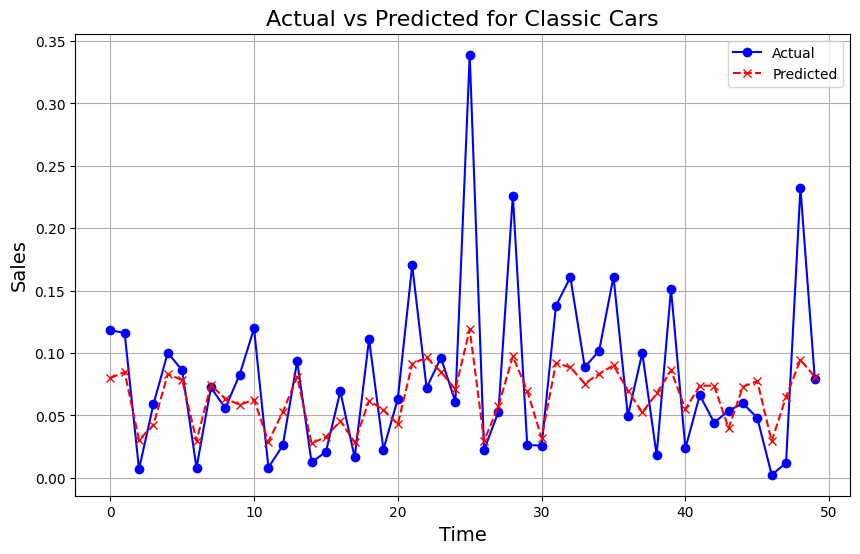

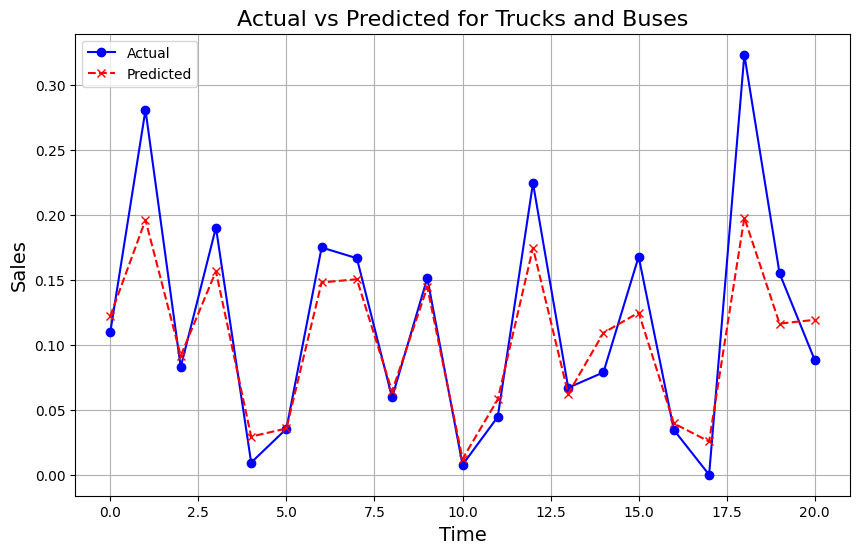

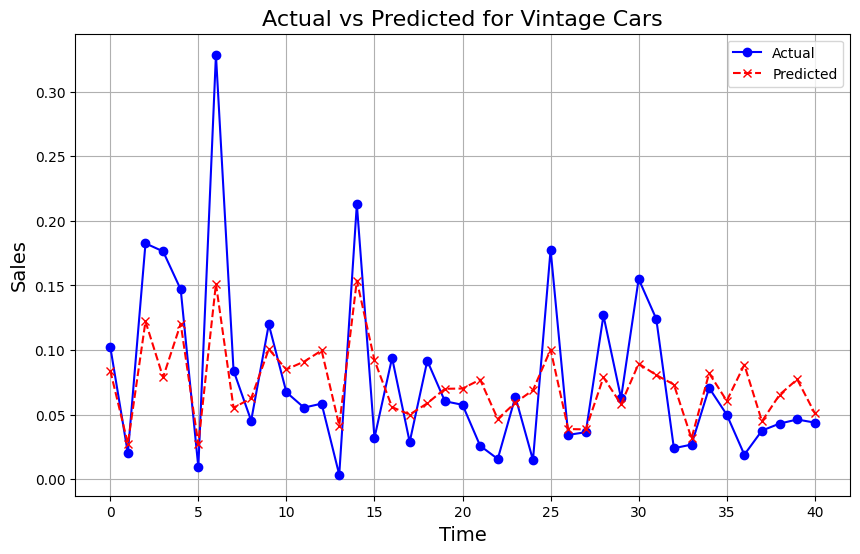

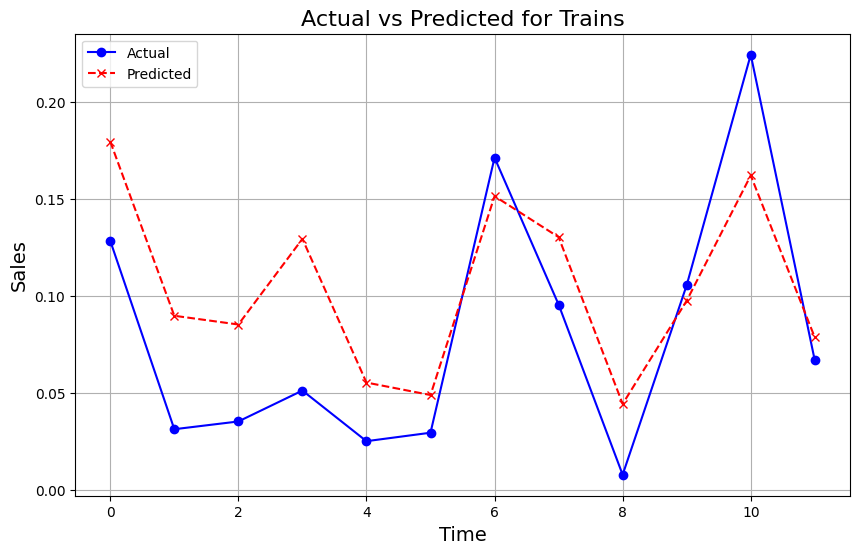

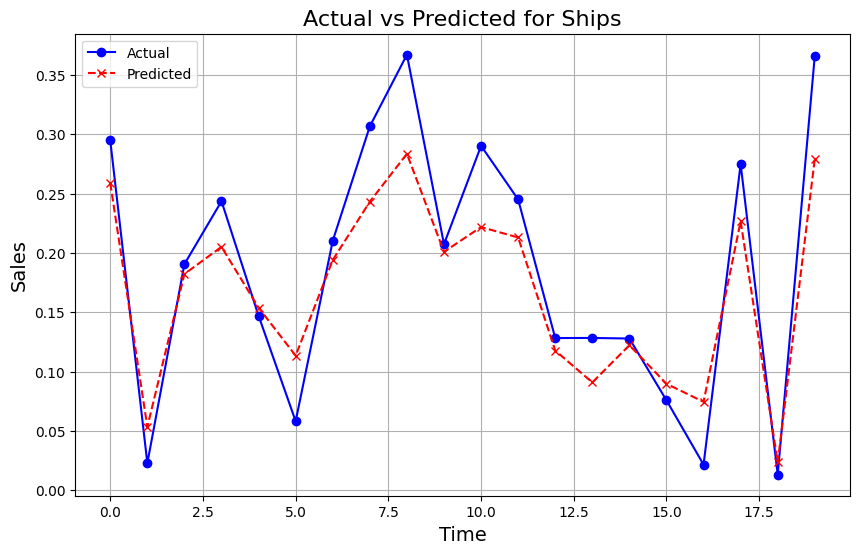

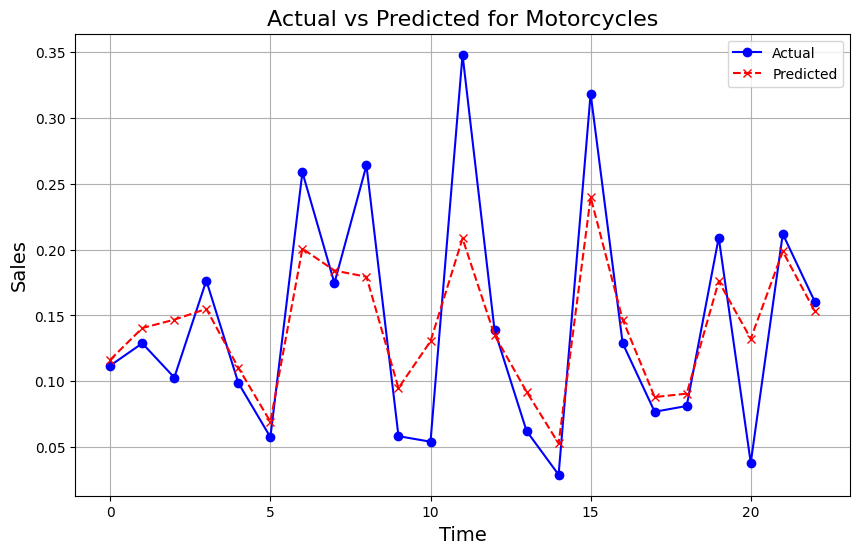

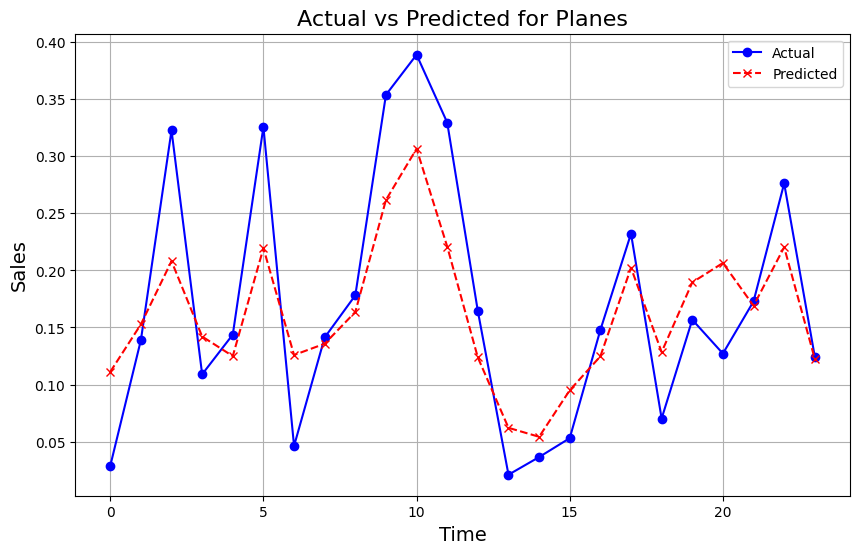

In [ ]:
def plot_actual_vs_predicted(product, actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue', marker='o')
    plt.plot(predicted, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted for {product}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Sales', fontsize=14)  # Changed to 'Sales' since we are plotting sales
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot for each product line
for product, result in elasticnet_result.items():
    actual = result['actual']
    predicted = result['predicted']
    # Call the plotting function
    plot_actual_vs_predicted(product, actual, predicted)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_result = {}

# Loop through each unique product line
unique_product_codes = df2['PRODUCTLINE'].unique()
for product in unique_product_codes:
    product_data = df2[df2['PRODUCTLINE'] == product]

    # Select features to be one-hot encoded
    categorical_features = ['MONTH_ID', 'CITY', 'COUNTRY', 'DEALSIZE']

    # Perform one-hot encoding on categorical columns
    product_data_encoded = pd.get_dummies(product_data, columns=categorical_features, drop_first=True)

    # Prepare features (X) and target (y)
    columns_to_drop = ['SALES', 'PRODUCTLINE', 'QTR_ID', 'YEAR_ID']
    X = product_data_encoded.drop(columns=[col for col in columns_to_drop if col in product_data_encoded.columns])
    y = product_data_encoded['SALES']

    # Train-test split (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Keep ORDERDATE aligned with y_test by indexing directly from the test set
    order_dates_test = X_test.index  # ORDERDATE is retained as the index

    # Initialize and train the Random Forest model
    rf = RandomForestRegressor(n_estimators=110, random_state=42)
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and results, retaining ORDERDATE as index
    random_forest_result[product] = {
        'model': rf,
        'mse': mse,
        'r2_score': r2,
        'actual': y_test.values,
        'predicted': y_pred,
        'ORDERDATE': order_dates_test  # Keeps ORDERDATE as index for the test set results
    }

    # # Output results for each product line
    # print(f"Product Line: {product}")
    # print(f"Mean Squared Error: {mse:.2f}")
    # print(f"R² Score: {r2:.2f}\n")


In [ ]:
# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate MAE
    mae = np.mean(np.abs(actual - predicted))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual - predicted) / (actual+0.000001))) * 100

    # Calculate MSE and R^2 Score
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    return mae, rmse, mape, mse, r2

# Dictionary to store evaluation results for each product
evaluation_results = {}
for product, result in random_forest_result.items():
    actual = result['actual']
    predicted = result['predicted']
    mae, rmse, mape, mse, r2 = calculate_metrics(actual, predicted)  # Get all metrics
    evaluation_results[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'MSE': mse,
        'R^2 Score': r2
    }

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index').reset_index()
evaluation_df.rename(columns={'index': 'Product Code'}, inplace=True)
evaluation_df

Product Code       MAE      RMSE    MAPE (%)       MSE  R^2 Score
0      Classic Cars  0.012051  0.025845   19.913459  0.000668   0.845770
1  Trucks and Buses  0.019965  0.030250  160.562316  0.000915   0.881340
2      Vintage Cars  0.012043  0.020403   17.509189  0.000416   0.905299
3            Trains  0.027173  0.032523   68.136801  0.001058   0.738946
4             Ships  0.021461  0.027350   25.983405  0.000748   0.938193
5       Motorcycles  0.032213  0.039583   32.590141  0.001567   0.798333
6            Planes  0.033991  0.042655   27.936859  0.001819   0.844043

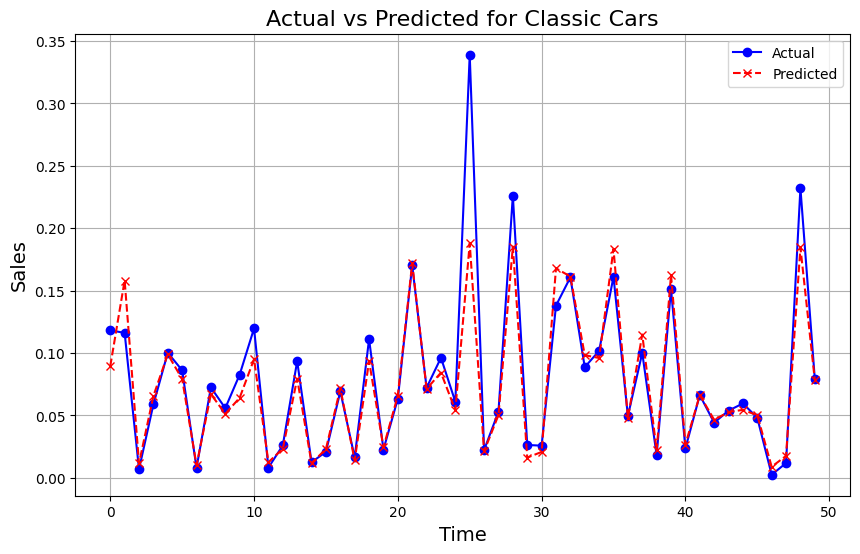

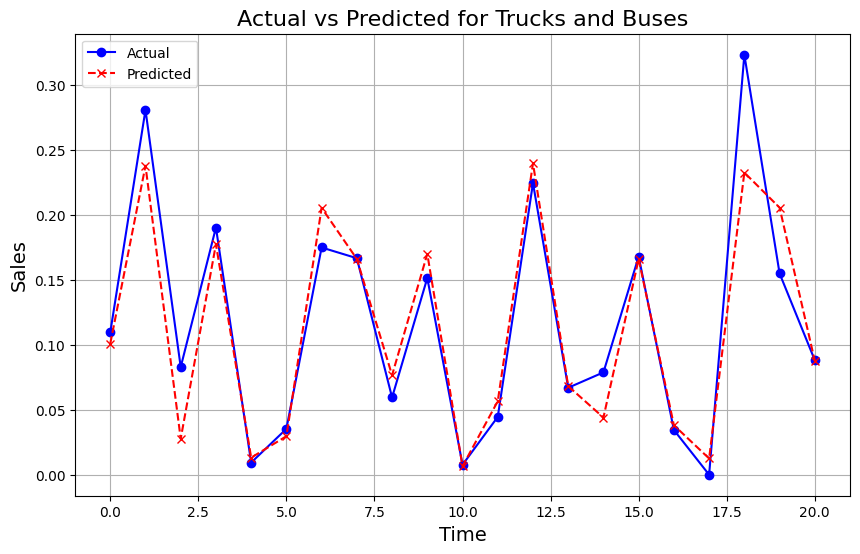

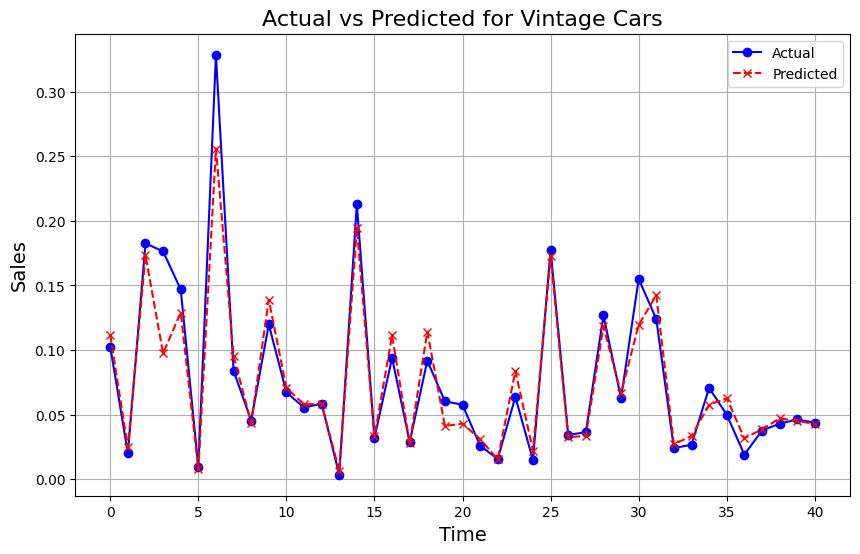

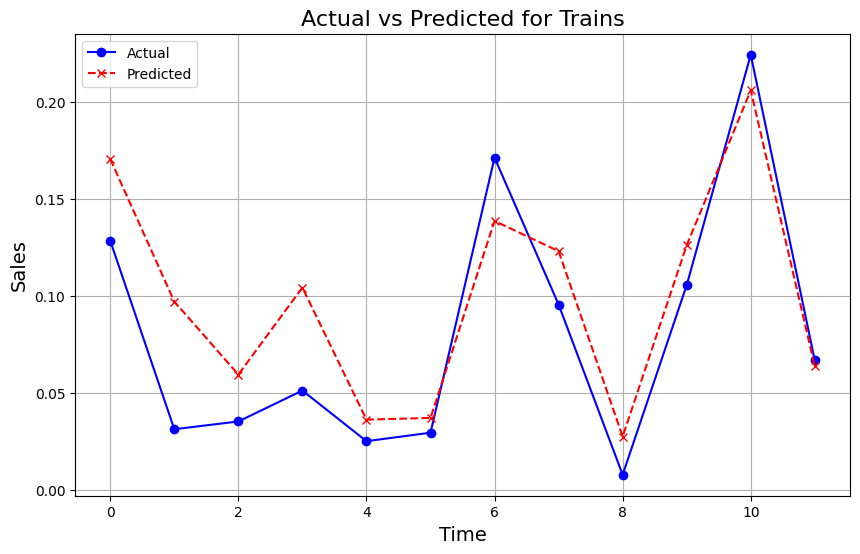

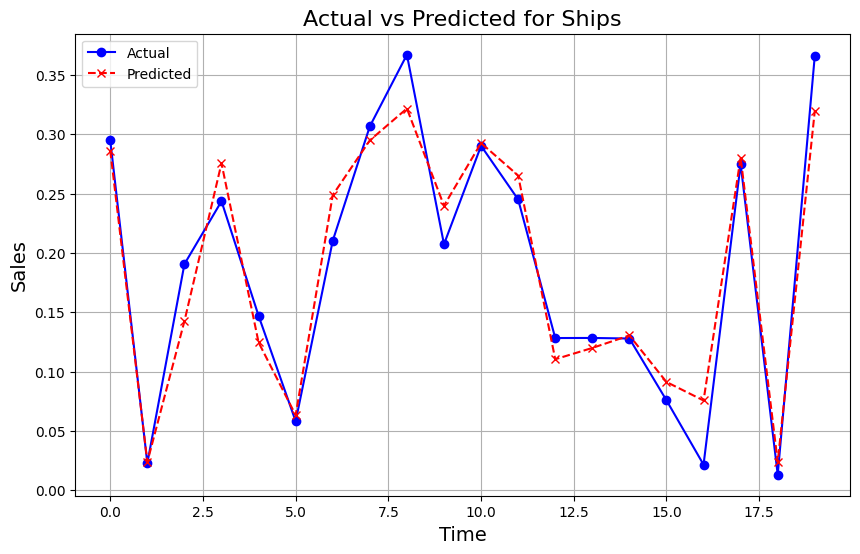

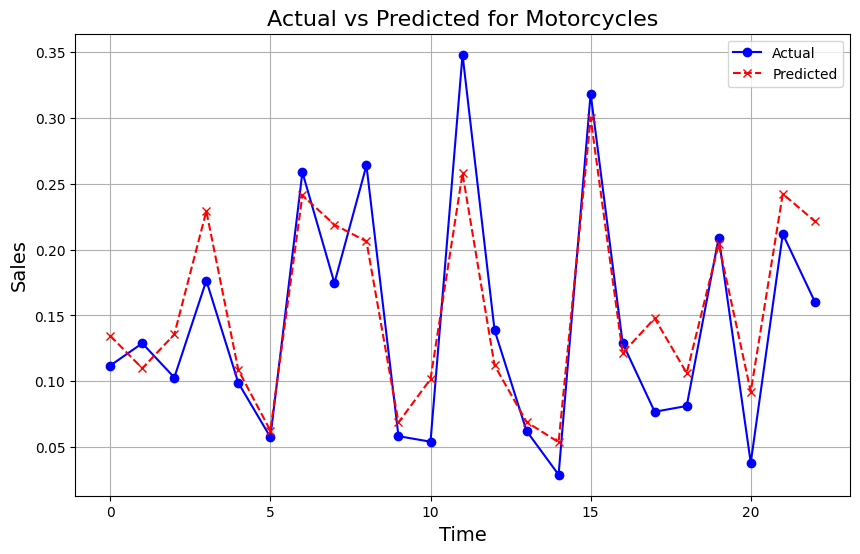

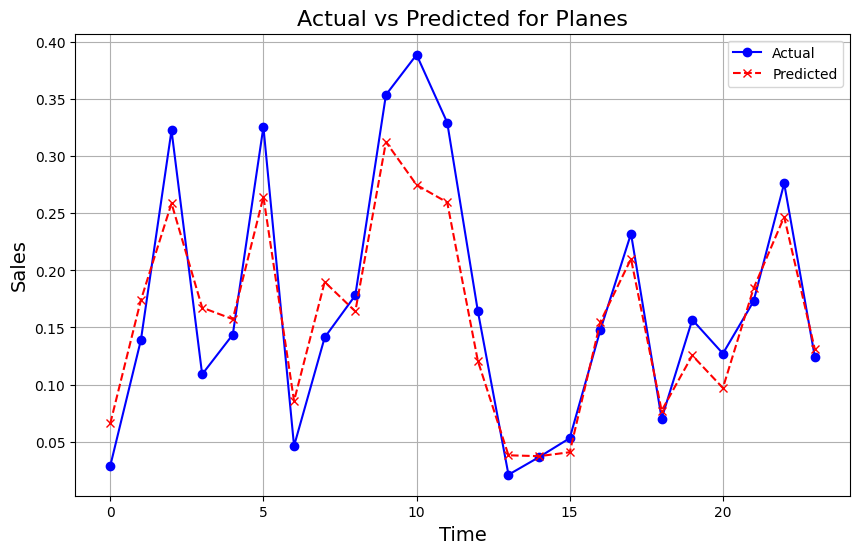

In [ ]:
def plot_actual_vs_predicted(product, actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue', marker='o')
    plt.plot(predicted, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted for {product}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Sales', fontsize=14)  # Changed to 'Sales' since we are plotting sales
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot for each product line
for product, result in random_forest_result.items():
    actual = result['actual']
    predicted = result['predicted']
    # Call the plotting function
    plot_actual_vs_predicted(product, actual, predicted)

#Experiment on data

In [ ]:
# dfm=df2[df2['PRODUCTLINE']=='Motorcycles']

In [ ]:
# dfm = df2[(df2['PRODUCTLINE'] == 'Motorcycles') & (df2['YEAR_ID'] == 2003)]

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

In [ ]:
# Filter data for Motorcycles in the year 2003
# dfm = df2[(df2['PRODUCTLINE'] == 'Motorcycles') & (df2['YEAR_ID'] == 2003)]
# dfm=dfm.drop(columns='PRODUCTCODE')


**Impact of Deal Size on Sales:**

 * **Small Deals:** Result in lower and more consistent sales amounts.

* **Medium Deals:** Show more variability in sales, with a higher median sales amount than small deals.
* **Large Deals:** Lead to the highest sales, with minimal variation, meaning large deals consistently contribute significantly to total sales.

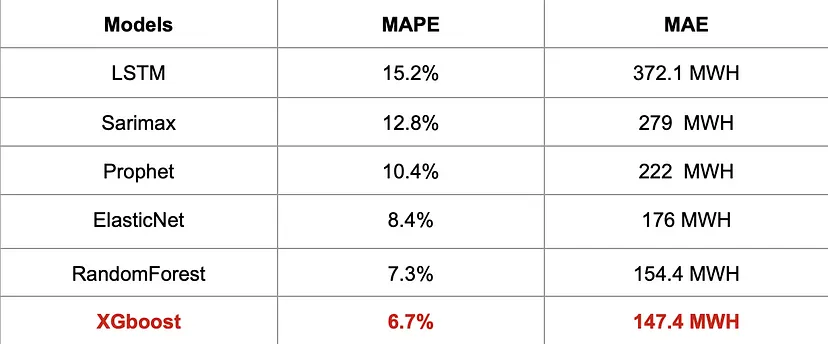

In [ ]:
df2.head()

CITY  COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH     SALES  \
ORDERDATE                                                                       
2003-01-31    Stavern   Norway   Medium         0.080195   0.891273  0.079054   
2003-01-31    Stavern   Norway   Medium         0.305221   0.938610  0.280626   
2003-01-31    Stavern   Norway    Small         0.002677   0.190443  0.000000   
2003-01-31  Frankfurt  Germany   Medium         0.054283   0.954988  0.070632   
2003-01-31  Frankfurt  Germany    Small         0.060221   0.110286  0.018512   

                MSRP  QTR_ID  MONTH_ID  YEAR_ID       PRODUCTLINE  
ORDERDATE                                                          
2003-01-31  0.604469       1         1     2003      Classic Cars  
2003-01-31  0.691638       1         1     2003  Trucks and Buses  
2003-01-31  0.073171       1         1     2003  Trucks and Buses  
2003-01-31  0.717762       1         1     2003      Vintage Cars  
2003-01-31  0.040146       1         1     2003      Vintage Cars

In [ ]:
df2['PRODUCTLINE'].unique()

array(['Classic Cars', 'Trucks and Buses', 'Vintage Cars', 'Trains',
       'Ships', 'Motorcycles', 'Planes'], dtype=object)

In [ ]:
dfp=df2[df2['PRODUCTLINE']=='Classic Cars']

In [ ]:
dfp.to_csv('filtered_classic_cars.csv', index=False)

In [ ]:
dfp.head()

CITY      COUNTRY DEALSIZE  QUANTITYORDERED  PRICEEACH  \
ORDERDATE                                                                   
2003-01-31      Stavern       Norway   Medium         0.080195   0.891273   
2003-02-28    Kobenhavn      Denmark    Large         0.108551   1.000000   
2003-03-31  Makati City  Philippines   Medium         0.164377   0.956239   
2003-03-31  Makati City  Philippines    Small         0.029685   0.483956   
2003-03-31         Lule       Sweden    Large         0.003988   1.000000   

               SALES      MSRP  QTR_ID  MONTH_ID  YEAR_ID   PRODUCTLINE  
ORDERDATE                                                                
2003-01-31  0.079054  0.604469       1         1     2003  Classic Cars  
2003-02-28  0.142417  0.661453       1         2     2003  Classic Cars  
2003-03-31  0.161150  0.536313       1         3     2003  Classic Cars  
2003-03-31  0.017177  0.216015       1         3     2003  Classic Cars  
2003-03-31  0.022066  1.000000       1         3     2003  Classic Cars

In [ ]:
dfp.describe()

QUANTITYORDERED   PRICEEACH       SALES        MSRP      QTR_ID  \
count       166.000000  166.000000  166.000000  166.000000  166.000000   
mean          0.064378    0.811116    0.063925    0.517050    2.734940   
std           0.061875    0.261098    0.059433    0.245374    1.201861   
min           0.000000    0.000000    0.000000    0.000000    1.000000   
25%           0.016837    0.597340    0.021877    0.289678    2.000000   
50%           0.043420    0.968726    0.049664    0.550878    3.000000   
75%           0.092158    1.000000    0.085257    0.657688    4.000000   
max           0.349579    1.000000    0.339080    1.000000    4.000000   

         MONTH_ID      YEAR_ID  
count  166.000000   166.000000  
mean     7.042169  2003.771084  
std      3.585074     0.719011  
min      1.000000  2003.000000  
25%      4.000000  2003.000000  
50%      7.500000  2004.000000  
75%     10.750000  2004.000000  
max     12.000000  2005.000000

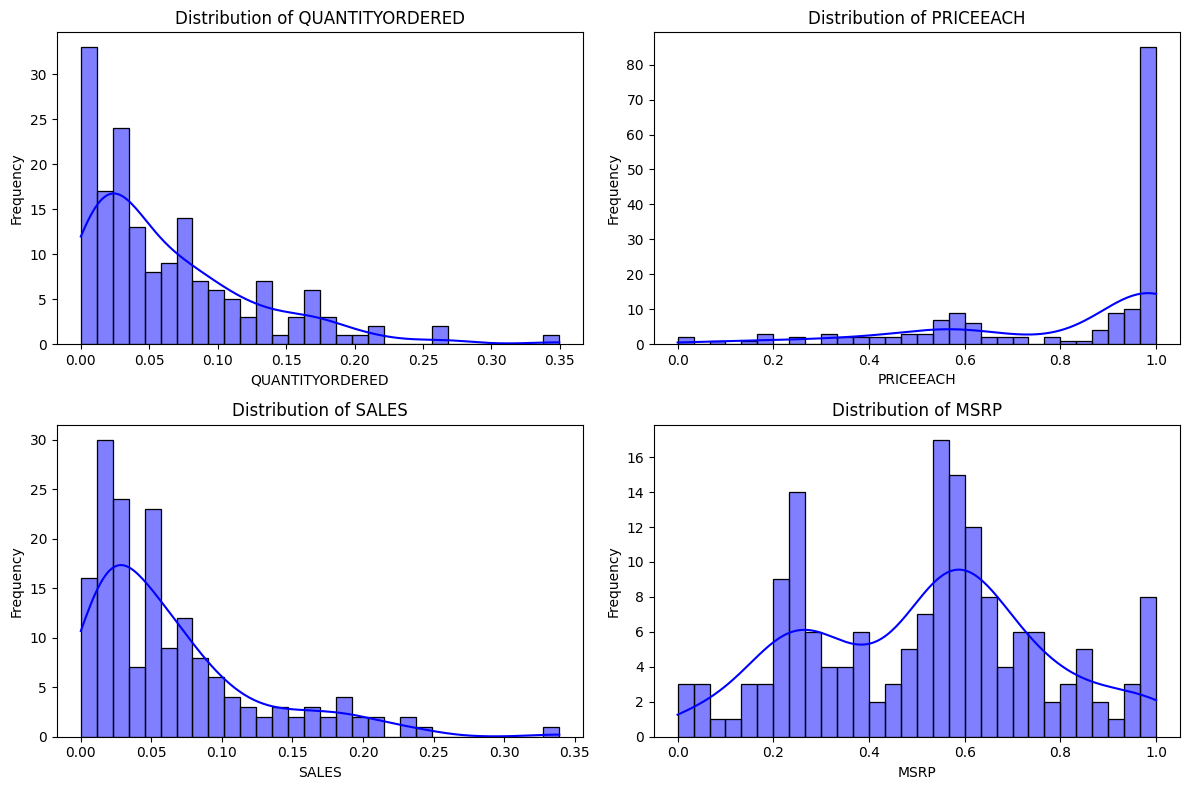

In [ ]:
# List of columns to check distribution
columns_to_check = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot distributions
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    sns.histplot(dfp[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
